In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'mathtext.default':'regular'})

### Read in csv file and clean data

In [2]:
# Read csv files and drop irrelevant columns - Varying Share of Compliant Inspectees
rand_standard_compliantshare_df = pd.read_csv('Share of Compliant Inspectees, Random, Standard.csv')
rand_standard_compliantshare_df.drop(['logit-normal-mu', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Random-Inspections'], inplace=True, axis=1)
rand_standard_compliantshare_df = rand_standard_compliantshare_df.rename(columns={'[step]': 'step', '[run number]':'run', '%-Compliant-Inspectees':"compliantshare"})
rand_standard_compliantshare_df['total-inspectees'] = rand_standard_compliantshare_df['#-compliant-inspectees'] + rand_standard_compliantshare_df['#-unintentional-violators'] + rand_standard_compliantshare_df['#-conscious-violators'] + rand_standard_compliantshare_df['#-criminal-violators'] 
rand_standard_compliantshare_df['perc-compliant'] = rand_standard_compliantshare_df['#-compliant-inspectees'] / rand_standard_compliantshare_df['total-inspectees'] * 100
rand_standard_compliantshare_df['perc-compliant'] = rand_standard_compliantshare_df['perc-compliant'].fillna(0)
rand_standard_compliantshare_df['perc-unintentional'] = rand_standard_compliantshare_df['#-unintentional-violators'] / rand_standard_compliantshare_df['total-inspectees'] * 100
rand_standard_compliantshare_df['perc-unintentional'] = rand_standard_compliantshare_df['perc-unintentional'].fillna(0)
rand_standard_compliantshare_df['perc-conscious'] = rand_standard_compliantshare_df['#-conscious-violators'] / rand_standard_compliantshare_df['total-inspectees'] * 100
rand_standard_compliantshare_df['perc-conscious'] = rand_standard_compliantshare_df['perc-conscious'].fillna(0)
rand_standard_compliantshare_df['perc-criminal'] = rand_standard_compliantshare_df['#-criminal-violators'] / rand_standard_compliantshare_df['total-inspectees'] * 100
rand_standard_compliantshare_df['perc-criminal'] = rand_standard_compliantshare_df['perc-criminal'].fillna(0)
rand_standard_compliantshare_df['perc-noncompliant'] = (rand_standard_compliantshare_df['perc-unintentional'] + rand_standard_compliantshare_df['perc-conscious'] + rand_standard_compliantshare_df['perc-criminal']) 
rand_standard_compliantshare_df

run  compliantshare  step  avg-compliance-rate  #-compliant-inspectees  \
0        4              10     0             0.000000                       0   
1        3              10     0             0.000000                       0   
2        2              10     0             0.000000                       0   
3        1              10     0             0.000000                       0   
4        3              10     1             1.662859                     787   
...    ...             ...   ...                  ...                     ...   
35030   35              70   996            99.965354                    7878   
35031   35              70   997            99.965387                    7878   
35032   35              70   998            99.965416                    7878   
35033   35              70   999            99.965449                    7878   
35034   35              70  1000            99.965483                    7878   

       #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                              0                      0                     0   
1                              0                      0                     0   
2                              0                      0                     0   
3                              0                      0                     0   
4                           1474                   5416                   198   
...                          ...                    ...                   ...   
35030                          0                      0                     0   
35031                          0                      0                     0   
35032                          0                      0                     0   
35033                          0                      0                     0   
35034                          0                      0                     0   

       total-inspectees  perc-compliant  perc-unintentional  perc-conscious  \
0                     0        0.000000             0.00000        0.000000   
1                     0        0.000000             0.00000        0.000000   
2                     0        0.000000             0.00000        0.000000   
3                     0        0.000000             0.00000        0.000000   
4                  7875        9.993651            18.71746       68.774603   
...                 ...             ...                 ...             ...   
35030              7878      100.000000             0.00000        0.000000   
35031              7878      100.000000             0.00000        0.000000   
35032              7878      100.000000             0.00000        0.000000   
35033              7878      100.000000             0.00000        0.000000   
35034              7878      100.000000             0.00000        0.000000   

       perc-criminal  perc-noncompliant  
0           0.000000           0.000000  
1           0.000000           0.000000  
2           0.000000           0.000000  
3           0.000000           0.000000  
4           2.514286          90.006349  
...              ...                ...  
35030       0.000000           0.000000  
35031       0.000000           0.000000  
35032       0.000000           0.000000  
35033       0.000000           0.000000  
35034       0.000000           0.000000  

[35035 rows x 14 columns]

In [3]:
aggregate_summary_standard = rand_standard_compliantshare_df.groupby(['compliantshare'], as_index=False).mean()
aggregate_summary_standard.drop(['run','step','total-inspectees'], inplace=True, axis=1)
aggregate_summary_standard

compliantshare  avg-compliance-rate  #-compliant-inspectees  \
0              10             0.435464               30.965035   
1              20             0.513232               33.100300   
2              30             0.589079               34.357443   
3              40            14.564889             1054.196004   
4              50            98.954261             7863.753047   
5              60            99.135972             7866.344056   
6              70            99.203995             7867.302697   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                 104.296304            7690.491508             44.373826   
1                 103.920080            7688.843756             44.263137   
2                 103.889111            7687.634965             44.247353   
3                  86.736264            6695.636963             33.559640   
4                   1.106094               5.129271              0.140060   
5                   0.805594               2.867732              0.109890   
6                   0.591608               2.148452              0.084515   

   perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0        0.393061            1.323900       97.619875       0.563264   
1        0.420167            1.319122       97.598953       0.561858   
2        0.436123            1.318726       97.583594       0.561657   
3       13.381523            1.100995       84.991590       0.425992   
4       99.819166            0.014042        0.065114       0.001778   
5       99.852067            0.010228        0.036410       0.001395   
6       99.864238            0.007511        0.027278       0.001073   

   perc-noncompliant  
0          99.507039  
1          99.479933  
2          99.463977  
3          86.518577  
4           0.080934  
5           0.048033  
6           0.035862

In [4]:
rand_resp_compliantshare_df = pd.read_csv('Share of Compliant Inspectees, Random, Responsive.csv')
rand_resp_compliantshare_df.drop(['logit-normal-mu', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Random-Inspections'], inplace=True, axis=1)
rand_resp_compliantshare_df = rand_resp_compliantshare_df.rename(columns={'[step]': 'step', '[run number]':'run', '%-Compliant-Inspectees':"compliantshare"})
rand_resp_compliantshare_df['total-inspectees'] = rand_resp_compliantshare_df['#-compliant-inspectees'] + rand_resp_compliantshare_df['#-unintentional-violators'] + rand_resp_compliantshare_df['#-conscious-violators'] + rand_resp_compliantshare_df['#-criminal-violators'] 
rand_resp_compliantshare_df['perc-compliant'] = rand_resp_compliantshare_df['#-compliant-inspectees'] / rand_resp_compliantshare_df['total-inspectees'] * 100
rand_resp_compliantshare_df['perc-compliant'] = rand_resp_compliantshare_df['perc-compliant'].fillna(0)
rand_resp_compliantshare_df['perc-unintentional'] = rand_resp_compliantshare_df['#-unintentional-violators'] / rand_resp_compliantshare_df['total-inspectees'] * 100
rand_resp_compliantshare_df['perc-unintentional'] = rand_resp_compliantshare_df['perc-unintentional'].fillna(0)
rand_resp_compliantshare_df['perc-conscious'] = rand_resp_compliantshare_df['#-conscious-violators'] / rand_resp_compliantshare_df['total-inspectees'] * 100
rand_resp_compliantshare_df['perc-conscious'] = rand_resp_compliantshare_df['perc-conscious'].fillna(0)
rand_resp_compliantshare_df['perc-criminal'] = rand_resp_compliantshare_df['#-criminal-violators'] / rand_resp_compliantshare_df['total-inspectees'] * 100
rand_resp_compliantshare_df['perc-criminal'] = rand_resp_compliantshare_df['perc-criminal'].fillna(0)
rand_resp_compliantshare_df['perc-noncompliant'] = (rand_resp_compliantshare_df['perc-unintentional'] + rand_resp_compliantshare_df['perc-conscious'] + rand_resp_compliantshare_df['perc-criminal']) 

In [5]:
aggregate_summary_resp = rand_resp_compliantshare_df.groupby(['compliantshare'], as_index=False).mean()
aggregate_summary_resp.drop(['run','step','total-inspectees'], inplace=True, axis=1)
aggregate_summary_resp

compliantshare  avg-compliance-rate  #-compliant-inspectees  \
0              10             4.112258              329.745654   
1              20             4.216020              335.315085   
2              30             4.372037              337.869930   
3              40            91.583183             7700.760839   
4              50            99.055386             7865.253347   
5              60            99.146949             7866.480320   
6              70            99.211783             7867.393606   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                  78.131269            7434.518282             27.731469   
1                  77.457542            7429.834765             27.519880   
2                  77.375025            7427.342258             27.541459   
3                   3.369630             165.695305              0.303097   
4                   1.054545               3.705495              0.115485   
5                   0.801598               2.753646              0.091908   
6                   0.605994               2.060140              0.068132   

   perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0        4.185656            0.991772       94.370659       0.352012   
1        4.256353            0.983218       94.311202       0.349326   
2        4.288782            0.982168       94.279550       0.349600   
3       97.750206            0.042774        2.103272       0.003848   
4       99.838206            0.013387        0.047041       0.001466   
5       99.853794            0.010177        0.034962       0.001167   
6       99.865385            0.007694        0.026156       0.000865   

   perc-noncompliant  
0          95.714444  
1          95.643746  
2          95.611318  
3           2.149894  
4           0.061894  
5           0.046306  
6           0.034715

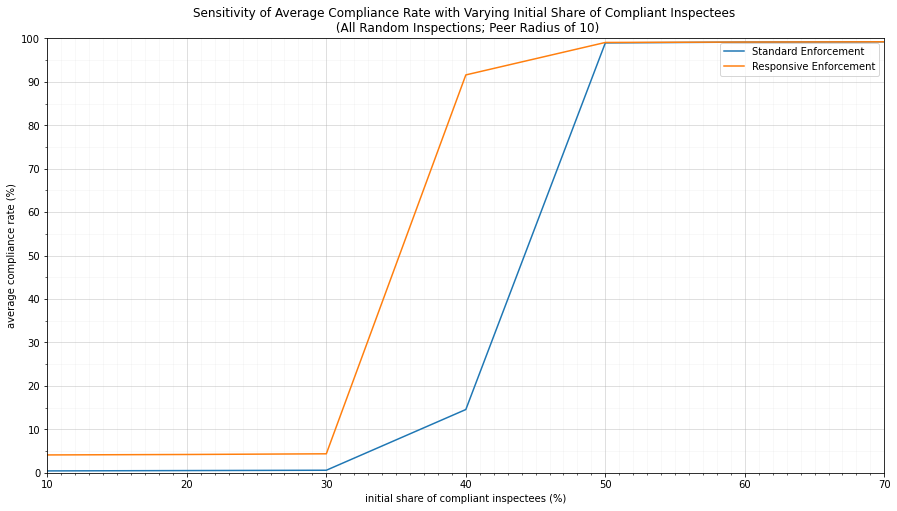

<Figure size 432x288 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(10, 70.1, 10))
ax.set_xticks(np.arange(10, 70.1, 1), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)

plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['avg-compliance-rate'], label="Standard Enforcement")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['avg-compliance-rate'], label="Responsive Enforcement")

plt.title("Sensitivity of Average Compliance Rate with Varying Initial Share of Compliant Inspectees \n (All Random Inspections; Peer Radius of 10)")
plt.xlabel('initial share of compliant inspectees (%)')
plt.ylabel('average compliance rate (%)')
plt.xlim(10,70)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Initial Compliant Share vs. Avg Compliance Rate (Random, Radius 10).png', dpi=300, bbox_inches='tight')

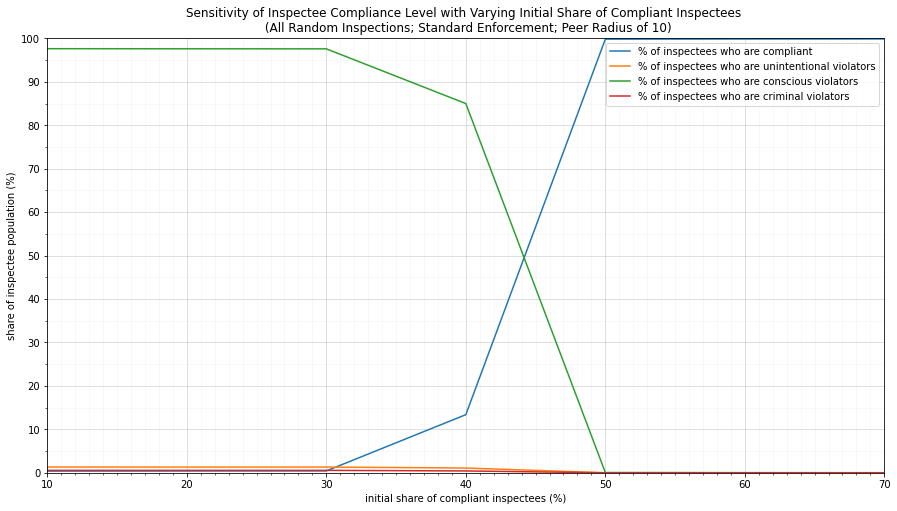

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(10, 70.1, 10))
ax.set_xticks(np.arange(10, 70.1, 1), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-compliant'],label="% of inspectees who are compliant")
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-unintentional'],label="% of inspectees who are unintentional violators")
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-conscious'],label="% of inspectees who are conscious violators")
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-criminal'],label="% of inspectees who are criminal violators")

plt.title("Sensitivity of Inspectee Compliance Level with Varying Initial Share of Compliant Inspectees \n (All Random Inspections; Standard Enforcement; Peer Radius of 10)")
plt.xlabel('initial share of compliant inspectees (%)')
plt.ylabel('share of inspectee population (%)')
plt.xlim(10,70)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Initial Compliant Share vs. Compliance Breakdown (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

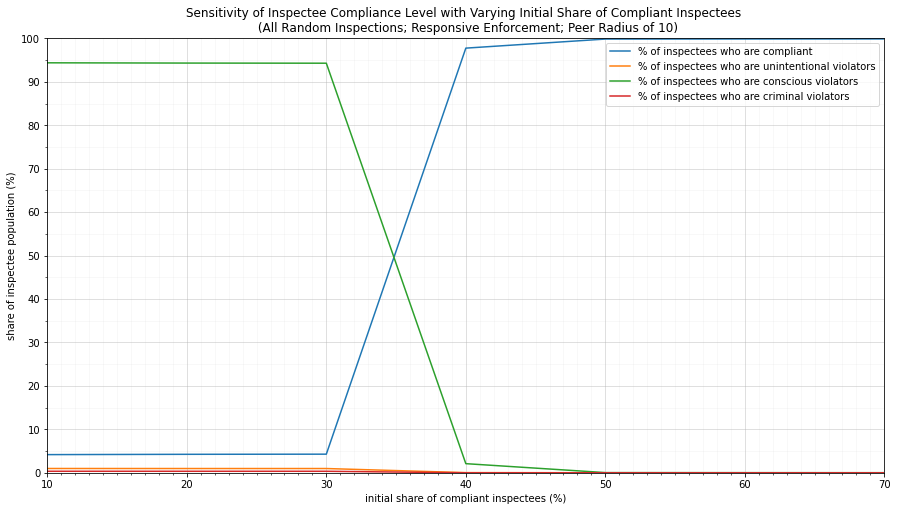

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(10, 70.1, 10))
ax.set_xticks(np.arange(10, 70.1, 1), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)

plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-compliant'],label="% of inspectees who are compliant")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-unintentional'],label="% of inspectees who are unintentional violators")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-conscious'],label="% of inspectees who are conscious violators")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-criminal'],label="% of inspectees who are criminal violators")

plt.title("Sensitivity of Inspectee Compliance Level with Varying Initial Share of Compliant Inspectees \n ((All Random Inspections, Peer Radius of 10, and Responsive Enforcement))")
plt.xlabel('initial share of compliant inspectees (%)')
plt.ylabel('share of inspectee population (%)')
plt.xlim(10,70)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Initial Compliant Share vs. Compliance Breakdown (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

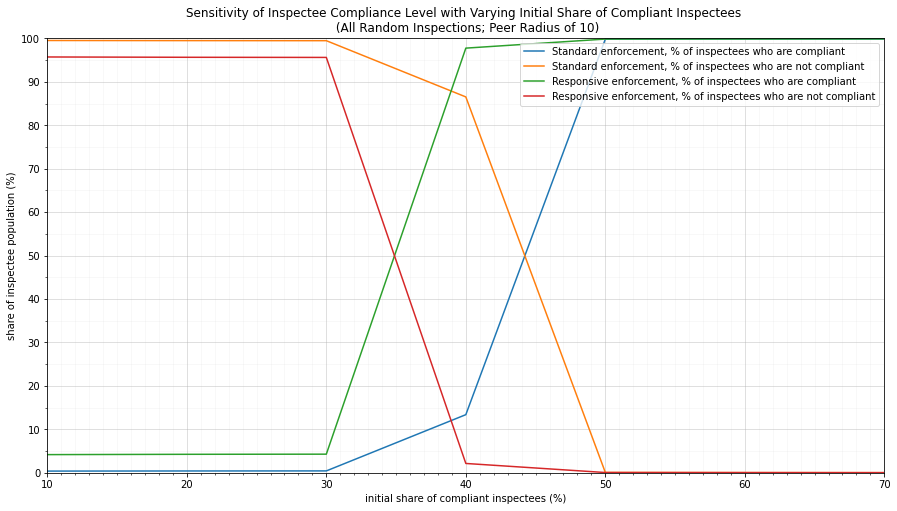

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(10, 70.1, 10))
ax.set_xticks(np.arange(10, 70.1, 1), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-compliant'],label="Standard enforcement, % of inspectees who are compliant")
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-noncompliant'],label="Standard enforcement, % of inspectees who are not compliant")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-compliant'],label="Responsive enforcement, % of inspectees who are compliant")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-noncompliant'],label="Responsive enforcement, % of inspectees who are not compliant")


plt.title("Sensitivity of Inspectee Compliance Level with Varying Initial Share of Compliant Inspectees \n (All Random Inspections; Peer Radius of 10)")
plt.xlabel('initial share of compliant inspectees (%)')
plt.ylabel('share of inspectee population (%)')
plt.xlim(10,70)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Initial Compliant Share vs. Compliance Breakdown (Random, Both, Radius 10).png', dpi=300, bbox_inches='tight')

### Vary in Smaller Increments between 30% and 50%

In [10]:
# Read csv files and drop irrelevant columns - Varying Share of Compliant Inspectees
rand_standard_compliantshare_df = pd.read_csv('Share Compliant Inspectees (detailed), Random, Standard FINAL.csv')
rand_standard_compliantshare_df.drop(['logit-normal-mu', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Random-Inspections'], inplace=True, axis=1)
rand_standard_compliantshare_df = rand_standard_compliantshare_df.rename(columns={'[step]': 'step', '[run number]':'run', '%-Compliant-Inspectees':"compliantshare"})
rand_standard_compliantshare_df['total-inspectees'] = rand_standard_compliantshare_df['#-compliant-inspectees'] + rand_standard_compliantshare_df['#-unintentional-violators'] + rand_standard_compliantshare_df['#-conscious-violators'] + rand_standard_compliantshare_df['#-criminal-violators'] 
rand_standard_compliantshare_df['perc-compliant'] = rand_standard_compliantshare_df['#-compliant-inspectees'] / rand_standard_compliantshare_df['total-inspectees'] * 100
rand_standard_compliantshare_df['perc-compliant'] = rand_standard_compliantshare_df['perc-compliant'].fillna(0)
rand_standard_compliantshare_df['perc-unintentional'] = rand_standard_compliantshare_df['#-unintentional-violators'] / rand_standard_compliantshare_df['total-inspectees'] * 100
rand_standard_compliantshare_df['perc-unintentional'] = rand_standard_compliantshare_df['perc-unintentional'].fillna(0)
rand_standard_compliantshare_df['perc-conscious'] = rand_standard_compliantshare_df['#-conscious-violators'] / rand_standard_compliantshare_df['total-inspectees'] * 100
rand_standard_compliantshare_df['perc-conscious'] = rand_standard_compliantshare_df['perc-conscious'].fillna(0)
rand_standard_compliantshare_df['perc-criminal'] = rand_standard_compliantshare_df['#-criminal-violators'] / rand_standard_compliantshare_df['total-inspectees'] * 100
rand_standard_compliantshare_df['perc-criminal'] = rand_standard_compliantshare_df['perc-criminal'].fillna(0)
rand_standard_compliantshare_df['perc-noncompliant'] = (rand_standard_compliantshare_df['perc-unintentional'] + rand_standard_compliantshare_df['perc-conscious'] + rand_standard_compliantshare_df['perc-criminal']) 

In [11]:
rand_standard_compliantshare_df

run  run_num  compliantshare  step  avg-compliance-rate  \
0         1        1            30.0     0             0.000000   
1         1        1            30.0     1             4.709317   
2         1        1            30.0     2             4.772785   
3         1        1            30.0     3             4.501989   
4         1        1            30.0     4             4.223788   
...     ...      ...             ...   ...                  ...   
450445  450       50            50.0   996            99.930160   
450446  450       50            50.0   997            99.930220   
450447  450       50            50.0   998            99.930310   
450448  450       50            50.0   999            99.930390   
450449  450       50            50.0  1000            99.930460   

        #-compliant-inspectees  #-unintentional-violators  \
0                            0                          0   
1                         2363                       1147   
2                          419                        211   
3                           95                        106   
4                           38                        102   
...                        ...                        ...   
450445                    7878                          0   
450446                    7878                          0   
450447                    7878                          0   
450448                    7878                          0   
450449                    7878                          0   

        #-conscious-violators  #-criminal-violators  total-inspectees  \
0                           0                     0                 0   
1                        4213                   154              7877   
2                        7197                    51              7878   
3                        7637                    40              7878   
4                        7694                    44              7878   
...                       ...                   ...               ...   
450445                      0                     0              7878   
450446                      0                     0              7878   
450447                      0                     0              7878   
450448                      0                     0              7878   
450449                      0                     0              7878   

        perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0             0.000000            0.000000        0.000000       0.000000   
1            29.998730           14.561381       53.484829       1.955059   
2             5.318609            2.678345       91.355674       0.647372   
3             1.205890            1.345519       96.940848       0.507743   
4             0.482356            1.294745       97.664382       0.558517   
...                ...                 ...             ...            ...   
450445      100.000000            0.000000        0.000000       0.000000   
450446      100.000000            0.000000        0.000000       0.000000   
450447      100.000000            0.000000        0.000000       0.000000   
450448      100.000000            0.000000        0.000000       0.000000   
450449      100.000000            0.000000        0.000000       0.000000   

        perc-noncompliant  
0                0.000000  
1               70.001270  
2               94.681391  
3               98.794110  
4               99.517644  
...                   ...  
450445           0.000000  
450446           0.000000  
450447           0.000000  
450448           0.000000  
450449           0.000000  

[450450 rows x 15 columns]

In [12]:
aggregate_summary_standard = rand_standard_compliantshare_df.groupby(['compliantshare'], as_index=False).mean()
aggregate_summary_standard.drop(['run','run_num','step','total-inspectees'], inplace=True, axis=1)
aggregate_summary_standard

compliantshare  avg-compliance-rate  #-compliant-inspectees  \
0            30.0             0.577087               33.805255   
1            32.5             0.636406               36.508591   
2            35.0             0.842738               47.235205   
3            37.5             2.866974              187.553307   
4            40.0            12.150519              879.164855   
5            42.5            49.433247             3956.270410   
6            45.0            84.870145             6851.637882   
7            47.5            97.244261             7763.338581   
8            50.0            98.780571             7852.347153   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                 103.857423            7688.161099             44.304875   
1                 103.773626            7685.617502             44.227872   
2                 103.639061            7675.159361             44.094965   
3                 101.357263            7538.708452             42.508571   
4                  89.979481            6865.549471             35.434965   
5                  42.807772            3859.287233             11.762178   
6                   9.908412            1007.375904              1.206474   
7                   2.007652             104.608392              0.172947   
8                   1.173307              16.467113              0.141099   

   perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0        0.429114            1.318324       97.590275       0.562388   
1        0.463433            1.317262       97.557994       0.561410   
2        0.599588            1.315552       97.425236       0.559723   
3        2.380732            1.286590       95.693192       0.539586   
4       11.159752            1.142163       87.148388       0.449797   
5       50.219236            0.543387       48.988173       0.149305   
6       86.971801            0.125775       12.787210       0.015315   
7       98.544552            0.025487        1.327866       0.002196   
8       99.674382            0.014895        0.209032       0.001791   

   perc-noncompliant  
0          99.470986  
1          99.436667  
2          99.300512  
3          97.519367  
4          88.740348  
5          49.680864  
6          12.928299  
7           1.355548  
8           0.225718

In [13]:
rand_resp_compliantshare_df = pd.read_csv('Share Compliant Inspectees (detailed), Random, Responsive FINAL.csv')
rand_resp_compliantshare_df.drop(['logit-normal-mu', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Random-Inspections'], inplace=True, axis=1)
rand_resp_compliantshare_df = rand_resp_compliantshare_df.rename(columns={'[step]': 'step', '[run number]':'run', '%-Compliant-Inspectees':"compliantshare"})
rand_resp_compliantshare_df['total-inspectees'] = rand_resp_compliantshare_df['#-compliant-inspectees'] + rand_resp_compliantshare_df['#-unintentional-violators'] + rand_resp_compliantshare_df['#-conscious-violators'] + rand_resp_compliantshare_df['#-criminal-violators'] 
rand_resp_compliantshare_df['perc-compliant'] = rand_resp_compliantshare_df['#-compliant-inspectees'] / rand_resp_compliantshare_df['total-inspectees'] * 100
rand_resp_compliantshare_df['perc-compliant'] = rand_resp_compliantshare_df['perc-compliant'].fillna(0)
rand_resp_compliantshare_df['perc-unintentional'] = rand_resp_compliantshare_df['#-unintentional-violators'] / rand_resp_compliantshare_df['total-inspectees'] * 100
rand_resp_compliantshare_df['perc-unintentional'] = rand_resp_compliantshare_df['perc-unintentional'].fillna(0)
rand_resp_compliantshare_df['perc-conscious'] = rand_resp_compliantshare_df['#-conscious-violators'] / rand_resp_compliantshare_df['total-inspectees'] * 100
rand_resp_compliantshare_df['perc-conscious'] = rand_resp_compliantshare_df['perc-conscious'].fillna(0)
rand_resp_compliantshare_df['perc-criminal'] = rand_resp_compliantshare_df['#-criminal-violators'] / rand_resp_compliantshare_df['total-inspectees'] * 100
rand_resp_compliantshare_df['perc-criminal'] = rand_resp_compliantshare_df['perc-criminal'].fillna(0)
rand_resp_compliantshare_df['perc-noncompliant'] = (rand_resp_compliantshare_df['perc-unintentional'] + rand_resp_compliantshare_df['perc-conscious'] + rand_resp_compliantshare_df['perc-criminal']) 

In [14]:
rand_resp_compliantshare_df

run  run_num  compliantshare  step  avg-compliance-rate  \
0         1        1            30.0     0             0.000000   
1         1        1            30.0     1             4.785479   
2         1        1            30.0     2             5.293222   
3         1        1            30.0     3             5.274181   
4         1        1            30.0     4             5.331302   
...     ...      ...             ...   ...                  ...   
450445  450       50            50.0   996            99.937351   
450446  450       50            50.0   997            99.937405   
450447  450       50            50.0   998            99.937468   
450448  450       50            50.0   999            99.937536   
450449  450       50            50.0  1000            99.937598   

        #-compliant-inspectees  #-unintentional-violators  \
0                            0                          0   
1                         2363                       1147   
2                          746                        247   
3                          457                         96   
4                          395                         79   
...                        ...                        ...   
450445                    7878                          0   
450446                    7878                          0   
450447                    7878                          0   
450448                    7878                          0   
450449                    7878                          0   

        #-conscious-violators  #-criminal-violators  total-inspectees  \
0                           0                     0                 0   
1                        4213                   154              7877   
2                        6880                     5              7878   
3                        7298                    27              7878   
4                        7375                    29              7878   
...                       ...                   ...               ...   
450445                      0                     0              7878   
450446                      0                     0              7878   
450447                      0                     0              7878   
450448                      0                     0              7878   
450449                      0                     0              7878   

        perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0             0.000000            0.000000        0.000000       0.000000   
1            29.998730           14.561381       53.484829       1.955059   
2             9.469408            3.135314       87.331810       0.063468   
3             5.800965            1.218583       92.637725       0.342727   
4             5.013963            1.002793       93.615131       0.368114   
...                ...                 ...             ...            ...   
450445      100.000000            0.000000        0.000000       0.000000   
450446      100.000000            0.000000        0.000000       0.000000   
450447      100.000000            0.000000        0.000000       0.000000   
450448      100.000000            0.000000        0.000000       0.000000   
450449      100.000000            0.000000        0.000000       0.000000   

        perc-noncompliant  
0                0.000000  
1               70.001270  
2               90.530592  
3               94.199035  
4               94.986037  
...                   ...  
450445           0.000000  
450446           0.000000  
450447           0.000000  
450448           0.000000  
450449           0.000000  

[450450 rows x 15 columns]

In [15]:
aggregate_summary_resp = rand_resp_compliantshare_df.groupby(['compliantshare'], as_index=False).mean()
aggregate_summary_resp.drop(['run','run_num','step','total-inspectees'], inplace=True, axis=1)
aggregate_summary_resp

compliantshare  avg-compliance-rate  #-compliant-inspectees  \
0            30.0             4.426868              346.160619   
1            32.5             5.054177              386.345135   
2            35.0            11.010788              877.258102   
3            37.5            35.725148             3121.193506   
4            40.0            86.849313             7415.544276   
5            42.5            97.215018             7832.271968   
6            45.0            98.591042             7857.792827   
7            47.5            98.969952             7863.952008   
8            50.0            99.048392             7865.136364   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                  77.142258            7419.434446             27.391449   
1                  76.978102            7379.639301             27.164995   
2                  72.599181            6896.380539             23.890869   
3                  49.933526            4686.700260             12.300360   
4                   6.284715             447.731289              0.568252   
5                   1.804256              35.896284              0.154725   
6                   1.341059              10.864336              0.130549   
7                   1.141499               4.912428              0.121678   
8                   1.047672               3.828971              0.115604   

   perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0        4.394020            0.979213       94.179171       0.347696   
1        4.904110            0.977131       93.674037       0.344821   
2       11.135548            0.921545       87.539746       0.303261   
3       39.619121            0.633838       59.491005       0.156136   
4       94.129790            0.079777        5.683320       0.007213   
5       99.419564            0.022906        0.455666       0.001964   
6       99.743505            0.017024        0.137913       0.001657   
7       99.821696            0.014493        0.062367       0.001545   
8       99.836724            0.013300        0.048608       0.001468   

   perc-noncompliant  
0          95.506080  
1          94.995989  
2          88.764552  
3          60.280979  
4           5.770310  
5           0.480536  
6           0.156594  
7           0.078404  
8           0.063376

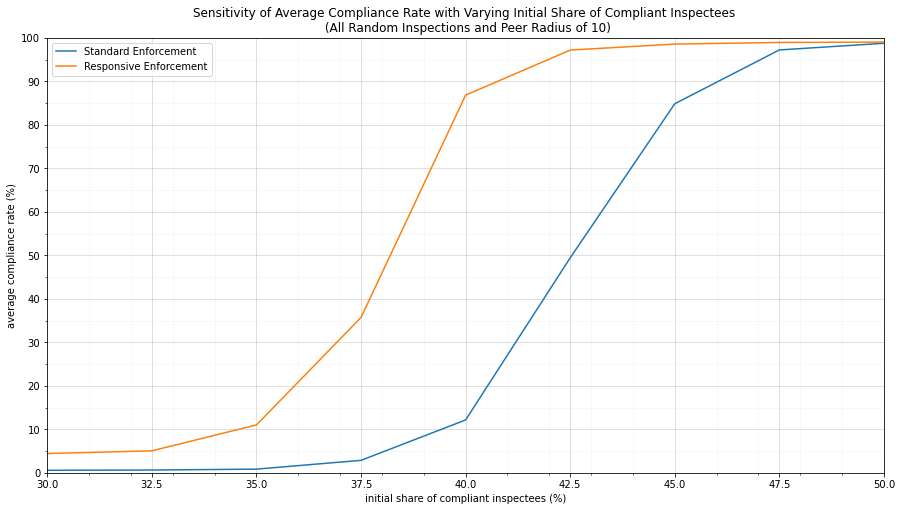

<Figure size 432x288 with 0 Axes>

In [73]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(30,50.1,2.5))
ax.set_xticks(np.arange(30,50,1), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)

plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['avg-compliance-rate'], label="Standard Enforcement")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['avg-compliance-rate'], label="Responsive Enforcement")

plt.title("Sensitivity of Average Compliance Rate with Varying Initial Share of Compliant Inspectees \n (All Random Inspections and Peer Radius of 10)")
plt.xlabel('initial share of compliant inspectees (%)')
plt.ylabel('average compliance rate (%)')

#ax.grid(which='both')
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.xlim(30,50.01)
plt.ylim(0,100.01)
plt.legend()
plt.show()
plt.savefig('Initial Compliant Share vs. Avg Compliance Rate Detailed (Random, Radius 10).png', dpi=300, bbox_inches='tight')

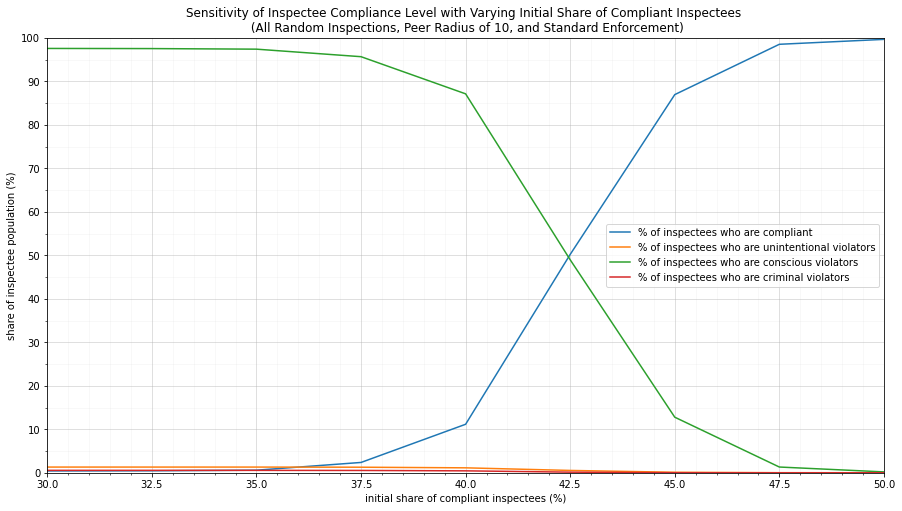

<Figure size 432x288 with 0 Axes>

In [74]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(30,50.1,2.5))
ax.set_xticks(np.arange(30,50,.5), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-compliant'],label="% of inspectees who are compliant")
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-unintentional'],label="% of inspectees who are unintentional violators")
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-conscious'],label="% of inspectees who are conscious violators")
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-criminal'],label="% of inspectees who are criminal violators")

plt.title("Sensitivity of Inspectee Compliance Level with Varying Initial Share of Compliant Inspectees \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)")
plt.xlabel('initial share of compliant inspectees (%)')
plt.ylabel('share of inspectee population (%)')
plt.xlim(30,50.01)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Initial Compliant Share vs. Compliance Breakdown Detailed (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

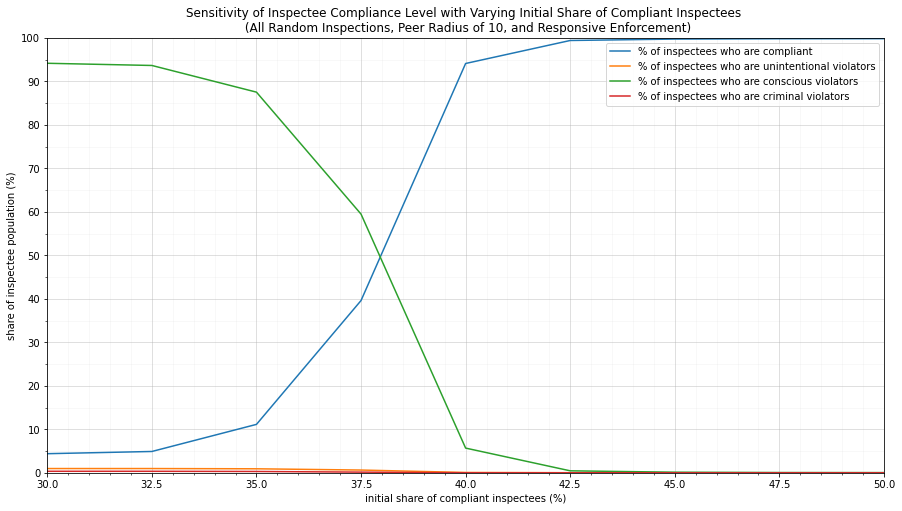

<Figure size 432x288 with 0 Axes>

In [75]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(30,50.1,2.5))
ax.set_xticks(np.arange(30,50,.5), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)

plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-compliant'],label="% of inspectees who are compliant")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-unintentional'],label="% of inspectees who are unintentional violators")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-conscious'],label="% of inspectees who are conscious violators")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-criminal'],label="% of inspectees who are criminal violators")

plt.title("Sensitivity of Inspectee Compliance Level with Varying Initial Share of Compliant Inspectees \n (All Random Inspections, Peer Radius of 10, and Responsive Enforcement)")
plt.xlabel('initial share of compliant inspectees (%)')
plt.ylabel('share of inspectee population (%)')
plt.xlim(30,50.01)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Initial Compliant Share vs. Compliance Breakdown Detailed (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

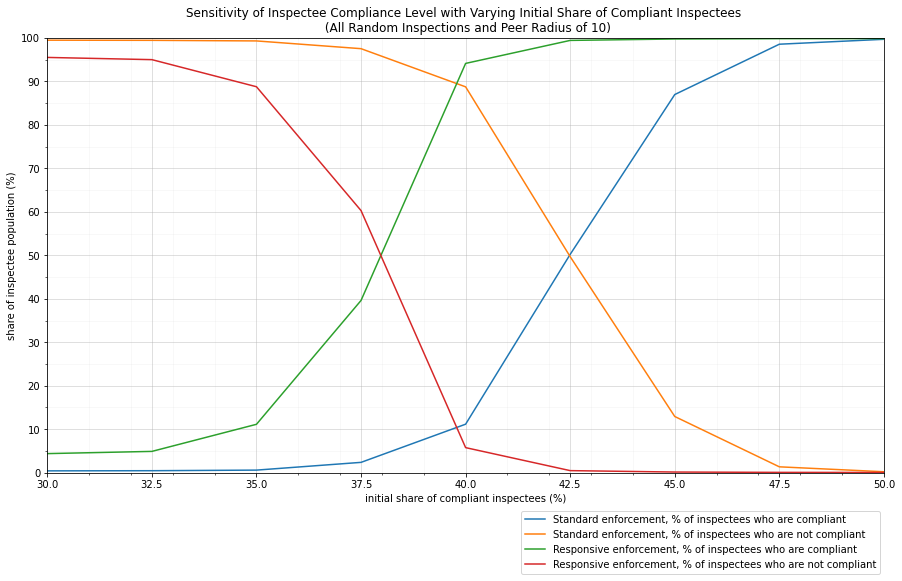

<Figure size 432x288 with 0 Axes>

In [76]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(30,50.1,2.5))
ax.set_xticks(np.arange(30,50,1), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)

plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-compliant'],label="Standard enforcement, % of inspectees who are compliant")
plt.plot(aggregate_summary_standard['compliantshare'], aggregate_summary_standard['perc-noncompliant'],label="Standard enforcement, % of inspectees who are not compliant")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-compliant'],label="Responsive enforcement, % of inspectees who are compliant")
plt.plot(aggregate_summary_resp['compliantshare'], aggregate_summary_resp['perc-noncompliant'],label="Responsive enforcement, % of inspectees who are not compliant")


plt.title("Sensitivity of Inspectee Compliance Level with Varying Initial Share of Compliant Inspectees \n (All Random Inspections and Peer Radius of 10)")
plt.xlabel('initial share of compliant inspectees (%)')
plt.ylabel('share of inspectee population (%)')
plt.xlim(30,50.01)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(.56, -.16))
plt.show()
plt.savefig('Initial Compliant Share vs. Compliance Breakdown Detailed (Random, Both, Radius 10).png', dpi=300, bbox_inches='tight')

### Standard Enforcement

In [20]:
rand_standard_compliantshare =  rand_standard_compliantshare_df.groupby(['compliantshare','step'], as_index=False).mean()
rand_standard_compliantshare

compliantshare  step    run  run_num  avg-compliance-rate  \
0               30.0     0   61.5     25.5             0.000000   
1               30.0     1   61.5     25.5             4.959381   
2               30.0     2   61.5     25.5             5.042904   
3               30.0     3   61.5     25.5             4.737455   
4               30.0     4   61.5     25.5             4.417301   
...              ...   ...    ...      ...                  ...   
9004            50.0   996  389.5     25.5            99.773825   
9005            50.0   997  389.5     25.5            99.773951   
9006            50.0   998  389.5     25.5            99.774087   
9007            50.0   999  389.5     25.5            99.774216   
9008            50.0  1000  389.5     25.5            99.774334   

      #-compliant-inspectees  #-unintentional-violators  \
0                       0.00                       0.00   
1                    2363.00                    1147.00   
2                     435.50                     222.60   
3                     102.42                     111.90   
4                      43.54                     103.46   
...                      ...                        ...   
9004                 7869.94                       0.04   
9005                 7869.96                       0.02   
9006                 7869.96                       0.04   
9007                 7870.00                       0.04   
9008                 7869.94                       0.08   

      #-conscious-violators  #-criminal-violators  total-inspectees  \
0                      0.00                  0.00              0.00   
1                   4213.00                154.00           7877.00   
2                   7182.48                 37.24           7877.82   
3                   7625.50                 38.14           7877.96   
4                   7688.54                 42.46           7878.00   
...                     ...                   ...               ...   
9004                   8.02                  0.00           7878.00   
9005                   8.02                  0.00           7878.00   
9006                   8.00                  0.00           7878.00   
9007                   7.96                  0.00           7878.00   
9008                   7.98                  0.00           7878.00   

      perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0           0.000000            0.000000        0.000000       0.000000   
1          29.998730           14.561381       53.484829       1.955059   
2           5.528177            2.825654       91.173449       0.472720   
3           1.300082            1.420418       96.795364       0.484135   
4           0.552678            1.313277       97.595075       0.538969   
...              ...                 ...             ...            ...   
9004       99.897690            0.000508        0.101802       0.000000   
9005       99.897944            0.000254        0.101802       0.000000   
9006       99.897944            0.000508        0.101549       0.000000   
9007       99.898451            0.000508        0.101041       0.000000   
9008       99.897690            0.001015        0.101295       0.000000   

      perc-noncompliant  
0              0.000000  
1             70.001270  
2             94.471823  
3             98.699918  
4             99.447322  
...                 ...  
9004           0.102310  
9005           0.102056  
9006           0.102056  
9007           0.101549  
9008           0.102310  

[9009 rows x 15 columns]

In [21]:
share30_standard = rand_standard_compliantshare.query("compliantshare==30.0")
share32_standard = rand_standard_compliantshare.query("compliantshare==32.5")
share35_standard = rand_standard_compliantshare.query("compliantshare==35.0")
share37_standard = rand_standard_compliantshare.query("compliantshare==37.5")
share40_standard = rand_standard_compliantshare.query("compliantshare==40.0")
share42_standard = rand_standard_compliantshare.query("compliantshare==42.5")
share45_standard = rand_standard_compliantshare.query("compliantshare==45.0")
share47_standard = rand_standard_compliantshare.query("compliantshare==47.5")
share50_standard = rand_standard_compliantshare.query("compliantshare==50.0")
share47_standard

compliantshare  step    run  run_num  avg-compliance-rate  \
7007            47.5     0  348.5     25.5             0.000000   
7008            47.5     1  348.5     25.5             7.948210   
7009            47.5     2  348.5     25.5            19.499111   
7010            47.5     3  348.5     25.5            30.163451   
7011            47.5     4  348.5     25.5            39.344779   
...              ...   ...    ...      ...                  ...   
8003            47.5   996  348.5     25.5            98.641742   
8004            47.5   997  348.5     25.5            98.642172   
8005            47.5   998  348.5     25.5            98.642568   
8006            47.5   999  348.5     25.5            98.642954   
8007            47.5  1000  348.5     25.5            98.643350   

      #-compliant-inspectees  #-unintentional-violators  \
7007                    0.00                       0.00   
7008                 3742.00                     860.00   
7009                 6077.60                     235.30   
7010                 6779.44                      65.00   
7011                 7025.80                      27.88   
...                      ...                        ...   
8003                 7801.60                       0.58   
8004                 7801.64                       0.50   
8005                 7801.54                       0.50   
8006                 7801.62                       0.52   
8007                 7801.60                       0.50   

      #-conscious-violators  #-criminal-violators  total-inspectees  \
7007                   0.00                  0.00              0.00   
7008                3159.00                115.00           7876.00   
7009                1539.70                 25.14           7877.74   
7010                1027.92                  5.60           7877.96   
7011                 822.78                  1.54           7878.00   
...                     ...                   ...               ...   
8003                  75.78                  0.04           7878.00   
8004                  75.84                  0.02           7878.00   
8005                  75.96                  0.00           7878.00   
8006                  75.84                  0.02           7878.00   
8007                  75.88                  0.02           7878.00   

      perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
7007        0.000000            0.000000        0.000000       0.000000   
7008       47.511427           10.919248       40.109192       1.460132   
7009       77.149065            2.986897       19.544911       0.319127   
7010       86.055779            0.825087       13.048050       0.071084   
7011       89.182534            0.353897       10.444021       0.019548   
...              ...                 ...             ...            ...   
8003       99.030211            0.007362        0.961919       0.000508   
8004       99.030718            0.006347        0.962681       0.000254   
8005       99.029449            0.006347        0.964204       0.000000   
8006       99.030465            0.006601        0.962681       0.000254   
8007       99.030211            0.006347        0.963189       0.000254   

      perc-noncompliant  
7007           0.000000  
7008          52.488573  
7009          22.850935  
7010          13.944221  
7011          10.817466  
...                 ...  
8003           0.969789  
8004           0.969282  
8005           0.970551  
8006           0.969535  
8007           0.969789  

[1001 rows x 15 columns]

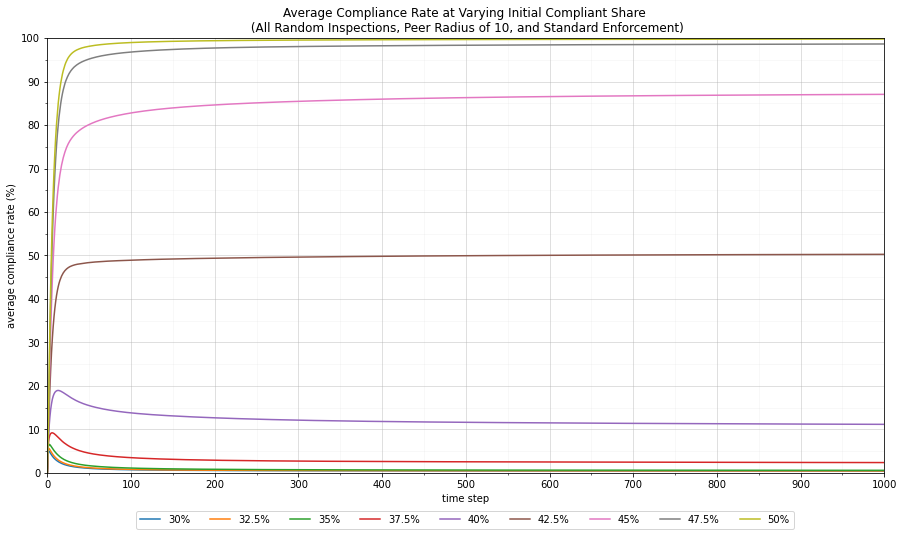

<Figure size 432x288 with 0 Axes>

In [77]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(share30_standard['step'], share30_standard['avg-compliance-rate'], label="30%")
plt.plot(share32_standard['step'], share32_standard['avg-compliance-rate'], label="32.5%")
plt.plot(share35_standard['step'], share35_standard['avg-compliance-rate'], label="35%")
plt.plot(share37_standard['step'], share37_standard['avg-compliance-rate'], label="37.5%")
plt.plot(share40_standard['step'], share40_standard['avg-compliance-rate'], label="40%")
plt.plot(share42_standard['step'], share42_standard['avg-compliance-rate'], label="42.5%")
plt.plot(share45_standard['step'], share45_standard['avg-compliance-rate'], label="45%")
plt.plot(share47_standard['step'], share47_standard['avg-compliance-rate'], label="47.5%")
plt.plot(share50_standard['step'], share50_standard['avg-compliance-rate'], label="50%")

plt.title("Average Compliance Rate at Varying Initial Compliant Share \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(.1, -.14) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Avg Compliance Rate (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

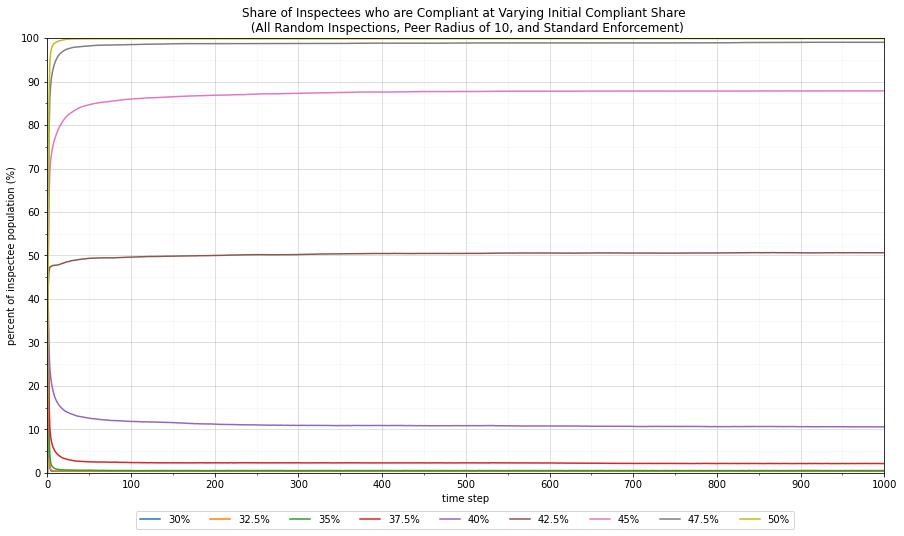

<Figure size 432x288 with 0 Axes>

In [78]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(share30_standard['step'], share30_standard['perc-compliant'], label="30%")
plt.plot(share32_standard['step'], share32_standard['perc-compliant'], label="32.5%")
plt.plot(share35_standard['step'], share35_standard['perc-compliant'], label="35%")
plt.plot(share37_standard['step'], share37_standard['perc-compliant'], label="37.5%")
plt.plot(share40_standard['step'], share40_standard['perc-compliant'], label="40%")
plt.plot(share42_standard['step'], share42_standard['perc-compliant'], label="42.5%")
plt.plot(share45_standard['step'], share45_standard['perc-compliant'], label="45%")
plt.plot(share47_standard['step'], share47_standard['perc-compliant'], label="47.5%")
plt.plot(share50_standard['step'], share50_standard['perc-compliant'], label="50%")

plt.title("Share of Inspectees who are Compliant at Varying Initial Compliant Share \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(.1, -.14) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Compliant (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

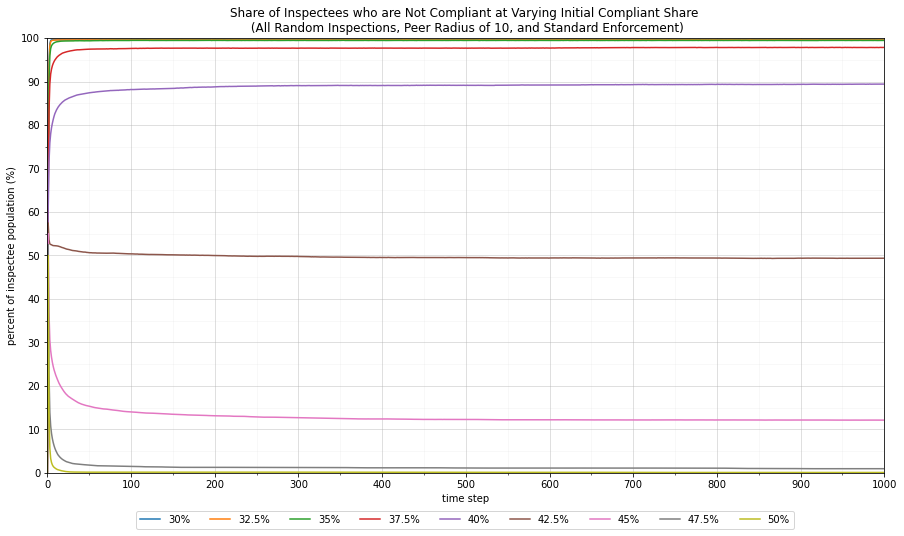

<Figure size 432x288 with 0 Axes>

In [79]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(share30_standard['step'], share30_standard['perc-noncompliant'], label="30%")
plt.plot(share32_standard['step'], share32_standard['perc-noncompliant'], label="32.5%")
plt.plot(share35_standard['step'], share35_standard['perc-noncompliant'], label="35%")
plt.plot(share37_standard['step'], share37_standard['perc-noncompliant'], label="37.5%")
plt.plot(share40_standard['step'], share40_standard['perc-noncompliant'], label="40%")
plt.plot(share42_standard['step'], share42_standard['perc-noncompliant'], label="42.5%")
plt.plot(share45_standard['step'], share45_standard['perc-noncompliant'], label="45%")
plt.plot(share47_standard['step'], share47_standard['perc-noncompliant'], label="47.5%")
plt.plot(share50_standard['step'], share50_standard['perc-noncompliant'], label="50%")

plt.title("Share of Inspectees who are Not Compliant at Varying Initial Compliant Share \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(.1, -.14) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Not Compliant (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

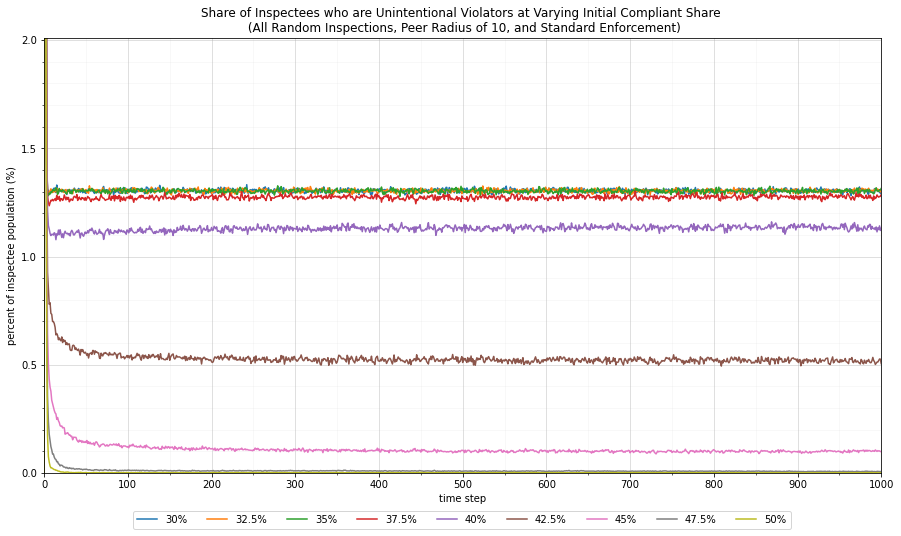

<Figure size 432x288 with 0 Axes>

In [80]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,2.1,.5))
ax.set_yticks(np.arange(0,2.1,.1), minor=True)

plt.plot(share30_standard['step'], share30_standard['perc-unintentional'], label="30%")
plt.plot(share32_standard['step'], share32_standard['perc-unintentional'], label="32.5%")
plt.plot(share35_standard['step'], share35_standard['perc-unintentional'], label="35%")
plt.plot(share37_standard['step'], share37_standard['perc-unintentional'], label="37.5%")
plt.plot(share40_standard['step'], share40_standard['perc-unintentional'], label="40%")
plt.plot(share42_standard['step'], share42_standard['perc-unintentional'], label="42.5%")
plt.plot(share45_standard['step'], share45_standard['perc-unintentional'], label="45%")
plt.plot(share47_standard['step'], share47_standard['perc-unintentional'], label="47.5%")
plt.plot(share50_standard['step'], share50_standard['perc-unintentional'], label="50%")

plt.title("Share of Inspectees who are Unintentional Violators at Varying Initial Compliant Share \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,2.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(.1, -.14) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Unintentional (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

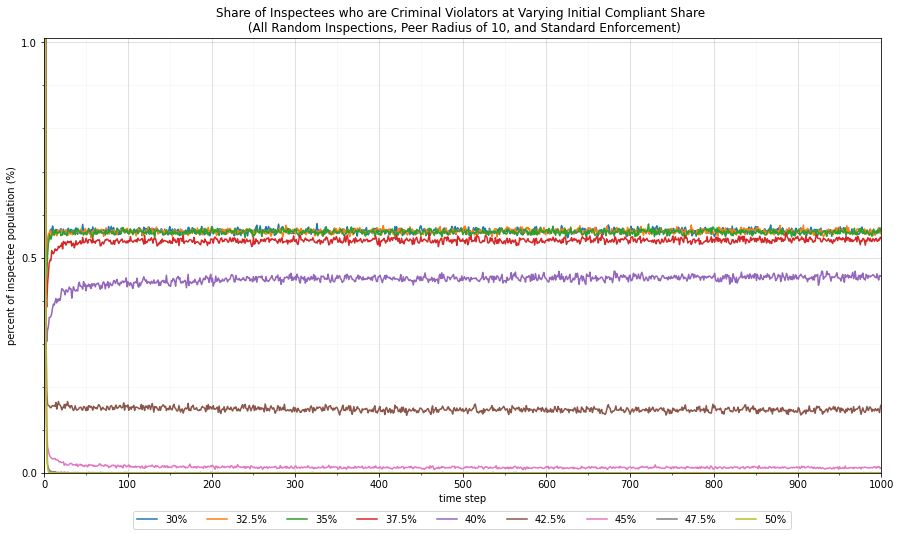

<Figure size 432x288 with 0 Axes>

In [81]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(share30_standard['step'], share30_standard['perc-criminal'], label="30%")
plt.plot(share32_standard['step'], share32_standard['perc-criminal'], label="32.5%")
plt.plot(share35_standard['step'], share35_standard['perc-criminal'], label="35%")
plt.plot(share37_standard['step'], share37_standard['perc-criminal'], label="37.5%")
plt.plot(share40_standard['step'], share40_standard['perc-criminal'], label="40%")
plt.plot(share42_standard['step'], share42_standard['perc-criminal'], label="42.5%")
plt.plot(share45_standard['step'], share45_standard['perc-criminal'], label="45%")
plt.plot(share47_standard['step'], share47_standard['perc-criminal'], label="47.5%")
plt.plot(share50_standard['step'], share50_standard['perc-criminal'], label="50%")

plt.title("Share of Inspectees who are Criminal Violators at Varying Initial Compliant Share \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(.1, -.14) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Criminal (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

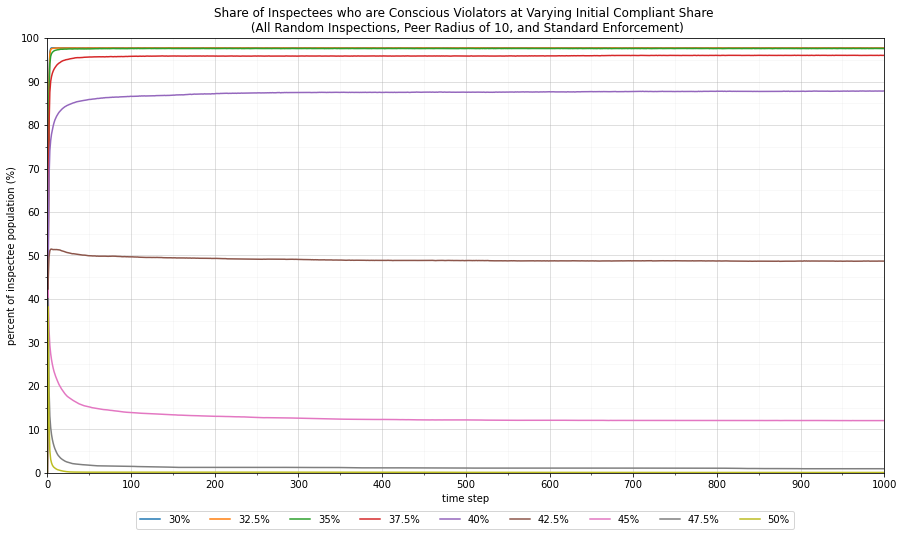

<Figure size 432x288 with 0 Axes>

In [82]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(share30_standard['step'], share30_standard['perc-conscious'], label="30%")
plt.plot(share32_standard['step'], share32_standard['perc-conscious'], label="32.5%")
plt.plot(share35_standard['step'], share35_standard['perc-conscious'], label="35%")
plt.plot(share37_standard['step'], share37_standard['perc-conscious'], label="37.5%")
plt.plot(share40_standard['step'], share40_standard['perc-conscious'], label="40%")
plt.plot(share42_standard['step'], share42_standard['perc-conscious'], label="42.5%")
plt.plot(share45_standard['step'], share45_standard['perc-conscious'], label="45%")
plt.plot(share47_standard['step'], share47_standard['perc-conscious'], label="47.5%")
plt.plot(share50_standard['step'], share50_standard['perc-conscious'], label="50%")

plt.title("Share of Inspectees who are Conscious Violators at Varying Initial Compliant Share \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(.1, -.14) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Conscious (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

### Responsive Enforcement

In [28]:
rand_resp_compliantshare =  rand_resp_compliantshare_df.groupby(['compliantshare','step'], as_index=False).mean()
rand_resp_compliantshare

compliantshare  step    run  run_num  avg-compliance-rate  \
0               30.0     0   61.5     25.5             0.000000   
1               30.0     1   61.5     25.5             5.007108   
2               30.0     2   61.5     25.5             5.422061   
3               30.0     3   61.5     25.5             5.460650   
4               30.0     4   61.5     25.5             5.433993   
...              ...   ...    ...      ...                  ...   
9004            50.0   996  389.5     25.5            99.936155   
9005            50.0   997  389.5     25.5            99.936218   
9006            50.0   998  389.5     25.5            99.936282   
9007            50.0   999  389.5     25.5            99.936346   
9008            50.0  1000  389.5     25.5            99.936411   

      #-compliant-inspectees  #-unintentional-violators  \
0                       0.00                       0.00   
1                    2363.00                    1147.00   
2                     695.80                     230.40   
3                     434.54                      96.90   
4                     381.18                      79.66   
...                      ...                        ...   
9004                 7878.00                       0.00   
9005                 7878.00                       0.00   
9006                 7878.00                       0.00   
9007                 7878.00                       0.00   
9008                 7878.00                       0.00   

      #-conscious-violators  #-criminal-violators  total-inspectees  \
0                      0.00                  0.00              0.00   
1                   4213.00                154.00           7877.00   
2                   6941.12                 10.60           7877.92   
3                   7323.22                 23.32           7877.98   
4                   7390.62                 26.54           7878.00   
...                     ...                   ...               ...   
9004                   0.00                  0.00           7878.00   
9005                   0.00                  0.00           7878.00   
9006                   0.00                  0.00           7878.00   
9007                   0.00                  0.00           7878.00   
9008                   0.00                  0.00           7878.00   

      perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0           0.000000            0.000000        0.000000       0.000000   
1          29.998730           14.561381       53.484829       1.955059   
2           8.832277            2.924629       88.108541       0.134553   
3           5.515881            1.230011       92.958093       0.296015   
4           4.838538            1.011170       93.813404       0.336888   
...              ...                 ...             ...            ...   
9004      100.000000            0.000000        0.000000       0.000000   
9005      100.000000            0.000000        0.000000       0.000000   
9006      100.000000            0.000000        0.000000       0.000000   
9007      100.000000            0.000000        0.000000       0.000000   
9008      100.000000            0.000000        0.000000       0.000000   

      perc-noncompliant  
0              0.000000  
1             70.001270  
2             91.167723  
3             94.484119  
4             95.161462  
...                 ...  
9004           0.000000  
9005           0.000000  
9006           0.000000  
9007           0.000000  
9008           0.000000  

[9009 rows x 15 columns]

In [29]:
share30_resp = rand_resp_compliantshare.query("compliantshare==30.0")
share32_resp = rand_resp_compliantshare.query("compliantshare==32.5")
share35_resp = rand_resp_compliantshare.query("compliantshare==35.0")
share37_resp = rand_resp_compliantshare.query("compliantshare==37.5")
share40_resp = rand_resp_compliantshare.query("compliantshare==40.0")
share42_resp = rand_resp_compliantshare.query("compliantshare==42.5")
share45_resp = rand_resp_compliantshare.query("compliantshare==45.0")
share47_resp = rand_resp_compliantshare.query("compliantshare==47.5")
share50_resp = rand_resp_compliantshare.query("compliantshare==50.0")
share47_resp

compliantshare  step    run  run_num  avg-compliance-rate  \
7007            47.5     0  348.5     25.5             0.000000   
7008            47.5     1  348.5     25.5             7.924092   
7009            47.5     2  348.5     25.5            20.810231   
7010            47.5     3  348.5     25.5            32.530041   
7011            47.5     4  348.5     25.5            42.573517   
...              ...   ...    ...      ...                  ...   
8003            47.5   996  348.5     25.5            99.921442   
8004            47.5   997  348.5     25.5            99.921521   
8005            47.5   998  348.5     25.5            99.921599   
8006            47.5   999  348.5     25.5            99.921677   
8007            47.5  1000  348.5     25.5            99.921756   

      #-compliant-inspectees  #-unintentional-violators  \
7007                    0.00                       0.00   
7008                 3742.00                     860.00   
7009                 6787.02                     209.32   
7010                 7477.00                      47.08   
7011                 7678.98                      13.42   
...                      ...                        ...   
8003                 7878.00                       0.00   
8004                 7878.00                       0.00   
8005                 7878.00                       0.00   
8006                 7878.00                       0.00   
8007                 7878.00                       0.00   

      #-conscious-violators  #-criminal-violators  total-inspectees  \
7007                   0.00                  0.00              0.00   
7008                3159.00                115.00           7876.00   
7009                 875.30                  6.14           7877.78   
7010                 353.36                  0.52           7877.96   
7011                 185.54                  0.06           7878.00   
...                     ...                   ...               ...   
8003                   0.00                  0.00           7878.00   
8004                   0.00                  0.00           7878.00   
8005                   0.00                  0.00           7878.00   
8006                   0.00                  0.00           7878.00   
8007                   0.00                  0.00           7878.00   

      perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
7007        0.000000            0.000000        0.000000       0.000000   
7008       47.511427           10.919248       40.109192       1.460132   
7009       86.153959            2.657094       11.111006       0.077941   
7010       94.910354            0.597616        4.485429       0.006601   
7011       97.473724            0.170348        2.355166       0.000762   
...              ...                 ...             ...            ...   
8003      100.000000            0.000000        0.000000       0.000000   
8004      100.000000            0.000000        0.000000       0.000000   
8005      100.000000            0.000000        0.000000       0.000000   
8006      100.000000            0.000000        0.000000       0.000000   
8007      100.000000            0.000000        0.000000       0.000000   

      perc-noncompliant  
7007           0.000000  
7008          52.488573  
7009          13.846041  
7010           5.089646  
7011           2.526276  
...                 ...  
8003           0.000000  
8004           0.000000  
8005           0.000000  
8006           0.000000  
8007           0.000000  

[1001 rows x 15 columns]

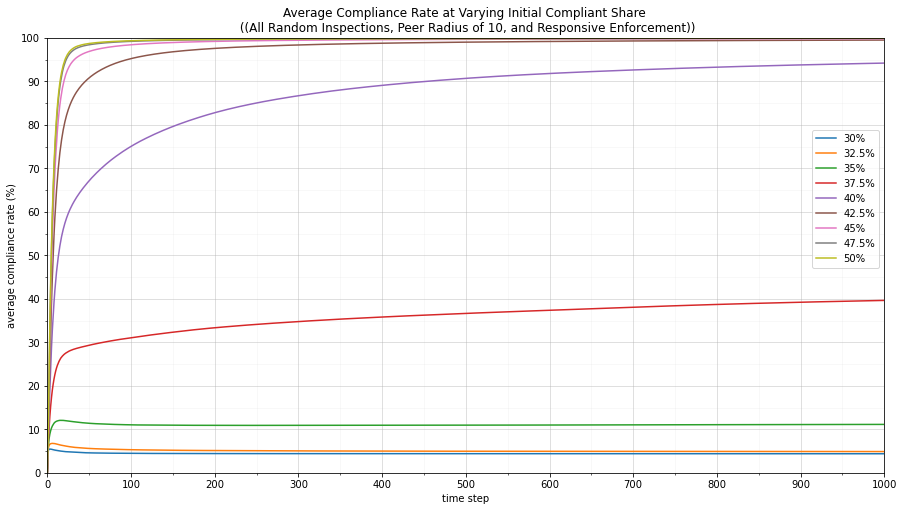

<Figure size 432x288 with 0 Axes>

In [83]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(share30_resp['step'], share30_resp['avg-compliance-rate'], label="30%")
plt.plot(share32_resp['step'], share32_resp['avg-compliance-rate'], label="32.5%")
plt.plot(share35_resp['step'], share35_resp['avg-compliance-rate'], label="35%")
plt.plot(share37_resp['step'], share37_resp['avg-compliance-rate'], label="37.5%")
plt.plot(share40_resp['step'], share40_resp['avg-compliance-rate'], label="40%")
plt.plot(share42_resp['step'], share42_resp['avg-compliance-rate'], label="42.5%")
plt.plot(share45_resp['step'], share45_resp['avg-compliance-rate'], label="45%")
plt.plot(share47_resp['step'], share47_resp['avg-compliance-rate'], label="47.5%")
plt.plot(share50_resp['step'], share50_resp['avg-compliance-rate'], label="50%")

plt.title("Average Compliance Rate at Varying Initial Compliant Share \n ((All Random Inspections, Peer Radius of 10, and Responsive Enforcement))")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(bbox_to_anchor=(1, .8) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Avg Compliance Rate (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

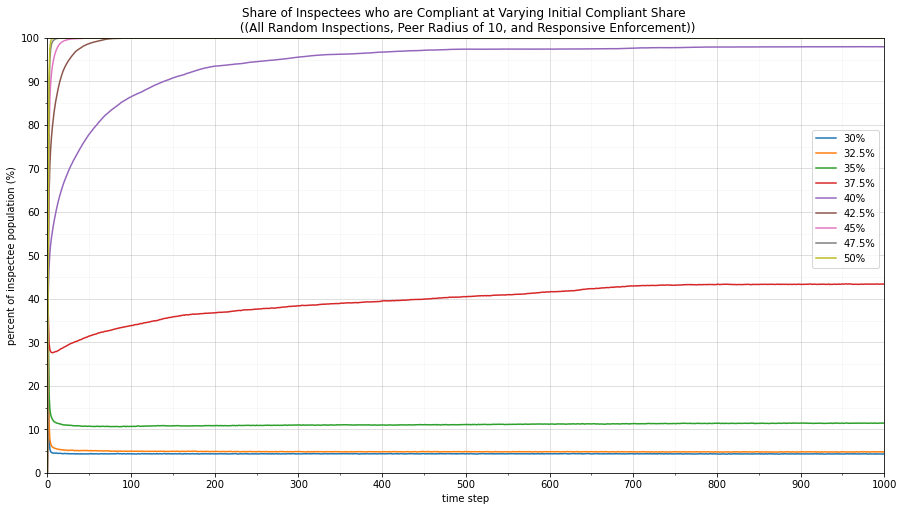

<Figure size 432x288 with 0 Axes>

In [84]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(share30_resp['step'], share30_resp['perc-compliant'], label="30%")
plt.plot(share32_resp['step'], share32_resp['perc-compliant'], label="32.5%")
plt.plot(share35_resp['step'], share35_resp['perc-compliant'], label="35%")
plt.plot(share37_resp['step'], share37_resp['perc-compliant'], label="37.5%")
plt.plot(share40_resp['step'], share40_resp['perc-compliant'], label="40%")
plt.plot(share42_resp['step'], share42_resp['perc-compliant'], label="42.5%")
plt.plot(share45_resp['step'], share45_resp['perc-compliant'], label="45%")
plt.plot(share47_resp['step'], share47_resp['perc-compliant'], label="47.5%")
plt.plot(share50_resp['step'], share50_resp['perc-compliant'], label="50%")

plt.title("Share of Inspectees who are Compliant at Varying Initial Compliant Share \n ((All Random Inspections, Peer Radius of 10, and Responsive Enforcement))")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(bbox_to_anchor=(1, .8) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Compliant (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

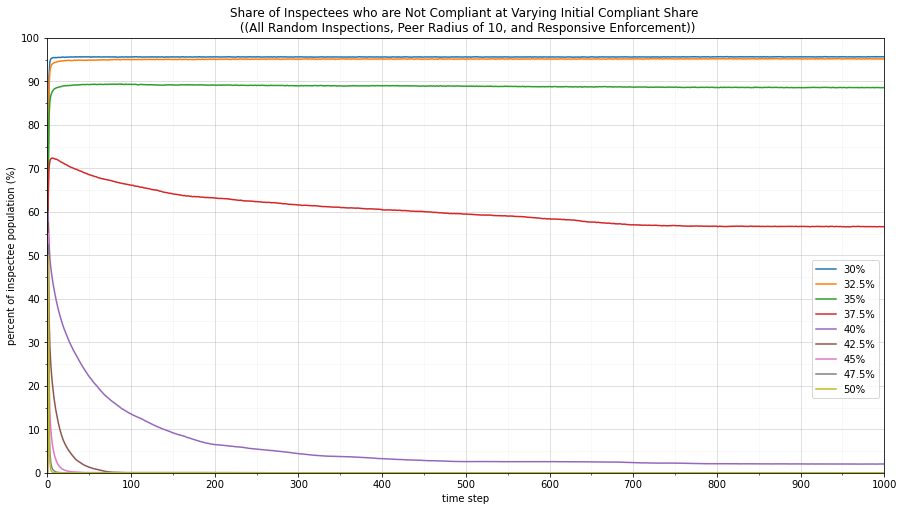

<Figure size 432x288 with 0 Axes>

In [85]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(share30_resp['step'], share30_resp['perc-noncompliant'], label="30%")
plt.plot(share32_resp['step'], share32_resp['perc-noncompliant'], label="32.5%")
plt.plot(share35_resp['step'], share35_resp['perc-noncompliant'], label="35%")
plt.plot(share37_resp['step'], share37_resp['perc-noncompliant'], label="37.5%")
plt.plot(share40_resp['step'], share40_resp['perc-noncompliant'], label="40%")
plt.plot(share42_resp['step'], share42_resp['perc-noncompliant'], label="42.5%")
plt.plot(share45_resp['step'], share45_resp['perc-noncompliant'], label="45%")
plt.plot(share47_resp['step'], share47_resp['perc-noncompliant'], label="47.5%")
plt.plot(share50_resp['step'], share50_resp['perc-noncompliant'], label="50%")

plt.title("Share of Inspectees who are Not Compliant at Varying Initial Compliant Share \n ((All Random Inspections, Peer Radius of 10, and Responsive Enforcement))")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(bbox_to_anchor=(1, .5) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Not Compliant (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

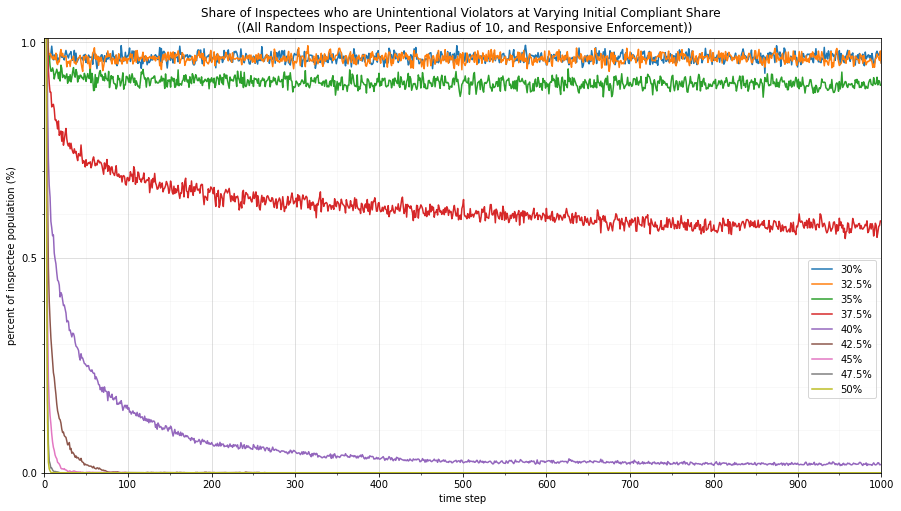

<Figure size 432x288 with 0 Axes>

In [86]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.1,.5))
ax.set_yticks(np.arange(0,1.1,.1), minor=True)

plt.plot(share30_resp['step'], share30_resp['perc-unintentional'], label="30%")
plt.plot(share32_resp['step'], share32_resp['perc-unintentional'], label="32.5%")
plt.plot(share35_resp['step'], share35_resp['perc-unintentional'], label="35%")
plt.plot(share37_resp['step'], share37_resp['perc-unintentional'], label="37.5%")
plt.plot(share40_resp['step'], share40_resp['perc-unintentional'], label="40%")
plt.plot(share42_resp['step'], share42_resp['perc-unintentional'], label="42.5%")
plt.plot(share45_resp['step'], share45_resp['perc-unintentional'], label="45%")
plt.plot(share47_resp['step'], share47_resp['perc-unintentional'], label="47.5%")
plt.plot(share50_resp['step'], share50_resp['perc-unintentional'], label="50%")

plt.title("Share of Inspectees who are Unintentional Violators at Varying Initial Compliant Share \n ((All Random Inspections, Peer Radius of 10, and Responsive Enforcement))")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(bbox_to_anchor=(1, .5) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Unintentional (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

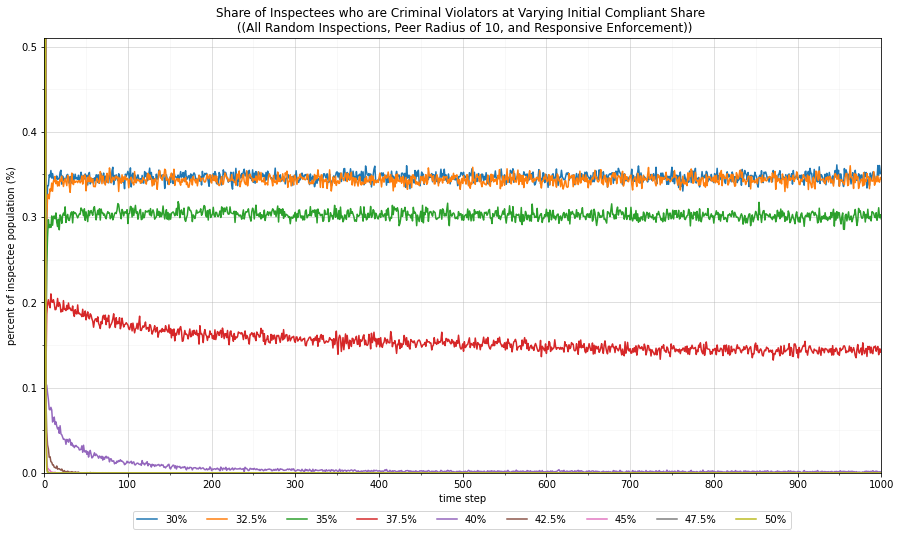

<Figure size 432x288 with 0 Axes>

In [87]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,.51,.1))
ax.set_yticks(np.arange(0,.51,.05), minor=True)

plt.plot(share30_resp['step'], share30_resp['perc-criminal'], label="30%")
plt.plot(share32_resp['step'], share32_resp['perc-criminal'], label="32.5%")
plt.plot(share35_resp['step'], share35_resp['perc-criminal'], label="35%")
plt.plot(share37_resp['step'], share37_resp['perc-criminal'], label="37.5%")
plt.plot(share40_resp['step'], share40_resp['perc-criminal'], label="40%")
plt.plot(share42_resp['step'], share42_resp['perc-criminal'], label="42.5%")
plt.plot(share45_resp['step'], share45_resp['perc-criminal'], label="45%")
plt.plot(share47_resp['step'], share47_resp['perc-criminal'], label="47.5%")
plt.plot(share50_resp['step'], share50_resp['perc-criminal'], label="50%")

plt.title("Share of Inspectees who are Criminal Violators at Varying Initial Compliant Share \n ((All Random Inspections, Peer Radius of 10, and Responsive Enforcement))")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,.51)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(.1, -.14) )

plt.show()
plt.savefig('Initial Compliant Share- Time vs Criminal (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

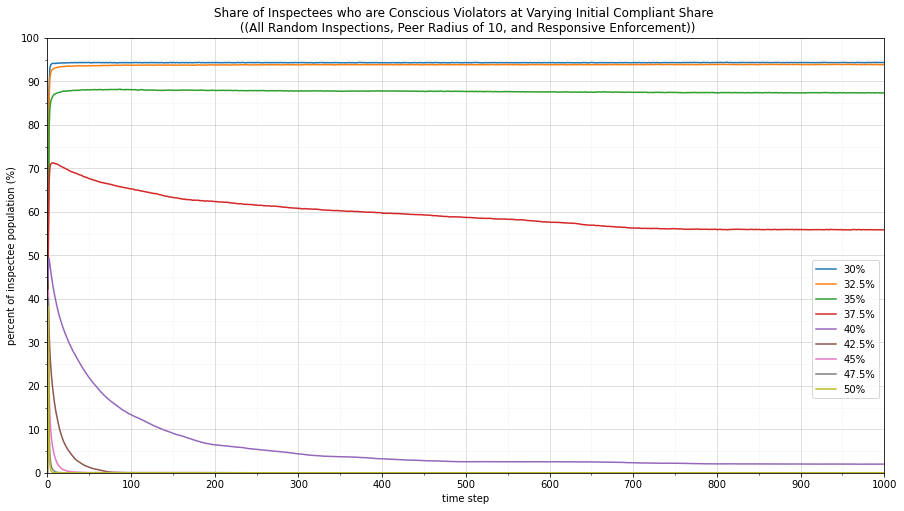

<Figure size 432x288 with 0 Axes>

In [88]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(share30_resp['step'], share30_resp['perc-conscious'], label="30%")
plt.plot(share32_resp['step'], share32_resp['perc-conscious'], label="32.5%")
plt.plot(share35_resp['step'], share35_resp['perc-conscious'], label="35%")
plt.plot(share37_resp['step'], share37_resp['perc-conscious'], label="37.5%")
plt.plot(share40_resp['step'], share40_resp['perc-conscious'], label="40%")
plt.plot(share42_resp['step'], share42_resp['perc-conscious'], label="42.5%")
plt.plot(share45_resp['step'], share45_resp['perc-conscious'], label="45%")
plt.plot(share47_resp['step'], share47_resp['perc-conscious'], label="47.5%")
plt.plot(share50_resp['step'], share50_resp['perc-conscious'], label="50%")

plt.title("Share of Inspectees who are Conscious Violators at Varying Initial Compliant Share \n ((All Random Inspections, Peer Radius of 10, and Responsive Enforcement))")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend(bbox_to_anchor=(1, .5) )
plt.show()
plt.savefig('Initial Compliant Share- Time vs Conscious (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

### Boxplot

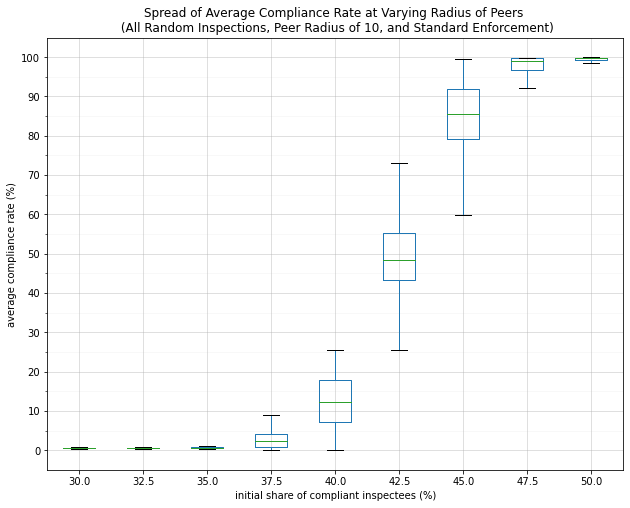

In [90]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
rand_standard_compliantshare_df.boxplot(column='avg-compliance-rate',by='compliantshare', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Radius of Peers \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('initial share of compliant inspectees (%)')
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Initial compliant share Boxplot Avg Compliance Standard.png', dpi=300, bbox_inches='tight')

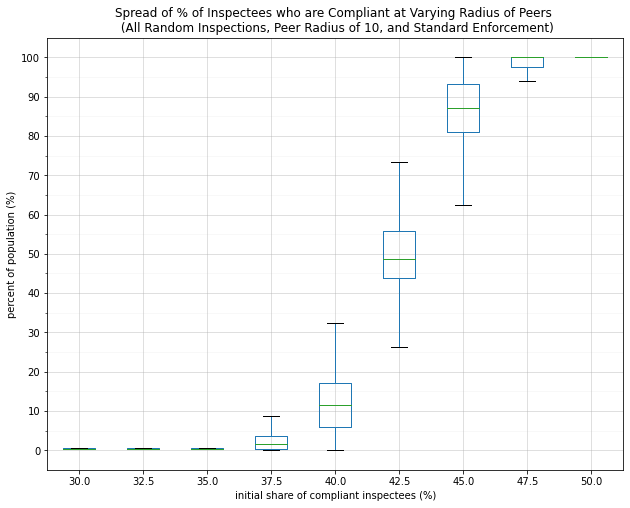

In [91]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
rand_standard_compliantshare_df.boxplot(column='perc-compliant',by='compliantshare', ax=ax,showfliers=False)
plt.title('Spread of % of Inspectees who are Compliant at Varying Radius of Peers \n (All Random Inspections, Peer Radius of 10, and Standard Enforcement)')
plt.ylabel('percent of population (%)')
plt.xlabel('initial share of compliant inspectees (%)')
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Initial compliant share Boxplot Compliant Standard.png', dpi=300, bbox_inches='tight')

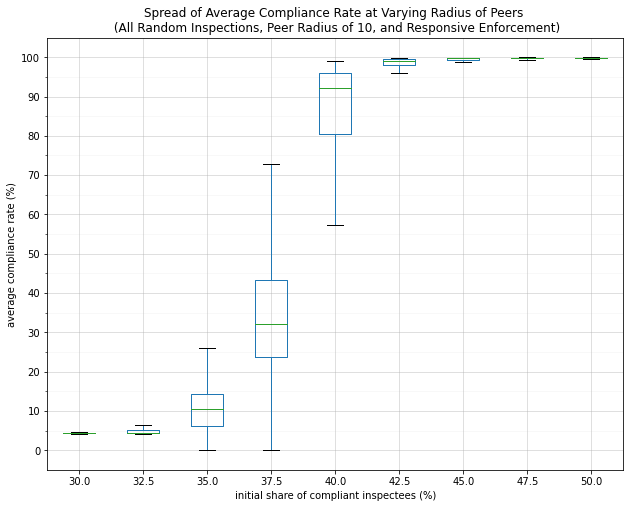

In [92]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
rand_resp_compliantshare_df.boxplot(column='avg-compliance-rate',by='compliantshare', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Radius of Peers \n (All Random Inspections, Peer Radius of 10, and Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('initial share of compliant inspectees (%)')
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Initial compliant share Boxplot Avg Compliance Resp.png', dpi=300, bbox_inches='tight')

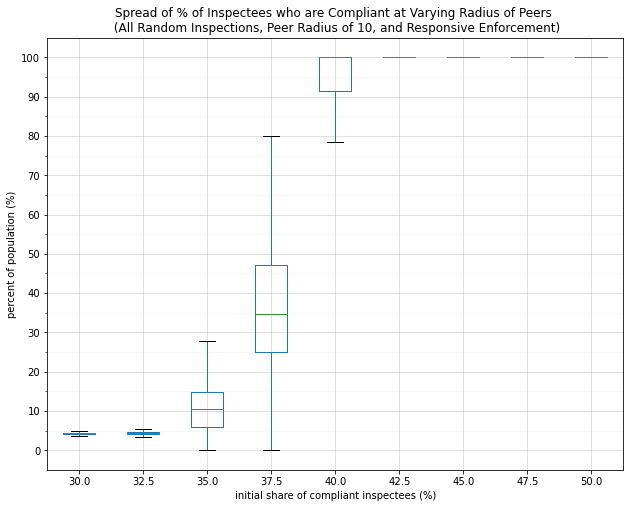

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
rand_resp_compliantshare_df.boxplot(column='perc-compliant',by='compliantshare', ax=ax,showfliers=False)
plt.title('Spread of % of Inspectees who are Compliant at Varying Radius of Peers \n (All Random Inspections, Peer Radius of 10, and Responsive Enforcement)')
plt.ylabel('percent of population (%)')
plt.xlabel('initial share of compliant inspectees (%)')
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Initial compliant share Boxplot Compliant Resp.png', dpi=300, bbox_inches='tight')

### Plot each run

In [40]:
rand_resp_compliantshare_df['compliantshareID'] = rand_resp_compliantshare_df['compliantshare'] * 10
rand_resp_compliantshare_df = rand_resp_compliantshare_df.astype({'compliantshareID':'int'})

rand_standard_compliantshare_df['compliantshareID'] = rand_standard_compliantshare_df['compliantshare'] * 10
rand_standard_compliantshare_df = rand_standard_compliantshare_df.astype({'compliantshareID':'int'})

In [41]:
# Create new dataframes by compliant share value
for i, x in rand_resp_compliantshare_df.groupby('compliantshareID'):
    globals()['rand_resp_compliantshare_' + str(i)] = x

# Create new dataframes by compliant share value
for i, x in rand_standard_compliantshare_df.groupby('compliantshareID'):
    globals()['rand_standard_compliantshare_' + str(i)] = x

In [42]:
rand_standard_compliantshare_425

run  run_num  compliantshare  step  avg-compliance-rate  \
250250   26        1            42.5     0             0.000000   
250251   26        1            42.5     1             6.917999   
250252   26        1            42.5     2            13.778878   
250253   26        1            42.5     3            19.846408   
250254   26        1            42.5     4            24.629771   
...     ...      ...             ...   ...                  ...   
300295  315       50            42.5   996            57.133380   
300296  315       50            42.5   997            57.133770   
300297  315       50            42.5   998            57.134450   
300298  315       50            42.5   999            57.135010   
300299  315       50            42.5  1000            57.135490   

        #-compliant-inspectees  #-unintentional-violators  \
250250                       0                          0   
250251                    3348                        942   
250252                    3731                        255   
250253                    3872                         98   
250254                    3898                         69   
...                        ...                        ...   
300295                    4537                         35   
300296                    4541                         35   
300297                    4545                         37   
300298                    4539                         33   
300299                    4546                         39   

        #-conscious-violators  #-criminal-violators  total-inspectees  \
250250                      0                     0                 0   
250251                   3460                   126              7876   
250252                   3859                    33              7878   
250253                   3893                    15              7878   
250254                   3898                    13              7878   
...                       ...                   ...               ...   
300295                   3298                     8              7878   
300296                   3290                    12              7878   
300297                   3292                     4              7878   
300298                   3301                     5              7878   
300299                   3283                    10              7878   

        perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
250250        0.000000            0.000000        0.000000       0.000000   
250251       42.508888           11.960386       43.930929       1.599797   
250252       47.359736            3.236862       48.984514       0.418888   
250253       49.149530            1.243971       49.416095       0.190404   
250254       49.479563            0.875857       49.479563       0.165017   
...                ...                 ...             ...            ...   
300295       57.590759            0.444275       41.863417       0.101549   
300296       57.641533            0.444275       41.761868       0.152323   
300297       57.692308            0.469662       41.787256       0.050774   
300298       57.616146            0.418888       41.901498       0.063468   
300299       57.705001            0.495050       41.673013       0.126936   

        perc-noncompliant  compliantshareID  
250250           0.000000               425  
250251          57.491112               425  
250252          52.640264               425  
250253          50.850470               425  
250254          50.520437               425  
...                   ...               ...  
300295          42.409241               425  
300296          42.358467               425  
300297          42.307692               425  
300298          42.383854               425  
300299          42.294999               425  

[50050 rows x 16 columns]

### Standard Enforcement: Plot each run

In [43]:
for i, x in rand_standard_compliantshare_425.groupby('run_num'):
    globals()['rand_standard_compliantshare_425_' + str(i)] = x

for i, x in rand_standard_compliantshare_450.groupby('run_num'):
    globals()['rand_standard_compliantshare_450_' + str(i)] = x

for i, x in rand_standard_compliantshare_475.groupby('run_num'):
    globals()['rand_standard_compliantshare_475_' + str(i)] = x

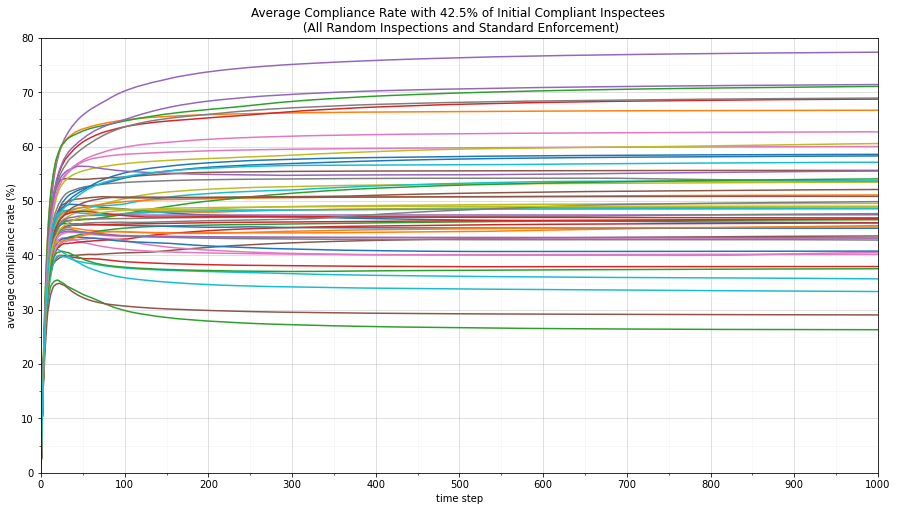

<Figure size 432x288 with 0 Axes>

In [94]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,80.1,10))
ax.set_yticks(np.arange(0,80.1,5), minor=True)

plt.plot(rand_standard_compliantshare_425_1['step'], rand_standard_compliantshare_425_1['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_2['step'], rand_standard_compliantshare_425_2['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_3['step'], rand_standard_compliantshare_425_3['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_4['step'], rand_standard_compliantshare_425_4['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_5['step'], rand_standard_compliantshare_425_5['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_6['step'], rand_standard_compliantshare_425_6['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_7['step'], rand_standard_compliantshare_425_7['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_8['step'], rand_standard_compliantshare_425_8['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_9['step'], rand_standard_compliantshare_425_9['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_10['step'], rand_standard_compliantshare_425_10['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_11['step'], rand_standard_compliantshare_425_11['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_12['step'], rand_standard_compliantshare_425_12['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_13['step'], rand_standard_compliantshare_425_13['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_14['step'], rand_standard_compliantshare_425_14['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_15['step'], rand_standard_compliantshare_425_15['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_16['step'], rand_standard_compliantshare_425_16['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_17['step'], rand_standard_compliantshare_425_17['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_18['step'], rand_standard_compliantshare_425_18['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_19['step'], rand_standard_compliantshare_425_19['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_20['step'], rand_standard_compliantshare_425_20['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_21['step'], rand_standard_compliantshare_425_21['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_22['step'], rand_standard_compliantshare_425_22['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_23['step'], rand_standard_compliantshare_425_23['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_24['step'], rand_standard_compliantshare_425_24['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_25['step'], rand_standard_compliantshare_425_25['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_26['step'], rand_standard_compliantshare_425_26['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_27['step'], rand_standard_compliantshare_425_27['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_28['step'], rand_standard_compliantshare_425_28['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_29['step'], rand_standard_compliantshare_425_29['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_30['step'], rand_standard_compliantshare_425_30['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_31['step'], rand_standard_compliantshare_425_31['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_32['step'], rand_standard_compliantshare_425_32['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_33['step'], rand_standard_compliantshare_425_33['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_34['step'], rand_standard_compliantshare_425_34['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_35['step'], rand_standard_compliantshare_425_35['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_36['step'], rand_standard_compliantshare_425_36['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_37['step'], rand_standard_compliantshare_425_37['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_38['step'], rand_standard_compliantshare_425_38['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_39['step'], rand_standard_compliantshare_425_39['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_40['step'], rand_standard_compliantshare_425_40['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_41['step'], rand_standard_compliantshare_425_41['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_42['step'], rand_standard_compliantshare_425_42['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_43['step'], rand_standard_compliantshare_425_43['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_44['step'], rand_standard_compliantshare_425_44['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_45['step'], rand_standard_compliantshare_425_45['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_46['step'], rand_standard_compliantshare_425_46['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_47['step'], rand_standard_compliantshare_425_47['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_48['step'], rand_standard_compliantshare_425_48['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_49['step'], rand_standard_compliantshare_425_49['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_50['step'], rand_standard_compliantshare_425_50['avg-compliance-rate'])#, label="Run 5")

plt.title("Average Compliance Rate with 42.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,80)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 42.5- Time vs. Avg Compliance All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

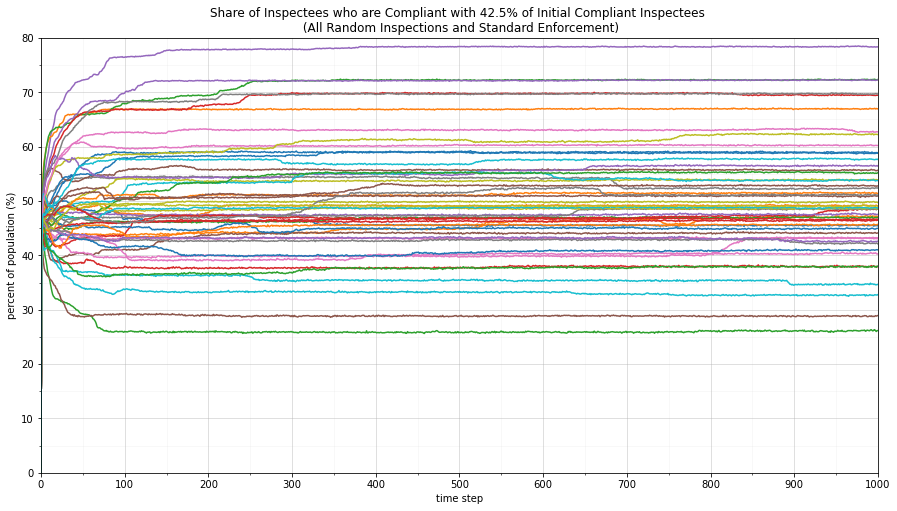

<Figure size 432x288 with 0 Axes>

In [95]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,80.1,10))
ax.set_yticks(np.arange(0,80.1,5), minor=True)

plt.plot(rand_standard_compliantshare_425_1['step'], rand_standard_compliantshare_425_1['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_2['step'], rand_standard_compliantshare_425_2['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_3['step'], rand_standard_compliantshare_425_3['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_4['step'], rand_standard_compliantshare_425_4['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_5['step'], rand_standard_compliantshare_425_5['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_6['step'], rand_standard_compliantshare_425_6['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_7['step'], rand_standard_compliantshare_425_7['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_8['step'], rand_standard_compliantshare_425_8['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_9['step'], rand_standard_compliantshare_425_9['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_10['step'], rand_standard_compliantshare_425_10['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_11['step'], rand_standard_compliantshare_425_11['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_12['step'], rand_standard_compliantshare_425_12['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_13['step'], rand_standard_compliantshare_425_13['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_14['step'], rand_standard_compliantshare_425_14['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_15['step'], rand_standard_compliantshare_425_15['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_16['step'], rand_standard_compliantshare_425_16['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_17['step'], rand_standard_compliantshare_425_17['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_18['step'], rand_standard_compliantshare_425_18['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_19['step'], rand_standard_compliantshare_425_19['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_20['step'], rand_standard_compliantshare_425_20['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_21['step'], rand_standard_compliantshare_425_21['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_22['step'], rand_standard_compliantshare_425_22['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_23['step'], rand_standard_compliantshare_425_23['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_24['step'], rand_standard_compliantshare_425_24['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_25['step'], rand_standard_compliantshare_425_25['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_26['step'], rand_standard_compliantshare_425_26['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_27['step'], rand_standard_compliantshare_425_27['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_28['step'], rand_standard_compliantshare_425_28['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_29['step'], rand_standard_compliantshare_425_29['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_30['step'], rand_standard_compliantshare_425_30['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_31['step'], rand_standard_compliantshare_425_31['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_32['step'], rand_standard_compliantshare_425_32['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_33['step'], rand_standard_compliantshare_425_33['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_34['step'], rand_standard_compliantshare_425_34['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_35['step'], rand_standard_compliantshare_425_35['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_36['step'], rand_standard_compliantshare_425_36['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_37['step'], rand_standard_compliantshare_425_37['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_38['step'], rand_standard_compliantshare_425_38['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_39['step'], rand_standard_compliantshare_425_39['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_40['step'], rand_standard_compliantshare_425_40['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_41['step'], rand_standard_compliantshare_425_41['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_42['step'], rand_standard_compliantshare_425_42['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_43['step'], rand_standard_compliantshare_425_43['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_44['step'], rand_standard_compliantshare_425_44['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_45['step'], rand_standard_compliantshare_425_45['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_46['step'], rand_standard_compliantshare_425_46['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_47['step'], rand_standard_compliantshare_425_47['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_48['step'], rand_standard_compliantshare_425_48['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_49['step'], rand_standard_compliantshare_425_49['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_50['step'], rand_standard_compliantshare_425_50['perc-compliant'])#, label="Run 5")

plt.title("Share of Inspectees who are Compliant with 42.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,80)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 42.5- Time vs. Compliant All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

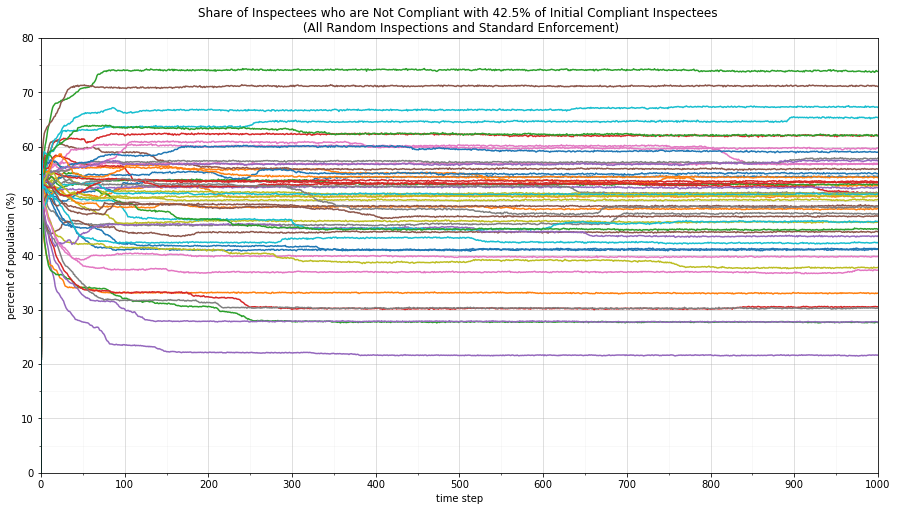

<Figure size 432x288 with 0 Axes>

In [96]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,80.1,10))
ax.set_yticks(np.arange(0,80.1,5), minor=True)

plt.plot(rand_standard_compliantshare_425_1['step'], rand_standard_compliantshare_425_1['perc-noncompliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_2['step'], rand_standard_compliantshare_425_2['perc-noncompliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_3['step'], rand_standard_compliantshare_425_3['perc-noncompliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_4['step'], rand_standard_compliantshare_425_4['perc-noncompliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_5['step'], rand_standard_compliantshare_425_5['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_6['step'], rand_standard_compliantshare_425_6['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_7['step'], rand_standard_compliantshare_425_7['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_8['step'], rand_standard_compliantshare_425_8['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_9['step'], rand_standard_compliantshare_425_9['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_10['step'], rand_standard_compliantshare_425_10['perc-noncompliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_11['step'], rand_standard_compliantshare_425_11['perc-noncompliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_12['step'], rand_standard_compliantshare_425_12['perc-noncompliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_13['step'], rand_standard_compliantshare_425_13['perc-noncompliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_14['step'], rand_standard_compliantshare_425_14['perc-noncompliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_15['step'], rand_standard_compliantshare_425_15['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_16['step'], rand_standard_compliantshare_425_16['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_17['step'], rand_standard_compliantshare_425_17['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_18['step'], rand_standard_compliantshare_425_18['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_19['step'], rand_standard_compliantshare_425_19['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_20['step'], rand_standard_compliantshare_425_20['perc-noncompliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_21['step'], rand_standard_compliantshare_425_21['perc-noncompliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_22['step'], rand_standard_compliantshare_425_22['perc-noncompliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_23['step'], rand_standard_compliantshare_425_23['perc-noncompliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_24['step'], rand_standard_compliantshare_425_24['perc-noncompliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_25['step'], rand_standard_compliantshare_425_25['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_26['step'], rand_standard_compliantshare_425_26['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_27['step'], rand_standard_compliantshare_425_27['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_28['step'], rand_standard_compliantshare_425_28['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_29['step'], rand_standard_compliantshare_425_29['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_30['step'], rand_standard_compliantshare_425_30['perc-noncompliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_31['step'], rand_standard_compliantshare_425_31['perc-noncompliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_32['step'], rand_standard_compliantshare_425_32['perc-noncompliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_33['step'], rand_standard_compliantshare_425_33['perc-noncompliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_34['step'], rand_standard_compliantshare_425_34['perc-noncompliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_35['step'], rand_standard_compliantshare_425_35['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_36['step'], rand_standard_compliantshare_425_36['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_37['step'], rand_standard_compliantshare_425_37['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_38['step'], rand_standard_compliantshare_425_38['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_39['step'], rand_standard_compliantshare_425_39['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_40['step'], rand_standard_compliantshare_425_40['perc-noncompliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_41['step'], rand_standard_compliantshare_425_41['perc-noncompliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_42['step'], rand_standard_compliantshare_425_42['perc-noncompliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_43['step'], rand_standard_compliantshare_425_43['perc-noncompliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_44['step'], rand_standard_compliantshare_425_44['perc-noncompliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_45['step'], rand_standard_compliantshare_425_45['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_46['step'], rand_standard_compliantshare_425_46['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_47['step'], rand_standard_compliantshare_425_47['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_48['step'], rand_standard_compliantshare_425_48['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_49['step'], rand_standard_compliantshare_425_49['perc-noncompliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_50['step'], rand_standard_compliantshare_425_50['perc-noncompliant'])#, label="Run 5")

plt.title("Share of Inspectees who are Not Compliant with 42.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,80)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 42.5- Time vs. Not Compliant All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

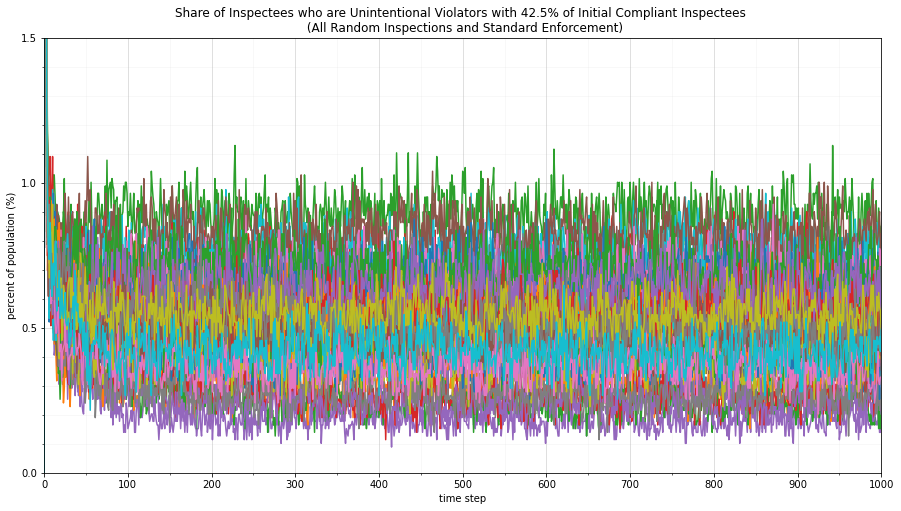

<Figure size 432x288 with 0 Axes>

In [97]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(rand_standard_compliantshare_425_1['step'], rand_standard_compliantshare_425_1['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_2['step'], rand_standard_compliantshare_425_2['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_3['step'], rand_standard_compliantshare_425_3['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_4['step'], rand_standard_compliantshare_425_4['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_5['step'], rand_standard_compliantshare_425_5['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_6['step'], rand_standard_compliantshare_425_6['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_7['step'], rand_standard_compliantshare_425_7['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_8['step'], rand_standard_compliantshare_425_8['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_9['step'], rand_standard_compliantshare_425_9['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_10['step'], rand_standard_compliantshare_425_10['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_11['step'], rand_standard_compliantshare_425_11['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_12['step'], rand_standard_compliantshare_425_12['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_13['step'], rand_standard_compliantshare_425_13['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_14['step'], rand_standard_compliantshare_425_14['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_15['step'], rand_standard_compliantshare_425_15['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_16['step'], rand_standard_compliantshare_425_16['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_17['step'], rand_standard_compliantshare_425_17['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_18['step'], rand_standard_compliantshare_425_18['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_19['step'], rand_standard_compliantshare_425_19['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_20['step'], rand_standard_compliantshare_425_20['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_21['step'], rand_standard_compliantshare_425_21['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_22['step'], rand_standard_compliantshare_425_22['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_23['step'], rand_standard_compliantshare_425_23['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_24['step'], rand_standard_compliantshare_425_24['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_25['step'], rand_standard_compliantshare_425_25['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_26['step'], rand_standard_compliantshare_425_26['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_27['step'], rand_standard_compliantshare_425_27['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_28['step'], rand_standard_compliantshare_425_28['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_29['step'], rand_standard_compliantshare_425_29['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_30['step'], rand_standard_compliantshare_425_30['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_31['step'], rand_standard_compliantshare_425_31['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_32['step'], rand_standard_compliantshare_425_32['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_33['step'], rand_standard_compliantshare_425_33['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_34['step'], rand_standard_compliantshare_425_34['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_35['step'], rand_standard_compliantshare_425_35['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_36['step'], rand_standard_compliantshare_425_36['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_37['step'], rand_standard_compliantshare_425_37['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_38['step'], rand_standard_compliantshare_425_38['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_39['step'], rand_standard_compliantshare_425_39['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_40['step'], rand_standard_compliantshare_425_40['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_41['step'], rand_standard_compliantshare_425_41['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_42['step'], rand_standard_compliantshare_425_42['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_43['step'], rand_standard_compliantshare_425_43['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_44['step'], rand_standard_compliantshare_425_44['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_45['step'], rand_standard_compliantshare_425_45['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_46['step'], rand_standard_compliantshare_425_46['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_47['step'], rand_standard_compliantshare_425_47['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_48['step'], rand_standard_compliantshare_425_48['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_49['step'], rand_standard_compliantshare_425_49['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_50['step'], rand_standard_compliantshare_425_50['perc-unintentional'])#, label="Run 5")

plt.title("Share of Inspectees who are Unintentional Violators with 42.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 42.5- Time vs. Unintentional All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

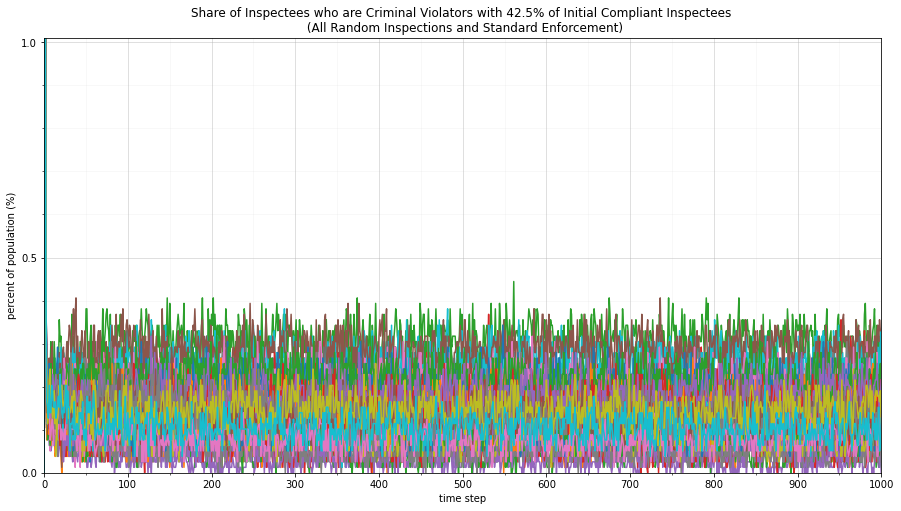

<Figure size 432x288 with 0 Axes>

In [98]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(rand_standard_compliantshare_425_1['step'], rand_standard_compliantshare_425_1['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_2['step'], rand_standard_compliantshare_425_2['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_3['step'], rand_standard_compliantshare_425_3['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_4['step'], rand_standard_compliantshare_425_4['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_5['step'], rand_standard_compliantshare_425_5['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_6['step'], rand_standard_compliantshare_425_6['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_7['step'], rand_standard_compliantshare_425_7['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_8['step'], rand_standard_compliantshare_425_8['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_9['step'], rand_standard_compliantshare_425_9['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_10['step'], rand_standard_compliantshare_425_10['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_11['step'], rand_standard_compliantshare_425_11['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_12['step'], rand_standard_compliantshare_425_12['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_13['step'], rand_standard_compliantshare_425_13['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_14['step'], rand_standard_compliantshare_425_14['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_15['step'], rand_standard_compliantshare_425_15['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_16['step'], rand_standard_compliantshare_425_16['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_17['step'], rand_standard_compliantshare_425_17['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_18['step'], rand_standard_compliantshare_425_18['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_19['step'], rand_standard_compliantshare_425_19['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_20['step'], rand_standard_compliantshare_425_20['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_21['step'], rand_standard_compliantshare_425_21['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_22['step'], rand_standard_compliantshare_425_22['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_23['step'], rand_standard_compliantshare_425_23['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_24['step'], rand_standard_compliantshare_425_24['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_25['step'], rand_standard_compliantshare_425_25['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_26['step'], rand_standard_compliantshare_425_26['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_27['step'], rand_standard_compliantshare_425_27['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_28['step'], rand_standard_compliantshare_425_28['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_29['step'], rand_standard_compliantshare_425_29['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_30['step'], rand_standard_compliantshare_425_30['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_31['step'], rand_standard_compliantshare_425_31['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_32['step'], rand_standard_compliantshare_425_32['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_33['step'], rand_standard_compliantshare_425_33['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_34['step'], rand_standard_compliantshare_425_34['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_35['step'], rand_standard_compliantshare_425_35['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_36['step'], rand_standard_compliantshare_425_36['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_37['step'], rand_standard_compliantshare_425_37['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_38['step'], rand_standard_compliantshare_425_38['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_39['step'], rand_standard_compliantshare_425_39['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_40['step'], rand_standard_compliantshare_425_40['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_41['step'], rand_standard_compliantshare_425_41['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_42['step'], rand_standard_compliantshare_425_42['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_43['step'], rand_standard_compliantshare_425_43['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_44['step'], rand_standard_compliantshare_425_44['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_45['step'], rand_standard_compliantshare_425_45['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_46['step'], rand_standard_compliantshare_425_46['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_47['step'], rand_standard_compliantshare_425_47['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_48['step'], rand_standard_compliantshare_425_48['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_49['step'], rand_standard_compliantshare_425_49['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_50['step'], rand_standard_compliantshare_425_50['perc-criminal'])#, label="Run 5")

plt.title("Share of Inspectees who are Criminal Violators with 42.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 42.5- Time vs. Criminal All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

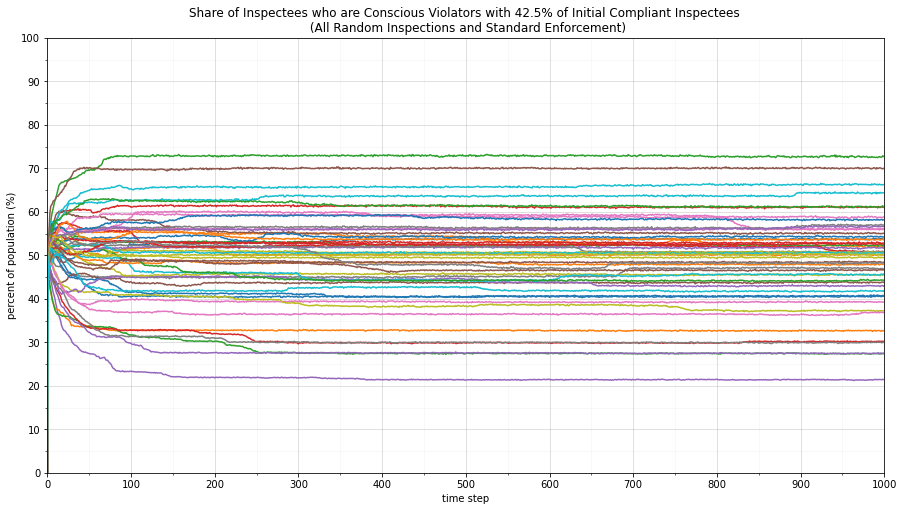

<Figure size 432x288 with 0 Axes>

In [99]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)

plt.plot(rand_standard_compliantshare_425_1['step'], rand_standard_compliantshare_425_1['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_2['step'], rand_standard_compliantshare_425_2['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_3['step'], rand_standard_compliantshare_425_3['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_4['step'], rand_standard_compliantshare_425_4['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_5['step'], rand_standard_compliantshare_425_5['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_6['step'], rand_standard_compliantshare_425_6['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_7['step'], rand_standard_compliantshare_425_7['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_8['step'], rand_standard_compliantshare_425_8['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_9['step'], rand_standard_compliantshare_425_9['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_10['step'], rand_standard_compliantshare_425_10['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_11['step'], rand_standard_compliantshare_425_11['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_12['step'], rand_standard_compliantshare_425_12['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_13['step'], rand_standard_compliantshare_425_13['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_14['step'], rand_standard_compliantshare_425_14['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_15['step'], rand_standard_compliantshare_425_15['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_16['step'], rand_standard_compliantshare_425_16['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_17['step'], rand_standard_compliantshare_425_17['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_18['step'], rand_standard_compliantshare_425_18['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_19['step'], rand_standard_compliantshare_425_19['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_20['step'], rand_standard_compliantshare_425_20['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_21['step'], rand_standard_compliantshare_425_21['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_22['step'], rand_standard_compliantshare_425_22['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_23['step'], rand_standard_compliantshare_425_23['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_24['step'], rand_standard_compliantshare_425_24['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_25['step'], rand_standard_compliantshare_425_25['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_26['step'], rand_standard_compliantshare_425_26['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_27['step'], rand_standard_compliantshare_425_27['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_28['step'], rand_standard_compliantshare_425_28['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_29['step'], rand_standard_compliantshare_425_29['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_30['step'], rand_standard_compliantshare_425_30['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_31['step'], rand_standard_compliantshare_425_31['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_32['step'], rand_standard_compliantshare_425_32['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_33['step'], rand_standard_compliantshare_425_33['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_34['step'], rand_standard_compliantshare_425_34['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_35['step'], rand_standard_compliantshare_425_35['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_36['step'], rand_standard_compliantshare_425_36['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_37['step'], rand_standard_compliantshare_425_37['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_38['step'], rand_standard_compliantshare_425_38['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_39['step'], rand_standard_compliantshare_425_39['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_40['step'], rand_standard_compliantshare_425_40['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_425_41['step'], rand_standard_compliantshare_425_41['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_425_42['step'], rand_standard_compliantshare_425_42['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_425_43['step'], rand_standard_compliantshare_425_43['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_425_44['step'], rand_standard_compliantshare_425_44['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_425_45['step'], rand_standard_compliantshare_425_45['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_46['step'], rand_standard_compliantshare_425_46['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_47['step'], rand_standard_compliantshare_425_47['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_48['step'], rand_standard_compliantshare_425_48['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_49['step'], rand_standard_compliantshare_425_49['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_425_50['step'], rand_standard_compliantshare_425_50['perc-conscious'])#, label="Run 5")

plt.title("Share of Inspectees who are Conscious Violators with 42.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 42.5- Time vs. Conscious All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

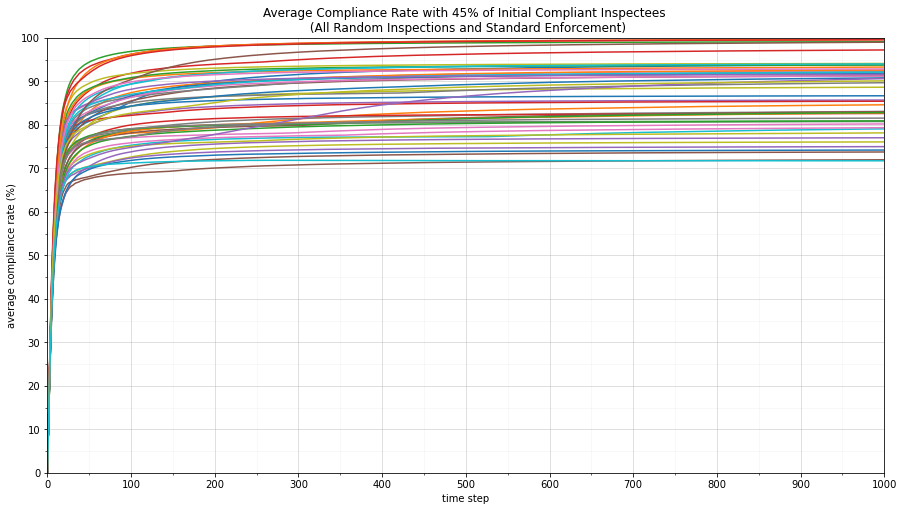

<Figure size 432x288 with 0 Axes>

In [100]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_standard_compliantshare_450_1['step'], rand_standard_compliantshare_450_1['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_2['step'], rand_standard_compliantshare_450_2['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_3['step'], rand_standard_compliantshare_450_3['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_4['step'], rand_standard_compliantshare_450_4['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_5['step'], rand_standard_compliantshare_450_5['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_6['step'], rand_standard_compliantshare_450_6['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_7['step'], rand_standard_compliantshare_450_7['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_8['step'], rand_standard_compliantshare_450_8['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_9['step'], rand_standard_compliantshare_450_9['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_10['step'], rand_standard_compliantshare_450_10['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_11['step'], rand_standard_compliantshare_450_11['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_12['step'], rand_standard_compliantshare_450_12['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_13['step'], rand_standard_compliantshare_450_13['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_14['step'], rand_standard_compliantshare_450_14['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_15['step'], rand_standard_compliantshare_450_15['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_16['step'], rand_standard_compliantshare_450_16['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_17['step'], rand_standard_compliantshare_450_17['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_18['step'], rand_standard_compliantshare_450_18['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_19['step'], rand_standard_compliantshare_450_19['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_20['step'], rand_standard_compliantshare_450_20['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_21['step'], rand_standard_compliantshare_450_21['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_22['step'], rand_standard_compliantshare_450_22['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_23['step'], rand_standard_compliantshare_450_23['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_24['step'], rand_standard_compliantshare_450_24['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_25['step'], rand_standard_compliantshare_450_25['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_26['step'], rand_standard_compliantshare_450_26['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_27['step'], rand_standard_compliantshare_450_27['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_28['step'], rand_standard_compliantshare_450_28['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_29['step'], rand_standard_compliantshare_450_29['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_30['step'], rand_standard_compliantshare_450_30['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_31['step'], rand_standard_compliantshare_450_31['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_32['step'], rand_standard_compliantshare_450_32['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_33['step'], rand_standard_compliantshare_450_33['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_34['step'], rand_standard_compliantshare_450_34['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_35['step'], rand_standard_compliantshare_450_35['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_36['step'], rand_standard_compliantshare_450_36['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_37['step'], rand_standard_compliantshare_450_37['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_38['step'], rand_standard_compliantshare_450_38['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_39['step'], rand_standard_compliantshare_450_39['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_40['step'], rand_standard_compliantshare_450_40['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_41['step'], rand_standard_compliantshare_450_41['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_42['step'], rand_standard_compliantshare_450_42['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_43['step'], rand_standard_compliantshare_450_43['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_44['step'], rand_standard_compliantshare_450_44['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_45['step'], rand_standard_compliantshare_450_45['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_46['step'], rand_standard_compliantshare_450_46['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_47['step'], rand_standard_compliantshare_450_47['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_48['step'], rand_standard_compliantshare_450_48['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_49['step'], rand_standard_compliantshare_450_49['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_50['step'], rand_standard_compliantshare_450_50['avg-compliance-rate'])#, label="Run 5")

plt.title("Average Compliance Rate with 45% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 45- Time vs. Avg Compliance All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

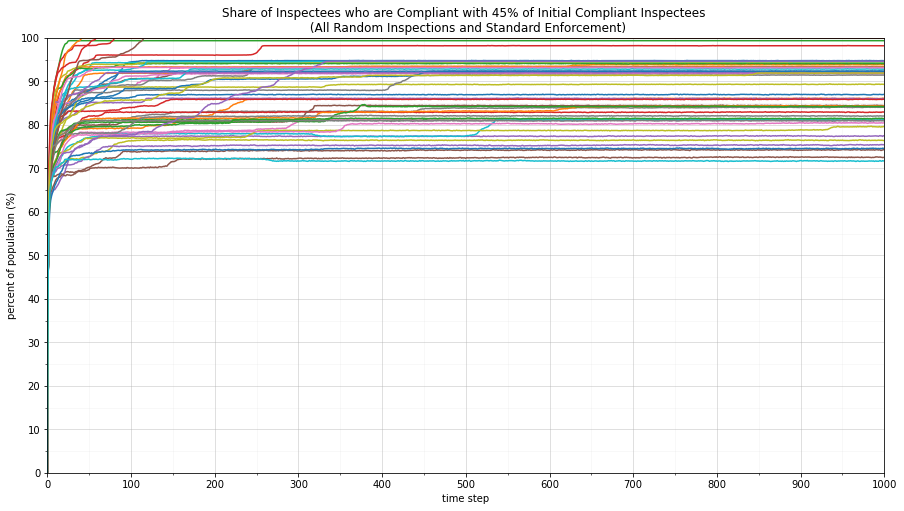

<Figure size 432x288 with 0 Axes>

In [101]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_standard_compliantshare_450_1['step'], rand_standard_compliantshare_450_1['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_2['step'], rand_standard_compliantshare_450_2['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_3['step'], rand_standard_compliantshare_450_3['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_4['step'], rand_standard_compliantshare_450_4['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_5['step'], rand_standard_compliantshare_450_5['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_6['step'], rand_standard_compliantshare_450_6['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_7['step'], rand_standard_compliantshare_450_7['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_8['step'], rand_standard_compliantshare_450_8['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_9['step'], rand_standard_compliantshare_450_9['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_10['step'], rand_standard_compliantshare_450_10['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_11['step'], rand_standard_compliantshare_450_11['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_12['step'], rand_standard_compliantshare_450_12['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_13['step'], rand_standard_compliantshare_450_13['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_14['step'], rand_standard_compliantshare_450_14['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_15['step'], rand_standard_compliantshare_450_15['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_16['step'], rand_standard_compliantshare_450_16['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_17['step'], rand_standard_compliantshare_450_17['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_18['step'], rand_standard_compliantshare_450_18['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_19['step'], rand_standard_compliantshare_450_19['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_20['step'], rand_standard_compliantshare_450_20['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_21['step'], rand_standard_compliantshare_450_21['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_22['step'], rand_standard_compliantshare_450_22['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_23['step'], rand_standard_compliantshare_450_23['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_24['step'], rand_standard_compliantshare_450_24['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_25['step'], rand_standard_compliantshare_450_25['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_26['step'], rand_standard_compliantshare_450_26['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_27['step'], rand_standard_compliantshare_450_27['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_28['step'], rand_standard_compliantshare_450_28['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_29['step'], rand_standard_compliantshare_450_29['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_30['step'], rand_standard_compliantshare_450_30['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_31['step'], rand_standard_compliantshare_450_31['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_32['step'], rand_standard_compliantshare_450_32['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_33['step'], rand_standard_compliantshare_450_33['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_34['step'], rand_standard_compliantshare_450_34['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_35['step'], rand_standard_compliantshare_450_35['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_36['step'], rand_standard_compliantshare_450_36['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_37['step'], rand_standard_compliantshare_450_37['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_38['step'], rand_standard_compliantshare_450_38['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_39['step'], rand_standard_compliantshare_450_39['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_40['step'], rand_standard_compliantshare_450_40['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_41['step'], rand_standard_compliantshare_450_41['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_42['step'], rand_standard_compliantshare_450_42['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_43['step'], rand_standard_compliantshare_450_43['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_44['step'], rand_standard_compliantshare_450_44['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_45['step'], rand_standard_compliantshare_450_45['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_46['step'], rand_standard_compliantshare_450_46['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_47['step'], rand_standard_compliantshare_450_47['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_48['step'], rand_standard_compliantshare_450_48['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_49['step'], rand_standard_compliantshare_450_49['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_50['step'], rand_standard_compliantshare_450_50['perc-compliant'])#, label="Run 5")

plt.title("Share of Inspectees who are Compliant with 45% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 45- Time vs. Compliant All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

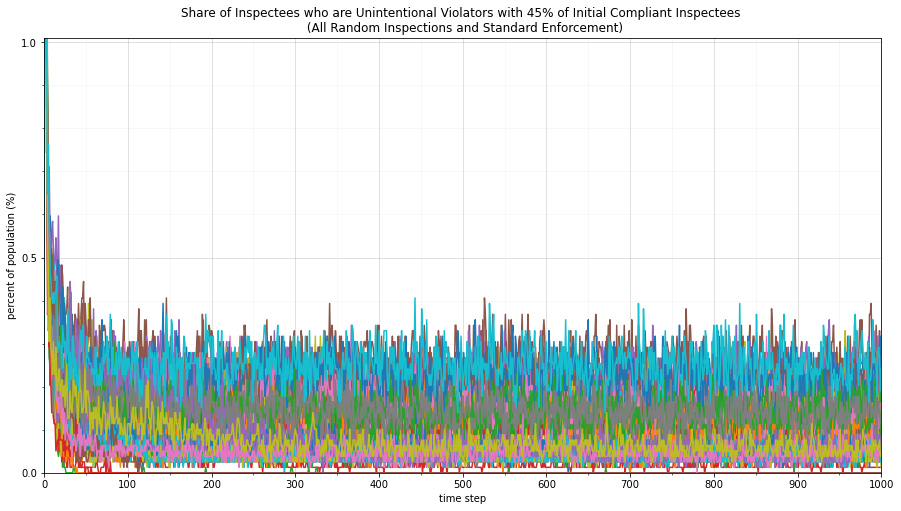

<Figure size 432x288 with 0 Axes>

In [102]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(rand_standard_compliantshare_450_1['step'], rand_standard_compliantshare_450_1['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_2['step'], rand_standard_compliantshare_450_2['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_3['step'], rand_standard_compliantshare_450_3['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_4['step'], rand_standard_compliantshare_450_4['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_5['step'], rand_standard_compliantshare_450_5['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_6['step'], rand_standard_compliantshare_450_6['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_7['step'], rand_standard_compliantshare_450_7['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_8['step'], rand_standard_compliantshare_450_8['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_9['step'], rand_standard_compliantshare_450_9['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_10['step'], rand_standard_compliantshare_450_10['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_11['step'], rand_standard_compliantshare_450_11['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_12['step'], rand_standard_compliantshare_450_12['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_13['step'], rand_standard_compliantshare_450_13['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_14['step'], rand_standard_compliantshare_450_14['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_15['step'], rand_standard_compliantshare_450_15['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_16['step'], rand_standard_compliantshare_450_16['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_17['step'], rand_standard_compliantshare_450_17['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_18['step'], rand_standard_compliantshare_450_18['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_19['step'], rand_standard_compliantshare_450_19['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_20['step'], rand_standard_compliantshare_450_20['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_21['step'], rand_standard_compliantshare_450_21['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_22['step'], rand_standard_compliantshare_450_22['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_23['step'], rand_standard_compliantshare_450_23['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_24['step'], rand_standard_compliantshare_450_24['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_25['step'], rand_standard_compliantshare_450_25['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_26['step'], rand_standard_compliantshare_450_26['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_27['step'], rand_standard_compliantshare_450_27['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_28['step'], rand_standard_compliantshare_450_28['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_29['step'], rand_standard_compliantshare_450_29['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_30['step'], rand_standard_compliantshare_450_30['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_31['step'], rand_standard_compliantshare_450_31['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_32['step'], rand_standard_compliantshare_450_32['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_33['step'], rand_standard_compliantshare_450_33['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_34['step'], rand_standard_compliantshare_450_34['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_35['step'], rand_standard_compliantshare_450_35['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_36['step'], rand_standard_compliantshare_450_36['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_37['step'], rand_standard_compliantshare_450_37['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_38['step'], rand_standard_compliantshare_450_38['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_39['step'], rand_standard_compliantshare_450_39['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_40['step'], rand_standard_compliantshare_450_40['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_41['step'], rand_standard_compliantshare_450_41['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_42['step'], rand_standard_compliantshare_450_42['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_43['step'], rand_standard_compliantshare_450_43['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_44['step'], rand_standard_compliantshare_450_44['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_45['step'], rand_standard_compliantshare_450_45['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_46['step'], rand_standard_compliantshare_450_46['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_47['step'], rand_standard_compliantshare_450_47['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_48['step'], rand_standard_compliantshare_450_48['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_49['step'], rand_standard_compliantshare_450_49['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_50['step'], rand_standard_compliantshare_450_50['perc-unintentional'])#, label="Run 5")

plt.title("Share of Inspectees who are Unintentional Violators with 45% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 45- Time vs. Unintentional All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

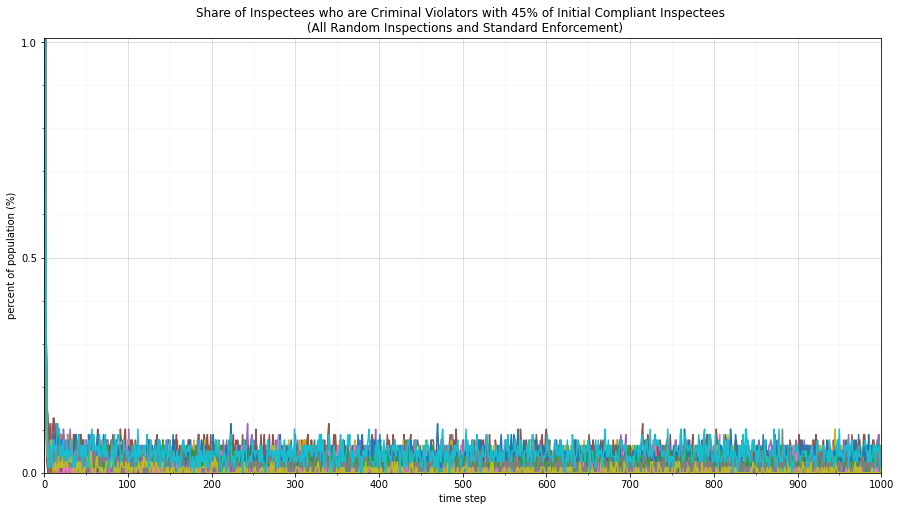

<Figure size 432x288 with 0 Axes>

In [103]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(rand_standard_compliantshare_450_1['step'], rand_standard_compliantshare_450_1['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_2['step'], rand_standard_compliantshare_450_2['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_3['step'], rand_standard_compliantshare_450_3['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_4['step'], rand_standard_compliantshare_450_4['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_5['step'], rand_standard_compliantshare_450_5['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_6['step'], rand_standard_compliantshare_450_6['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_7['step'], rand_standard_compliantshare_450_7['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_8['step'], rand_standard_compliantshare_450_8['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_9['step'], rand_standard_compliantshare_450_9['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_10['step'], rand_standard_compliantshare_450_10['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_11['step'], rand_standard_compliantshare_450_11['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_12['step'], rand_standard_compliantshare_450_12['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_13['step'], rand_standard_compliantshare_450_13['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_14['step'], rand_standard_compliantshare_450_14['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_15['step'], rand_standard_compliantshare_450_15['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_16['step'], rand_standard_compliantshare_450_16['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_17['step'], rand_standard_compliantshare_450_17['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_18['step'], rand_standard_compliantshare_450_18['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_19['step'], rand_standard_compliantshare_450_19['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_20['step'], rand_standard_compliantshare_450_20['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_21['step'], rand_standard_compliantshare_450_21['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_22['step'], rand_standard_compliantshare_450_22['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_23['step'], rand_standard_compliantshare_450_23['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_24['step'], rand_standard_compliantshare_450_24['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_25['step'], rand_standard_compliantshare_450_25['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_26['step'], rand_standard_compliantshare_450_26['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_27['step'], rand_standard_compliantshare_450_27['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_28['step'], rand_standard_compliantshare_450_28['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_29['step'], rand_standard_compliantshare_450_29['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_30['step'], rand_standard_compliantshare_450_30['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_31['step'], rand_standard_compliantshare_450_31['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_32['step'], rand_standard_compliantshare_450_32['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_33['step'], rand_standard_compliantshare_450_33['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_34['step'], rand_standard_compliantshare_450_34['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_35['step'], rand_standard_compliantshare_450_35['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_36['step'], rand_standard_compliantshare_450_36['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_37['step'], rand_standard_compliantshare_450_37['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_38['step'], rand_standard_compliantshare_450_38['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_39['step'], rand_standard_compliantshare_450_39['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_40['step'], rand_standard_compliantshare_450_40['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_41['step'], rand_standard_compliantshare_450_41['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_42['step'], rand_standard_compliantshare_450_42['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_43['step'], rand_standard_compliantshare_450_43['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_44['step'], rand_standard_compliantshare_450_44['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_45['step'], rand_standard_compliantshare_450_45['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_46['step'], rand_standard_compliantshare_450_46['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_47['step'], rand_standard_compliantshare_450_47['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_48['step'], rand_standard_compliantshare_450_48['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_49['step'], rand_standard_compliantshare_450_49['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_50['step'], rand_standard_compliantshare_450_50['perc-criminal'])#, label="Run 5")

plt.title("Share of Inspectees who are Criminal Violators with 45% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 45- Time vs. Criminal All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

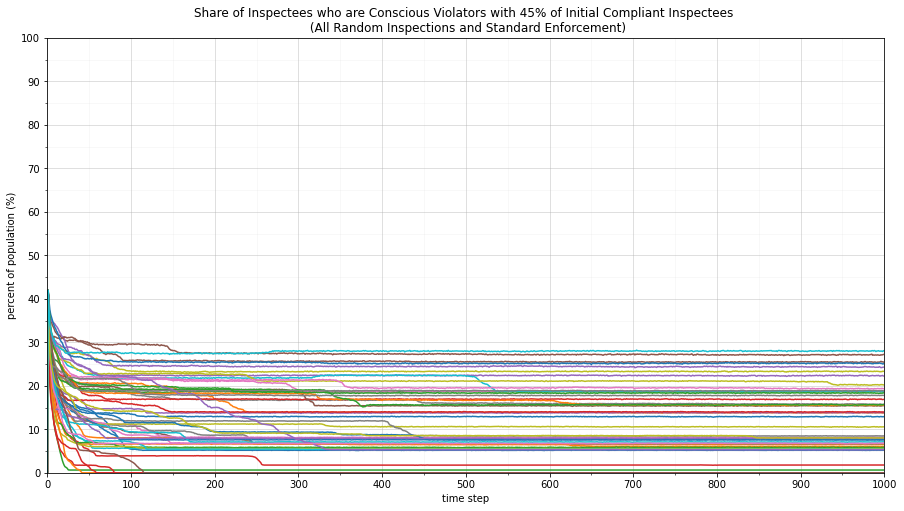

<Figure size 432x288 with 0 Axes>

In [104]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.01,10))
ax.set_yticks(np.arange(0,100.01,5), minor=True)

plt.plot(rand_standard_compliantshare_450_1['step'], rand_standard_compliantshare_450_1['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_2['step'], rand_standard_compliantshare_450_2['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_3['step'], rand_standard_compliantshare_450_3['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_4['step'], rand_standard_compliantshare_450_4['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_5['step'], rand_standard_compliantshare_450_5['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_6['step'], rand_standard_compliantshare_450_6['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_7['step'], rand_standard_compliantshare_450_7['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_8['step'], rand_standard_compliantshare_450_8['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_9['step'], rand_standard_compliantshare_450_9['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_10['step'], rand_standard_compliantshare_450_10['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_11['step'], rand_standard_compliantshare_450_11['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_12['step'], rand_standard_compliantshare_450_12['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_13['step'], rand_standard_compliantshare_450_13['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_14['step'], rand_standard_compliantshare_450_14['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_15['step'], rand_standard_compliantshare_450_15['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_16['step'], rand_standard_compliantshare_450_16['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_17['step'], rand_standard_compliantshare_450_17['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_18['step'], rand_standard_compliantshare_450_18['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_19['step'], rand_standard_compliantshare_450_19['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_20['step'], rand_standard_compliantshare_450_20['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_21['step'], rand_standard_compliantshare_450_21['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_22['step'], rand_standard_compliantshare_450_22['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_23['step'], rand_standard_compliantshare_450_23['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_24['step'], rand_standard_compliantshare_450_24['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_25['step'], rand_standard_compliantshare_450_25['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_26['step'], rand_standard_compliantshare_450_26['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_27['step'], rand_standard_compliantshare_450_27['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_28['step'], rand_standard_compliantshare_450_28['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_29['step'], rand_standard_compliantshare_450_29['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_30['step'], rand_standard_compliantshare_450_30['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_31['step'], rand_standard_compliantshare_450_31['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_32['step'], rand_standard_compliantshare_450_32['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_33['step'], rand_standard_compliantshare_450_33['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_34['step'], rand_standard_compliantshare_450_34['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_35['step'], rand_standard_compliantshare_450_35['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_36['step'], rand_standard_compliantshare_450_36['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_37['step'], rand_standard_compliantshare_450_37['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_38['step'], rand_standard_compliantshare_450_38['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_39['step'], rand_standard_compliantshare_450_39['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_40['step'], rand_standard_compliantshare_450_40['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_450_41['step'], rand_standard_compliantshare_450_41['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_450_42['step'], rand_standard_compliantshare_450_42['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_450_43['step'], rand_standard_compliantshare_450_43['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_450_44['step'], rand_standard_compliantshare_450_44['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_450_45['step'], rand_standard_compliantshare_450_45['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_46['step'], rand_standard_compliantshare_450_46['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_47['step'], rand_standard_compliantshare_450_47['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_48['step'], rand_standard_compliantshare_450_48['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_49['step'], rand_standard_compliantshare_450_49['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_450_50['step'], rand_standard_compliantshare_450_50['perc-conscious'])#, label="Run 5")

plt.title("Share of Inspectees who are Conscious Violators with 45% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 45- Time vs. Conscious All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

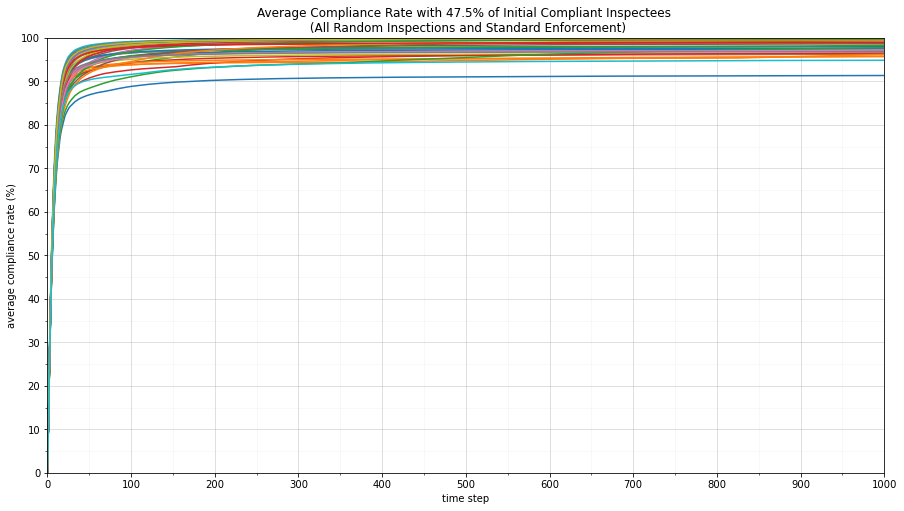

<Figure size 432x288 with 0 Axes>

In [105]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_standard_compliantshare_475_1['step'], rand_standard_compliantshare_475_1['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_2['step'], rand_standard_compliantshare_475_2['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_3['step'], rand_standard_compliantshare_475_3['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_4['step'], rand_standard_compliantshare_475_4['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_5['step'], rand_standard_compliantshare_475_5['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_6['step'], rand_standard_compliantshare_475_6['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_7['step'], rand_standard_compliantshare_475_7['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_8['step'], rand_standard_compliantshare_475_8['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_9['step'], rand_standard_compliantshare_475_9['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_10['step'], rand_standard_compliantshare_475_10['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_11['step'], rand_standard_compliantshare_475_11['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_12['step'], rand_standard_compliantshare_475_12['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_13['step'], rand_standard_compliantshare_475_13['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_14['step'], rand_standard_compliantshare_475_14['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_15['step'], rand_standard_compliantshare_475_15['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_16['step'], rand_standard_compliantshare_475_16['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_17['step'], rand_standard_compliantshare_475_17['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_18['step'], rand_standard_compliantshare_475_18['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_19['step'], rand_standard_compliantshare_475_19['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_20['step'], rand_standard_compliantshare_475_20['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_21['step'], rand_standard_compliantshare_475_21['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_22['step'], rand_standard_compliantshare_475_22['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_23['step'], rand_standard_compliantshare_475_23['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_24['step'], rand_standard_compliantshare_475_24['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_25['step'], rand_standard_compliantshare_475_25['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_26['step'], rand_standard_compliantshare_475_26['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_27['step'], rand_standard_compliantshare_475_27['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_28['step'], rand_standard_compliantshare_475_28['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_29['step'], rand_standard_compliantshare_475_29['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_30['step'], rand_standard_compliantshare_475_30['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_31['step'], rand_standard_compliantshare_475_31['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_32['step'], rand_standard_compliantshare_475_32['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_33['step'], rand_standard_compliantshare_475_33['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_34['step'], rand_standard_compliantshare_475_34['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_35['step'], rand_standard_compliantshare_475_35['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_36['step'], rand_standard_compliantshare_475_36['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_37['step'], rand_standard_compliantshare_475_37['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_38['step'], rand_standard_compliantshare_475_38['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_39['step'], rand_standard_compliantshare_475_39['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_40['step'], rand_standard_compliantshare_475_40['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_41['step'], rand_standard_compliantshare_475_41['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_42['step'], rand_standard_compliantshare_475_42['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_43['step'], rand_standard_compliantshare_475_43['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_44['step'], rand_standard_compliantshare_475_44['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_45['step'], rand_standard_compliantshare_475_45['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_46['step'], rand_standard_compliantshare_475_46['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_47['step'], rand_standard_compliantshare_475_47['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_48['step'], rand_standard_compliantshare_475_48['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_49['step'], rand_standard_compliantshare_475_49['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_50['step'], rand_standard_compliantshare_475_50['avg-compliance-rate'])#, label="Run 5")

plt.title("Average Compliance Rate with 47.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 47.5- Time vs. Avg Compliance All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

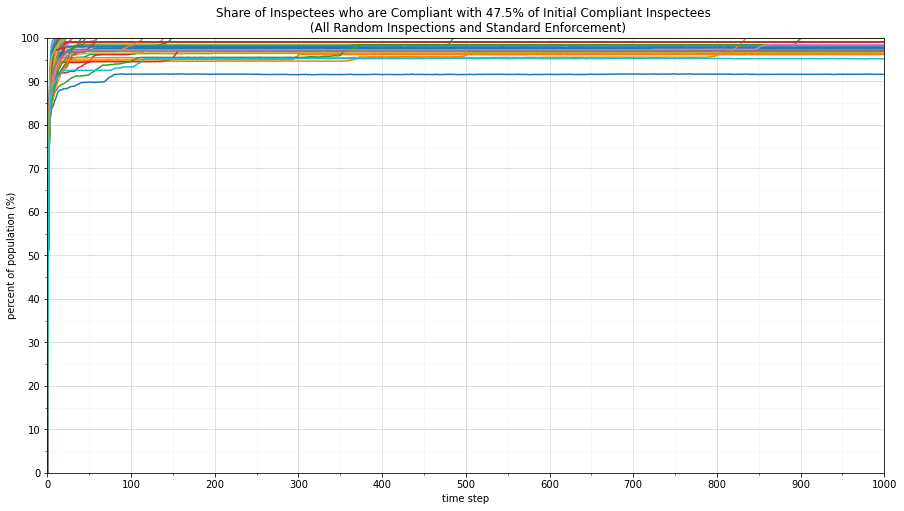

<Figure size 432x288 with 0 Axes>

In [106]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_standard_compliantshare_475_1['step'], rand_standard_compliantshare_475_1['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_2['step'], rand_standard_compliantshare_475_2['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_3['step'], rand_standard_compliantshare_475_3['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_4['step'], rand_standard_compliantshare_475_4['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_5['step'], rand_standard_compliantshare_475_5['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_6['step'], rand_standard_compliantshare_475_6['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_7['step'], rand_standard_compliantshare_475_7['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_8['step'], rand_standard_compliantshare_475_8['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_9['step'], rand_standard_compliantshare_475_9['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_10['step'], rand_standard_compliantshare_475_10['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_11['step'], rand_standard_compliantshare_475_11['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_12['step'], rand_standard_compliantshare_475_12['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_13['step'], rand_standard_compliantshare_475_13['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_14['step'], rand_standard_compliantshare_475_14['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_15['step'], rand_standard_compliantshare_475_15['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_16['step'], rand_standard_compliantshare_475_16['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_17['step'], rand_standard_compliantshare_475_17['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_18['step'], rand_standard_compliantshare_475_18['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_19['step'], rand_standard_compliantshare_475_19['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_20['step'], rand_standard_compliantshare_475_20['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_21['step'], rand_standard_compliantshare_475_21['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_22['step'], rand_standard_compliantshare_475_22['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_23['step'], rand_standard_compliantshare_475_23['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_24['step'], rand_standard_compliantshare_475_24['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_25['step'], rand_standard_compliantshare_475_25['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_26['step'], rand_standard_compliantshare_475_26['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_27['step'], rand_standard_compliantshare_475_27['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_28['step'], rand_standard_compliantshare_475_28['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_29['step'], rand_standard_compliantshare_475_29['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_30['step'], rand_standard_compliantshare_475_30['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_31['step'], rand_standard_compliantshare_475_31['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_32['step'], rand_standard_compliantshare_475_32['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_33['step'], rand_standard_compliantshare_475_33['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_34['step'], rand_standard_compliantshare_475_34['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_35['step'], rand_standard_compliantshare_475_35['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_36['step'], rand_standard_compliantshare_475_36['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_37['step'], rand_standard_compliantshare_475_37['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_38['step'], rand_standard_compliantshare_475_38['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_39['step'], rand_standard_compliantshare_475_39['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_40['step'], rand_standard_compliantshare_475_40['perc-compliant'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_41['step'], rand_standard_compliantshare_475_41['perc-compliant'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_42['step'], rand_standard_compliantshare_475_42['perc-compliant'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_43['step'], rand_standard_compliantshare_475_43['perc-compliant'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_44['step'], rand_standard_compliantshare_475_44['perc-compliant'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_45['step'], rand_standard_compliantshare_475_45['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_46['step'], rand_standard_compliantshare_475_46['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_47['step'], rand_standard_compliantshare_475_47['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_48['step'], rand_standard_compliantshare_475_48['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_49['step'], rand_standard_compliantshare_475_49['perc-compliant'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_50['step'], rand_standard_compliantshare_475_50['perc-compliant'])#, label="Run 5")

plt.title("Share of Inspectees who are Compliant with 47.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 47.5- Time vs. Compliant All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

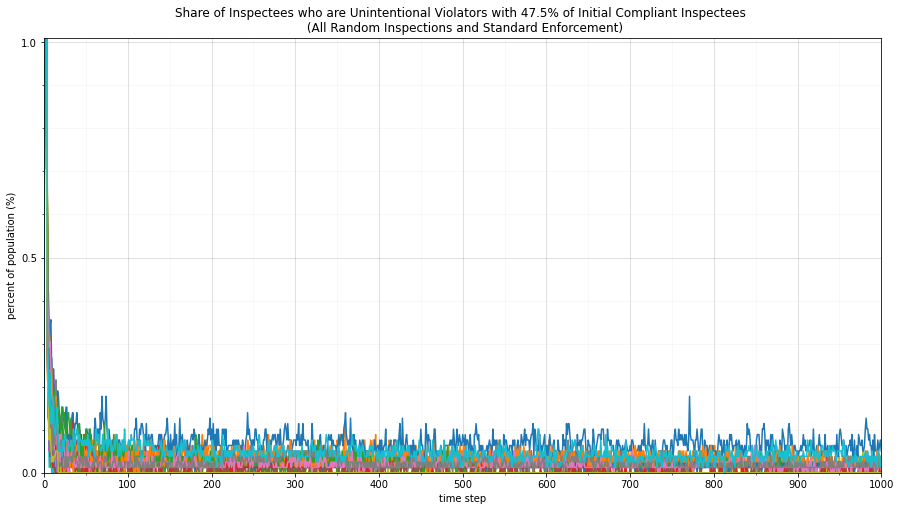

<Figure size 432x288 with 0 Axes>

In [107]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.1,.5))
ax.set_yticks(np.arange(0,1.1,.1), minor=True)

plt.plot(rand_standard_compliantshare_475_1['step'], rand_standard_compliantshare_475_1['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_2['step'], rand_standard_compliantshare_475_2['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_3['step'], rand_standard_compliantshare_475_3['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_4['step'], rand_standard_compliantshare_475_4['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_5['step'], rand_standard_compliantshare_475_5['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_6['step'], rand_standard_compliantshare_475_6['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_7['step'], rand_standard_compliantshare_475_7['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_8['step'], rand_standard_compliantshare_475_8['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_9['step'], rand_standard_compliantshare_475_9['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_10['step'], rand_standard_compliantshare_475_10['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_11['step'], rand_standard_compliantshare_475_11['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_12['step'], rand_standard_compliantshare_475_12['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_13['step'], rand_standard_compliantshare_475_13['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_14['step'], rand_standard_compliantshare_475_14['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_15['step'], rand_standard_compliantshare_475_15['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_16['step'], rand_standard_compliantshare_475_16['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_17['step'], rand_standard_compliantshare_475_17['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_18['step'], rand_standard_compliantshare_475_18['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_19['step'], rand_standard_compliantshare_475_19['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_20['step'], rand_standard_compliantshare_475_20['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_21['step'], rand_standard_compliantshare_475_21['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_22['step'], rand_standard_compliantshare_475_22['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_23['step'], rand_standard_compliantshare_475_23['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_24['step'], rand_standard_compliantshare_475_24['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_25['step'], rand_standard_compliantshare_475_25['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_26['step'], rand_standard_compliantshare_475_26['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_27['step'], rand_standard_compliantshare_475_27['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_28['step'], rand_standard_compliantshare_475_28['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_29['step'], rand_standard_compliantshare_475_29['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_30['step'], rand_standard_compliantshare_475_30['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_31['step'], rand_standard_compliantshare_475_31['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_32['step'], rand_standard_compliantshare_475_32['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_33['step'], rand_standard_compliantshare_475_33['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_34['step'], rand_standard_compliantshare_475_34['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_35['step'], rand_standard_compliantshare_475_35['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_36['step'], rand_standard_compliantshare_475_36['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_37['step'], rand_standard_compliantshare_475_37['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_38['step'], rand_standard_compliantshare_475_38['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_39['step'], rand_standard_compliantshare_475_39['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_40['step'], rand_standard_compliantshare_475_40['perc-unintentional'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_41['step'], rand_standard_compliantshare_475_41['perc-unintentional'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_42['step'], rand_standard_compliantshare_475_42['perc-unintentional'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_43['step'], rand_standard_compliantshare_475_43['perc-unintentional'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_44['step'], rand_standard_compliantshare_475_44['perc-unintentional'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_45['step'], rand_standard_compliantshare_475_45['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_46['step'], rand_standard_compliantshare_475_46['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_47['step'], rand_standard_compliantshare_475_47['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_48['step'], rand_standard_compliantshare_475_48['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_49['step'], rand_standard_compliantshare_475_49['perc-unintentional'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_50['step'], rand_standard_compliantshare_475_50['perc-unintentional'])#, label="Run 5")

plt.title("Share of Inspectees who are Unintentional Violators with 47.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 47.5- Time vs. Unintentional All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

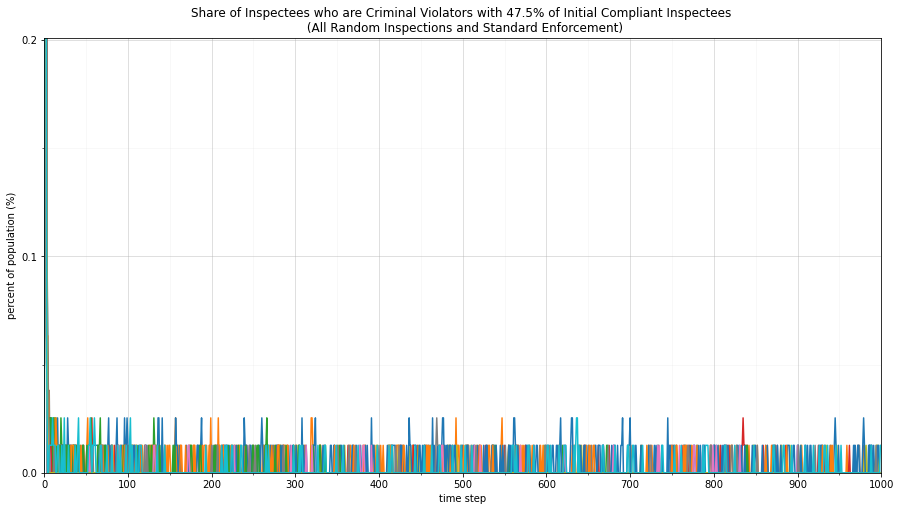

<Figure size 432x288 with 0 Axes>

In [108]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,.201,.1))
ax.set_yticks(np.arange(0,.201,.05), minor=True)

plt.plot(rand_standard_compliantshare_475_1['step'], rand_standard_compliantshare_475_1['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_2['step'], rand_standard_compliantshare_475_2['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_3['step'], rand_standard_compliantshare_475_3['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_4['step'], rand_standard_compliantshare_475_4['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_5['step'], rand_standard_compliantshare_475_5['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_6['step'], rand_standard_compliantshare_475_6['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_7['step'], rand_standard_compliantshare_475_7['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_8['step'], rand_standard_compliantshare_475_8['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_9['step'], rand_standard_compliantshare_475_9['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_10['step'], rand_standard_compliantshare_475_10['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_11['step'], rand_standard_compliantshare_475_11['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_12['step'], rand_standard_compliantshare_475_12['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_13['step'], rand_standard_compliantshare_475_13['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_14['step'], rand_standard_compliantshare_475_14['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_15['step'], rand_standard_compliantshare_475_15['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_16['step'], rand_standard_compliantshare_475_16['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_17['step'], rand_standard_compliantshare_475_17['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_18['step'], rand_standard_compliantshare_475_18['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_19['step'], rand_standard_compliantshare_475_19['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_20['step'], rand_standard_compliantshare_475_20['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_21['step'], rand_standard_compliantshare_475_21['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_22['step'], rand_standard_compliantshare_475_22['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_23['step'], rand_standard_compliantshare_475_23['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_24['step'], rand_standard_compliantshare_475_24['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_25['step'], rand_standard_compliantshare_475_25['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_26['step'], rand_standard_compliantshare_475_26['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_27['step'], rand_standard_compliantshare_475_27['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_28['step'], rand_standard_compliantshare_475_28['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_29['step'], rand_standard_compliantshare_475_29['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_30['step'], rand_standard_compliantshare_475_30['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_31['step'], rand_standard_compliantshare_475_31['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_32['step'], rand_standard_compliantshare_475_32['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_33['step'], rand_standard_compliantshare_475_33['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_34['step'], rand_standard_compliantshare_475_34['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_35['step'], rand_standard_compliantshare_475_35['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_36['step'], rand_standard_compliantshare_475_36['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_37['step'], rand_standard_compliantshare_475_37['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_38['step'], rand_standard_compliantshare_475_38['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_39['step'], rand_standard_compliantshare_475_39['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_40['step'], rand_standard_compliantshare_475_40['perc-criminal'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_41['step'], rand_standard_compliantshare_475_41['perc-criminal'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_42['step'], rand_standard_compliantshare_475_42['perc-criminal'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_43['step'], rand_standard_compliantshare_475_43['perc-criminal'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_44['step'], rand_standard_compliantshare_475_44['perc-criminal'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_45['step'], rand_standard_compliantshare_475_45['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_46['step'], rand_standard_compliantshare_475_46['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_47['step'], rand_standard_compliantshare_475_47['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_48['step'], rand_standard_compliantshare_475_48['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_49['step'], rand_standard_compliantshare_475_49['perc-criminal'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_50['step'], rand_standard_compliantshare_475_50['perc-criminal'])#, label="Run 5")

plt.title("Share of Inspectees who are Criminal Violators with 47.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,.201)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 47.5- Time vs. Criminal All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

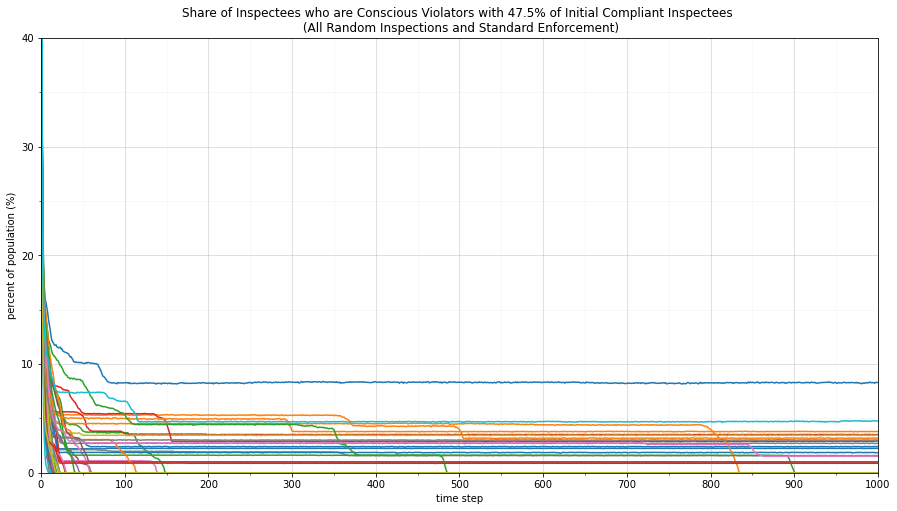

<Figure size 432x288 with 0 Axes>

In [109]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(rand_standard_compliantshare_475_1['step'], rand_standard_compliantshare_475_1['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_2['step'], rand_standard_compliantshare_475_2['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_3['step'], rand_standard_compliantshare_475_3['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_4['step'], rand_standard_compliantshare_475_4['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_5['step'], rand_standard_compliantshare_475_5['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_6['step'], rand_standard_compliantshare_475_6['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_7['step'], rand_standard_compliantshare_475_7['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_8['step'], rand_standard_compliantshare_475_8['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_9['step'], rand_standard_compliantshare_475_9['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_10['step'], rand_standard_compliantshare_475_10['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_11['step'], rand_standard_compliantshare_475_11['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_12['step'], rand_standard_compliantshare_475_12['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_13['step'], rand_standard_compliantshare_475_13['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_14['step'], rand_standard_compliantshare_475_14['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_15['step'], rand_standard_compliantshare_475_15['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_16['step'], rand_standard_compliantshare_475_16['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_17['step'], rand_standard_compliantshare_475_17['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_18['step'], rand_standard_compliantshare_475_18['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_19['step'], rand_standard_compliantshare_475_19['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_20['step'], rand_standard_compliantshare_475_20['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_21['step'], rand_standard_compliantshare_475_21['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_22['step'], rand_standard_compliantshare_475_22['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_23['step'], rand_standard_compliantshare_475_23['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_24['step'], rand_standard_compliantshare_475_24['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_25['step'], rand_standard_compliantshare_475_25['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_26['step'], rand_standard_compliantshare_475_26['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_27['step'], rand_standard_compliantshare_475_27['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_28['step'], rand_standard_compliantshare_475_28['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_29['step'], rand_standard_compliantshare_475_29['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_30['step'], rand_standard_compliantshare_475_30['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_31['step'], rand_standard_compliantshare_475_31['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_32['step'], rand_standard_compliantshare_475_32['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_33['step'], rand_standard_compliantshare_475_33['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_34['step'], rand_standard_compliantshare_475_34['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_35['step'], rand_standard_compliantshare_475_35['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_36['step'], rand_standard_compliantshare_475_36['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_37['step'], rand_standard_compliantshare_475_37['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_38['step'], rand_standard_compliantshare_475_38['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_39['step'], rand_standard_compliantshare_475_39['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_40['step'], rand_standard_compliantshare_475_40['perc-conscious'])#, label="Run 5")

plt.plot(rand_standard_compliantshare_475_41['step'], rand_standard_compliantshare_475_41['perc-conscious'])#, label="Run 1")
plt.plot(rand_standard_compliantshare_475_42['step'], rand_standard_compliantshare_475_42['perc-conscious'])#, label="Run 2")
plt.plot(rand_standard_compliantshare_475_43['step'], rand_standard_compliantshare_475_43['perc-conscious'])#, label="Run 3")
plt.plot(rand_standard_compliantshare_475_44['step'], rand_standard_compliantshare_475_44['perc-conscious'])#, label="Run 4")
plt.plot(rand_standard_compliantshare_475_45['step'], rand_standard_compliantshare_475_45['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_46['step'], rand_standard_compliantshare_475_46['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_47['step'], rand_standard_compliantshare_475_47['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_48['step'], rand_standard_compliantshare_475_48['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_49['step'], rand_standard_compliantshare_475_49['perc-conscious'])#, label="Run 5")
plt.plot(rand_standard_compliantshare_475_50['step'], rand_standard_compliantshare_475_50['perc-conscious'])#, label="Run 5")

plt.title("Share of Inspectees who are Conscious Violators with 47.5% of Initial Compliant Inspectees \n (All Random Inspections and Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 47.5- Time vs. Conscious All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

### Responsive Enforcement

In [60]:
for i, x in rand_resp_compliantshare_375.groupby('run_num'):
    globals()['rand_resp_compliantshare_375_' + str(i)] = x

for i, x in rand_resp_compliantshare_400.groupby('run_num'):
    globals()['rand_resp_compliantshare_400_' + str(i)] = x

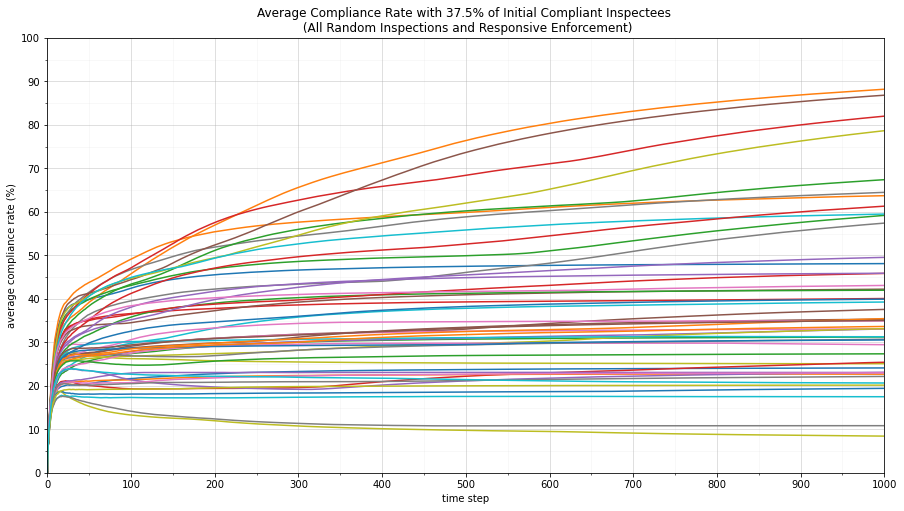

<Figure size 432x288 with 0 Axes>

In [110]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_compliantshare_375_1['step'], rand_resp_compliantshare_375_1['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_2['step'], rand_resp_compliantshare_375_2['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_3['step'], rand_resp_compliantshare_375_3['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_4['step'], rand_resp_compliantshare_375_4['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_5['step'], rand_resp_compliantshare_375_5['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_6['step'], rand_resp_compliantshare_375_6['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_7['step'], rand_resp_compliantshare_375_7['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_8['step'], rand_resp_compliantshare_375_8['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_9['step'], rand_resp_compliantshare_375_9['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_10['step'], rand_resp_compliantshare_375_10['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_11['step'], rand_resp_compliantshare_375_11['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_12['step'], rand_resp_compliantshare_375_12['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_13['step'], rand_resp_compliantshare_375_13['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_14['step'], rand_resp_compliantshare_375_14['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_15['step'], rand_resp_compliantshare_375_15['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_16['step'], rand_resp_compliantshare_375_16['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_17['step'], rand_resp_compliantshare_375_17['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_18['step'], rand_resp_compliantshare_375_18['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_19['step'], rand_resp_compliantshare_375_19['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_20['step'], rand_resp_compliantshare_375_20['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_21['step'], rand_resp_compliantshare_375_21['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_22['step'], rand_resp_compliantshare_375_22['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_23['step'], rand_resp_compliantshare_375_23['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_24['step'], rand_resp_compliantshare_375_24['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_25['step'], rand_resp_compliantshare_375_25['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_26['step'], rand_resp_compliantshare_375_26['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_27['step'], rand_resp_compliantshare_375_27['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_28['step'], rand_resp_compliantshare_375_28['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_29['step'], rand_resp_compliantshare_375_29['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_30['step'], rand_resp_compliantshare_375_30['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_31['step'], rand_resp_compliantshare_375_31['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_32['step'], rand_resp_compliantshare_375_32['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_33['step'], rand_resp_compliantshare_375_33['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_34['step'], rand_resp_compliantshare_375_34['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_35['step'], rand_resp_compliantshare_375_35['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_36['step'], rand_resp_compliantshare_375_36['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_37['step'], rand_resp_compliantshare_375_37['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_38['step'], rand_resp_compliantshare_375_38['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_39['step'], rand_resp_compliantshare_375_39['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_40['step'], rand_resp_compliantshare_375_40['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_41['step'], rand_resp_compliantshare_375_41['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_42['step'], rand_resp_compliantshare_375_42['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_43['step'], rand_resp_compliantshare_375_43['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_44['step'], rand_resp_compliantshare_375_44['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_45['step'], rand_resp_compliantshare_375_45['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_46['step'], rand_resp_compliantshare_375_46['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_47['step'], rand_resp_compliantshare_375_47['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_48['step'], rand_resp_compliantshare_375_48['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_49['step'], rand_resp_compliantshare_375_49['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_50['step'], rand_resp_compliantshare_375_50['avg-compliance-rate'])#, label="Run 5")

plt.title("Average Compliance Rate with 37.5% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 37.5- Time vs. Avg Compliance All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

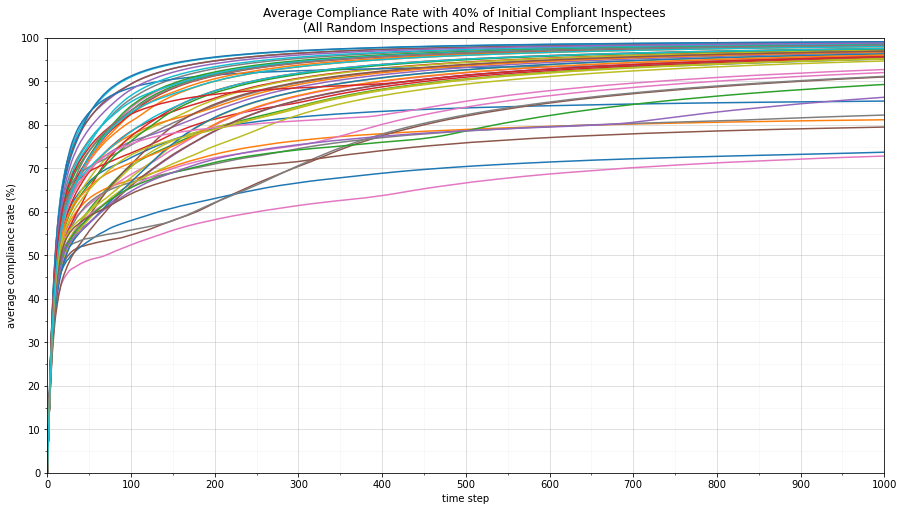

<Figure size 432x288 with 0 Axes>

In [111]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_compliantshare_400_1['step'], rand_resp_compliantshare_400_1['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_2['step'], rand_resp_compliantshare_400_2['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_3['step'], rand_resp_compliantshare_400_3['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_4['step'], rand_resp_compliantshare_400_4['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_5['step'], rand_resp_compliantshare_400_5['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_6['step'], rand_resp_compliantshare_400_6['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_7['step'], rand_resp_compliantshare_400_7['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_8['step'], rand_resp_compliantshare_400_8['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_9['step'], rand_resp_compliantshare_400_9['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_10['step'], rand_resp_compliantshare_400_10['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_11['step'], rand_resp_compliantshare_400_11['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_12['step'], rand_resp_compliantshare_400_12['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_13['step'], rand_resp_compliantshare_400_13['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_14['step'], rand_resp_compliantshare_400_14['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_15['step'], rand_resp_compliantshare_400_15['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_16['step'], rand_resp_compliantshare_400_16['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_17['step'], rand_resp_compliantshare_400_17['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_18['step'], rand_resp_compliantshare_400_18['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_19['step'], rand_resp_compliantshare_400_19['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_20['step'], rand_resp_compliantshare_400_20['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_21['step'], rand_resp_compliantshare_400_21['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_22['step'], rand_resp_compliantshare_400_22['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_23['step'], rand_resp_compliantshare_400_23['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_24['step'], rand_resp_compliantshare_400_24['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_25['step'], rand_resp_compliantshare_400_25['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_26['step'], rand_resp_compliantshare_400_26['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_27['step'], rand_resp_compliantshare_400_27['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_28['step'], rand_resp_compliantshare_400_28['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_29['step'], rand_resp_compliantshare_400_29['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_30['step'], rand_resp_compliantshare_400_30['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_31['step'], rand_resp_compliantshare_400_31['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_32['step'], rand_resp_compliantshare_400_32['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_33['step'], rand_resp_compliantshare_400_33['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_34['step'], rand_resp_compliantshare_400_34['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_35['step'], rand_resp_compliantshare_400_35['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_36['step'], rand_resp_compliantshare_400_36['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_37['step'], rand_resp_compliantshare_400_37['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_38['step'], rand_resp_compliantshare_400_38['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_39['step'], rand_resp_compliantshare_400_39['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_40['step'], rand_resp_compliantshare_400_40['avg-compliance-rate'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_41['step'], rand_resp_compliantshare_400_41['avg-compliance-rate'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_42['step'], rand_resp_compliantshare_400_42['avg-compliance-rate'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_43['step'], rand_resp_compliantshare_400_43['avg-compliance-rate'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_44['step'], rand_resp_compliantshare_400_44['avg-compliance-rate'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_45['step'], rand_resp_compliantshare_400_45['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_46['step'], rand_resp_compliantshare_400_46['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_47['step'], rand_resp_compliantshare_400_47['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_48['step'], rand_resp_compliantshare_400_48['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_49['step'], rand_resp_compliantshare_400_49['avg-compliance-rate'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_50['step'], rand_resp_compliantshare_400_50['avg-compliance-rate'])#, label="Run 5")

plt.title("Average Compliance Rate with 40% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 40- Time vs. Avg Compliance All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

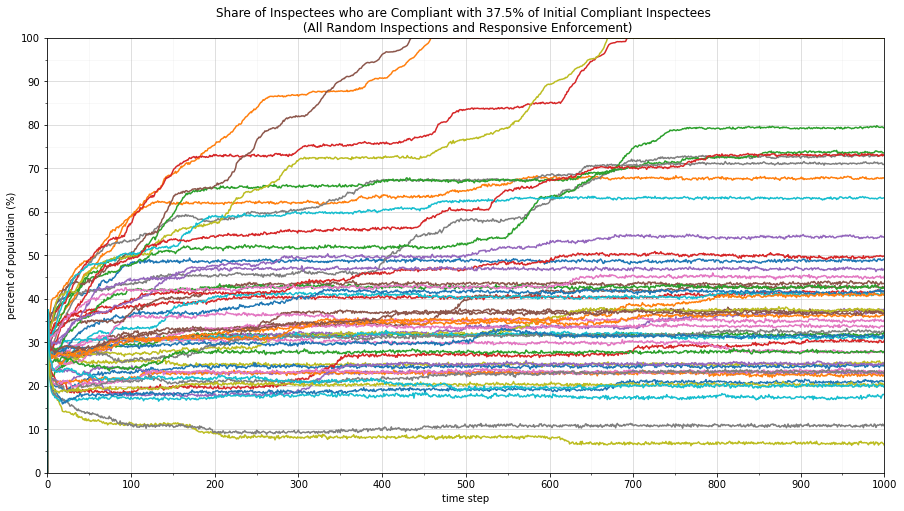

<Figure size 432x288 with 0 Axes>

In [112]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_compliantshare_375_1['step'], rand_resp_compliantshare_375_1['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_2['step'], rand_resp_compliantshare_375_2['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_3['step'], rand_resp_compliantshare_375_3['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_4['step'], rand_resp_compliantshare_375_4['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_5['step'], rand_resp_compliantshare_375_5['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_6['step'], rand_resp_compliantshare_375_6['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_7['step'], rand_resp_compliantshare_375_7['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_8['step'], rand_resp_compliantshare_375_8['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_9['step'], rand_resp_compliantshare_375_9['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_10['step'], rand_resp_compliantshare_375_10['perc-compliant'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_11['step'], rand_resp_compliantshare_375_11['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_12['step'], rand_resp_compliantshare_375_12['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_13['step'], rand_resp_compliantshare_375_13['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_14['step'], rand_resp_compliantshare_375_14['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_15['step'], rand_resp_compliantshare_375_15['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_16['step'], rand_resp_compliantshare_375_16['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_17['step'], rand_resp_compliantshare_375_17['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_18['step'], rand_resp_compliantshare_375_18['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_19['step'], rand_resp_compliantshare_375_19['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_20['step'], rand_resp_compliantshare_375_20['perc-compliant'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_21['step'], rand_resp_compliantshare_375_21['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_22['step'], rand_resp_compliantshare_375_22['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_23['step'], rand_resp_compliantshare_375_23['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_24['step'], rand_resp_compliantshare_375_24['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_25['step'], rand_resp_compliantshare_375_25['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_26['step'], rand_resp_compliantshare_375_26['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_27['step'], rand_resp_compliantshare_375_27['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_28['step'], rand_resp_compliantshare_375_28['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_29['step'], rand_resp_compliantshare_375_29['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_30['step'], rand_resp_compliantshare_375_30['perc-compliant'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_31['step'], rand_resp_compliantshare_375_31['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_32['step'], rand_resp_compliantshare_375_32['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_33['step'], rand_resp_compliantshare_375_33['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_34['step'], rand_resp_compliantshare_375_34['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_35['step'], rand_resp_compliantshare_375_35['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_36['step'], rand_resp_compliantshare_375_36['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_37['step'], rand_resp_compliantshare_375_37['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_38['step'], rand_resp_compliantshare_375_38['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_39['step'], rand_resp_compliantshare_375_39['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_40['step'], rand_resp_compliantshare_375_40['perc-compliant'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_41['step'], rand_resp_compliantshare_375_41['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_42['step'], rand_resp_compliantshare_375_42['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_43['step'], rand_resp_compliantshare_375_43['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_44['step'], rand_resp_compliantshare_375_44['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_45['step'], rand_resp_compliantshare_375_45['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_46['step'], rand_resp_compliantshare_375_46['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_47['step'], rand_resp_compliantshare_375_47['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_48['step'], rand_resp_compliantshare_375_48['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_49['step'], rand_resp_compliantshare_375_49['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_50['step'], rand_resp_compliantshare_375_50['perc-compliant'])#, label="Run 5")

plt.title("Share of Inspectees who are Compliant with 37.5% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 37.5- Time vs. Compliant All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

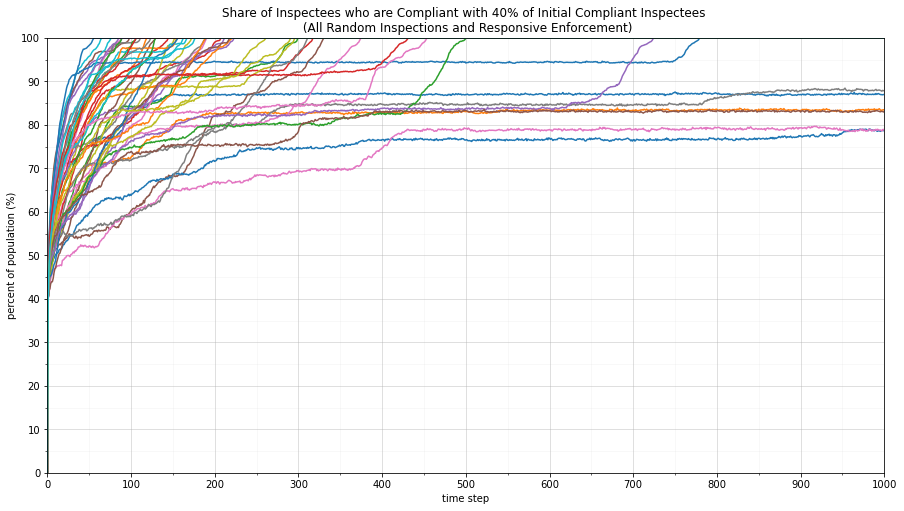

<Figure size 432x288 with 0 Axes>

In [113]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_compliantshare_400_1['step'], rand_resp_compliantshare_400_1['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_2['step'], rand_resp_compliantshare_400_2['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_3['step'], rand_resp_compliantshare_400_3['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_4['step'], rand_resp_compliantshare_400_4['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_5['step'], rand_resp_compliantshare_400_5['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_6['step'], rand_resp_compliantshare_400_6['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_7['step'], rand_resp_compliantshare_400_7['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_8['step'], rand_resp_compliantshare_400_8['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_9['step'], rand_resp_compliantshare_400_9['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_10['step'], rand_resp_compliantshare_400_10['perc-compliant'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_11['step'], rand_resp_compliantshare_400_11['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_12['step'], rand_resp_compliantshare_400_12['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_13['step'], rand_resp_compliantshare_400_13['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_14['step'], rand_resp_compliantshare_400_14['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_15['step'], rand_resp_compliantshare_400_15['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_16['step'], rand_resp_compliantshare_400_16['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_17['step'], rand_resp_compliantshare_400_17['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_18['step'], rand_resp_compliantshare_400_18['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_19['step'], rand_resp_compliantshare_400_19['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_20['step'], rand_resp_compliantshare_400_20['perc-compliant'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_21['step'], rand_resp_compliantshare_400_21['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_22['step'], rand_resp_compliantshare_400_22['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_23['step'], rand_resp_compliantshare_400_23['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_24['step'], rand_resp_compliantshare_400_24['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_25['step'], rand_resp_compliantshare_400_25['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_26['step'], rand_resp_compliantshare_400_26['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_27['step'], rand_resp_compliantshare_400_27['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_28['step'], rand_resp_compliantshare_400_28['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_29['step'], rand_resp_compliantshare_400_29['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_30['step'], rand_resp_compliantshare_400_30['perc-compliant'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_31['step'], rand_resp_compliantshare_400_31['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_32['step'], rand_resp_compliantshare_400_32['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_33['step'], rand_resp_compliantshare_400_33['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_34['step'], rand_resp_compliantshare_400_34['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_35['step'], rand_resp_compliantshare_400_35['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_36['step'], rand_resp_compliantshare_400_36['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_37['step'], rand_resp_compliantshare_400_37['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_38['step'], rand_resp_compliantshare_400_38['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_39['step'], rand_resp_compliantshare_400_39['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_40['step'], rand_resp_compliantshare_400_40['perc-compliant'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_41['step'], rand_resp_compliantshare_400_41['perc-compliant'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_42['step'], rand_resp_compliantshare_400_42['perc-compliant'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_43['step'], rand_resp_compliantshare_400_43['perc-compliant'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_44['step'], rand_resp_compliantshare_400_44['perc-compliant'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_45['step'], rand_resp_compliantshare_400_45['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_46['step'], rand_resp_compliantshare_400_46['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_47['step'], rand_resp_compliantshare_400_47['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_48['step'], rand_resp_compliantshare_400_48['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_49['step'], rand_resp_compliantshare_400_49['perc-compliant'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_50['step'], rand_resp_compliantshare_400_50['perc-compliant'])#, label="Run 5")

plt.title("Share of Inspectees who are Compliant with 40% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 40- Time vs. Compliant All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

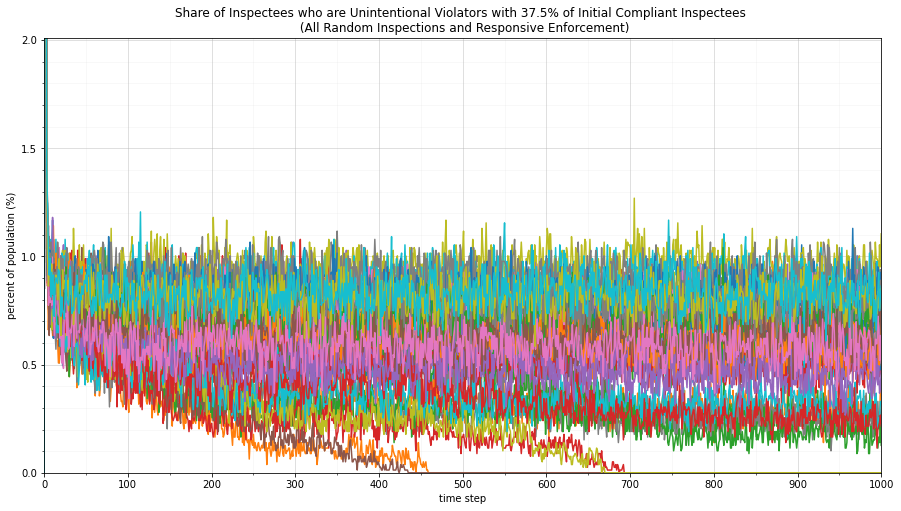

<Figure size 432x288 with 0 Axes>

In [114]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,2.01,.5))
ax.set_yticks(np.arange(0,2.01,.1), minor=True)

plt.plot(rand_resp_compliantshare_375_1['step'], rand_resp_compliantshare_375_1['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_2['step'], rand_resp_compliantshare_375_2['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_3['step'], rand_resp_compliantshare_375_3['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_4['step'], rand_resp_compliantshare_375_4['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_5['step'], rand_resp_compliantshare_375_5['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_6['step'], rand_resp_compliantshare_375_6['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_7['step'], rand_resp_compliantshare_375_7['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_8['step'], rand_resp_compliantshare_375_8['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_9['step'], rand_resp_compliantshare_375_9['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_10['step'], rand_resp_compliantshare_375_10['perc-unintentional'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_11['step'], rand_resp_compliantshare_375_11['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_12['step'], rand_resp_compliantshare_375_12['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_13['step'], rand_resp_compliantshare_375_13['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_14['step'], rand_resp_compliantshare_375_14['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_15['step'], rand_resp_compliantshare_375_15['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_16['step'], rand_resp_compliantshare_375_16['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_17['step'], rand_resp_compliantshare_375_17['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_18['step'], rand_resp_compliantshare_375_18['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_19['step'], rand_resp_compliantshare_375_19['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_20['step'], rand_resp_compliantshare_375_20['perc-unintentional'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_21['step'], rand_resp_compliantshare_375_21['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_22['step'], rand_resp_compliantshare_375_22['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_23['step'], rand_resp_compliantshare_375_23['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_24['step'], rand_resp_compliantshare_375_24['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_25['step'], rand_resp_compliantshare_375_25['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_26['step'], rand_resp_compliantshare_375_26['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_27['step'], rand_resp_compliantshare_375_27['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_28['step'], rand_resp_compliantshare_375_28['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_29['step'], rand_resp_compliantshare_375_29['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_30['step'], rand_resp_compliantshare_375_30['perc-unintentional'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_31['step'], rand_resp_compliantshare_375_31['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_32['step'], rand_resp_compliantshare_375_32['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_33['step'], rand_resp_compliantshare_375_33['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_34['step'], rand_resp_compliantshare_375_34['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_35['step'], rand_resp_compliantshare_375_35['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_36['step'], rand_resp_compliantshare_375_36['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_37['step'], rand_resp_compliantshare_375_37['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_38['step'], rand_resp_compliantshare_375_38['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_39['step'], rand_resp_compliantshare_375_39['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_40['step'], rand_resp_compliantshare_375_40['perc-unintentional'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_41['step'], rand_resp_compliantshare_375_41['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_42['step'], rand_resp_compliantshare_375_42['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_43['step'], rand_resp_compliantshare_375_43['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_44['step'], rand_resp_compliantshare_375_44['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_45['step'], rand_resp_compliantshare_375_45['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_46['step'], rand_resp_compliantshare_375_46['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_47['step'], rand_resp_compliantshare_375_47['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_48['step'], rand_resp_compliantshare_375_48['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_49['step'], rand_resp_compliantshare_375_49['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_50['step'], rand_resp_compliantshare_375_50['perc-unintentional'])#, label="Run 5")

plt.title("Share of Inspectees who are Unintentional Violators with 37.5% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,2.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 37.5- Time vs. Unintentional All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

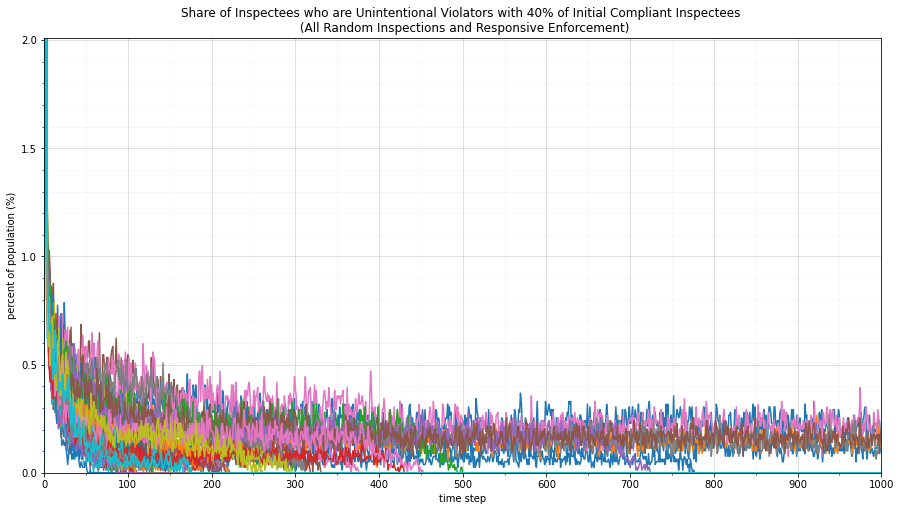

<Figure size 432x288 with 0 Axes>

In [115]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,2.01,.5))
ax.set_yticks(np.arange(0,2.01,.1), minor=True)

plt.plot(rand_resp_compliantshare_400_1['step'], rand_resp_compliantshare_400_1['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_2['step'], rand_resp_compliantshare_400_2['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_3['step'], rand_resp_compliantshare_400_3['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_4['step'], rand_resp_compliantshare_400_4['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_5['step'], rand_resp_compliantshare_400_5['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_6['step'], rand_resp_compliantshare_400_6['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_7['step'], rand_resp_compliantshare_400_7['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_8['step'], rand_resp_compliantshare_400_8['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_9['step'], rand_resp_compliantshare_400_9['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_10['step'], rand_resp_compliantshare_400_10['perc-unintentional'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_11['step'], rand_resp_compliantshare_400_11['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_12['step'], rand_resp_compliantshare_400_12['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_13['step'], rand_resp_compliantshare_400_13['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_14['step'], rand_resp_compliantshare_400_14['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_15['step'], rand_resp_compliantshare_400_15['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_16['step'], rand_resp_compliantshare_400_16['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_17['step'], rand_resp_compliantshare_400_17['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_18['step'], rand_resp_compliantshare_400_18['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_19['step'], rand_resp_compliantshare_400_19['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_20['step'], rand_resp_compliantshare_400_20['perc-unintentional'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_21['step'], rand_resp_compliantshare_400_21['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_22['step'], rand_resp_compliantshare_400_22['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_23['step'], rand_resp_compliantshare_400_23['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_24['step'], rand_resp_compliantshare_400_24['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_25['step'], rand_resp_compliantshare_400_25['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_26['step'], rand_resp_compliantshare_400_26['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_27['step'], rand_resp_compliantshare_400_27['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_28['step'], rand_resp_compliantshare_400_28['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_29['step'], rand_resp_compliantshare_400_29['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_30['step'], rand_resp_compliantshare_400_30['perc-unintentional'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_31['step'], rand_resp_compliantshare_400_31['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_32['step'], rand_resp_compliantshare_400_32['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_33['step'], rand_resp_compliantshare_400_33['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_34['step'], rand_resp_compliantshare_400_34['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_35['step'], rand_resp_compliantshare_400_35['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_36['step'], rand_resp_compliantshare_400_36['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_37['step'], rand_resp_compliantshare_400_37['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_38['step'], rand_resp_compliantshare_400_38['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_39['step'], rand_resp_compliantshare_400_39['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_40['step'], rand_resp_compliantshare_400_40['perc-unintentional'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_41['step'], rand_resp_compliantshare_400_41['perc-unintentional'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_42['step'], rand_resp_compliantshare_400_42['perc-unintentional'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_43['step'], rand_resp_compliantshare_400_43['perc-unintentional'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_44['step'], rand_resp_compliantshare_400_44['perc-unintentional'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_45['step'], rand_resp_compliantshare_400_45['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_46['step'], rand_resp_compliantshare_400_46['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_47['step'], rand_resp_compliantshare_400_47['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_48['step'], rand_resp_compliantshare_400_48['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_49['step'], rand_resp_compliantshare_400_49['perc-unintentional'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_50['step'], rand_resp_compliantshare_400_50['perc-unintentional'])#, label="Run 5")

plt.title("Share of Inspectees who are Unintentional Violators with 40% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,2.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 40- Time vs. Unintentional All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

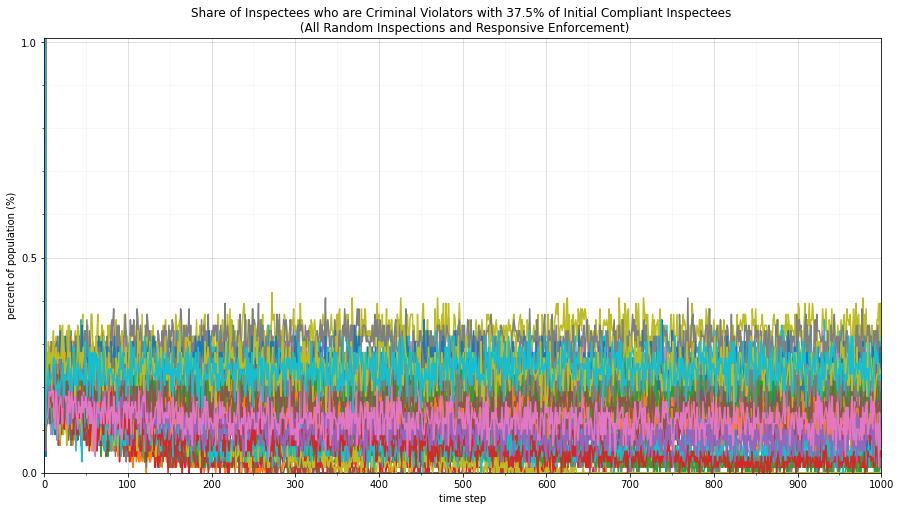

<Figure size 432x288 with 0 Axes>

In [116]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(rand_resp_compliantshare_375_1['step'], rand_resp_compliantshare_375_1['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_2['step'], rand_resp_compliantshare_375_2['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_3['step'], rand_resp_compliantshare_375_3['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_4['step'], rand_resp_compliantshare_375_4['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_5['step'], rand_resp_compliantshare_375_5['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_6['step'], rand_resp_compliantshare_375_6['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_7['step'], rand_resp_compliantshare_375_7['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_8['step'], rand_resp_compliantshare_375_8['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_9['step'], rand_resp_compliantshare_375_9['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_10['step'], rand_resp_compliantshare_375_10['perc-criminal'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_11['step'], rand_resp_compliantshare_375_11['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_12['step'], rand_resp_compliantshare_375_12['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_13['step'], rand_resp_compliantshare_375_13['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_14['step'], rand_resp_compliantshare_375_14['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_15['step'], rand_resp_compliantshare_375_15['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_16['step'], rand_resp_compliantshare_375_16['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_17['step'], rand_resp_compliantshare_375_17['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_18['step'], rand_resp_compliantshare_375_18['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_19['step'], rand_resp_compliantshare_375_19['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_20['step'], rand_resp_compliantshare_375_20['perc-criminal'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_21['step'], rand_resp_compliantshare_375_21['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_22['step'], rand_resp_compliantshare_375_22['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_23['step'], rand_resp_compliantshare_375_23['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_24['step'], rand_resp_compliantshare_375_24['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_25['step'], rand_resp_compliantshare_375_25['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_26['step'], rand_resp_compliantshare_375_26['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_27['step'], rand_resp_compliantshare_375_27['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_28['step'], rand_resp_compliantshare_375_28['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_29['step'], rand_resp_compliantshare_375_29['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_30['step'], rand_resp_compliantshare_375_30['perc-criminal'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_31['step'], rand_resp_compliantshare_375_31['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_32['step'], rand_resp_compliantshare_375_32['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_33['step'], rand_resp_compliantshare_375_33['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_34['step'], rand_resp_compliantshare_375_34['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_35['step'], rand_resp_compliantshare_375_35['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_36['step'], rand_resp_compliantshare_375_36['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_37['step'], rand_resp_compliantshare_375_37['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_38['step'], rand_resp_compliantshare_375_38['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_39['step'], rand_resp_compliantshare_375_39['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_40['step'], rand_resp_compliantshare_375_40['perc-criminal'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_41['step'], rand_resp_compliantshare_375_41['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_42['step'], rand_resp_compliantshare_375_42['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_43['step'], rand_resp_compliantshare_375_43['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_44['step'], rand_resp_compliantshare_375_44['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_45['step'], rand_resp_compliantshare_375_45['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_46['step'], rand_resp_compliantshare_375_46['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_47['step'], rand_resp_compliantshare_375_47['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_48['step'], rand_resp_compliantshare_375_48['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_49['step'], rand_resp_compliantshare_375_49['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_50['step'], rand_resp_compliantshare_375_50['perc-criminal'])#, label="Run 5")

plt.title("Share of Inspectees who are Criminal Violators with 37.5% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 37.5- Time vs. Criminal All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

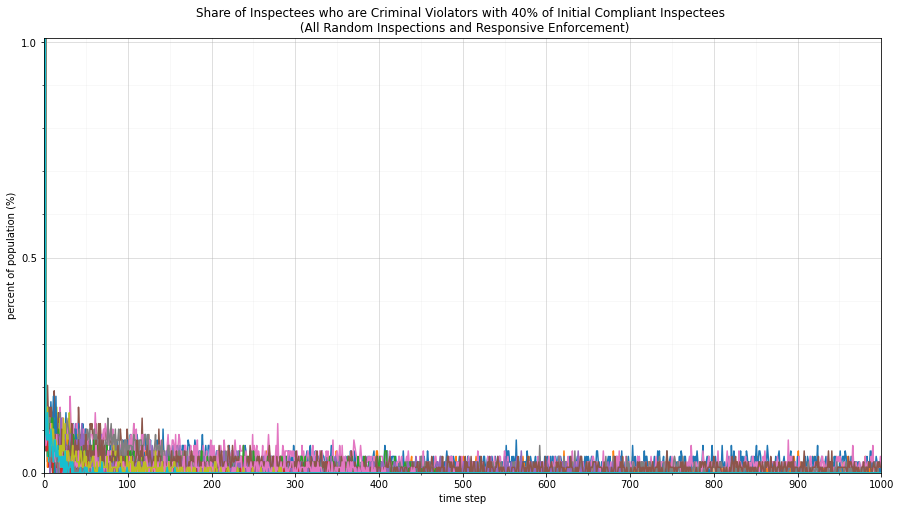

<Figure size 432x288 with 0 Axes>

In [117]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(rand_resp_compliantshare_400_1['step'], rand_resp_compliantshare_400_1['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_2['step'], rand_resp_compliantshare_400_2['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_3['step'], rand_resp_compliantshare_400_3['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_4['step'], rand_resp_compliantshare_400_4['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_5['step'], rand_resp_compliantshare_400_5['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_6['step'], rand_resp_compliantshare_400_6['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_7['step'], rand_resp_compliantshare_400_7['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_8['step'], rand_resp_compliantshare_400_8['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_9['step'], rand_resp_compliantshare_400_9['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_10['step'], rand_resp_compliantshare_400_10['perc-criminal'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_11['step'], rand_resp_compliantshare_400_11['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_12['step'], rand_resp_compliantshare_400_12['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_13['step'], rand_resp_compliantshare_400_13['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_14['step'], rand_resp_compliantshare_400_14['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_15['step'], rand_resp_compliantshare_400_15['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_16['step'], rand_resp_compliantshare_400_16['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_17['step'], rand_resp_compliantshare_400_17['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_18['step'], rand_resp_compliantshare_400_18['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_19['step'], rand_resp_compliantshare_400_19['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_20['step'], rand_resp_compliantshare_400_20['perc-criminal'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_21['step'], rand_resp_compliantshare_400_21['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_22['step'], rand_resp_compliantshare_400_22['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_23['step'], rand_resp_compliantshare_400_23['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_24['step'], rand_resp_compliantshare_400_24['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_25['step'], rand_resp_compliantshare_400_25['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_26['step'], rand_resp_compliantshare_400_26['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_27['step'], rand_resp_compliantshare_400_27['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_28['step'], rand_resp_compliantshare_400_28['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_29['step'], rand_resp_compliantshare_400_29['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_30['step'], rand_resp_compliantshare_400_30['perc-criminal'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_31['step'], rand_resp_compliantshare_400_31['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_32['step'], rand_resp_compliantshare_400_32['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_33['step'], rand_resp_compliantshare_400_33['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_34['step'], rand_resp_compliantshare_400_34['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_35['step'], rand_resp_compliantshare_400_35['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_36['step'], rand_resp_compliantshare_400_36['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_37['step'], rand_resp_compliantshare_400_37['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_38['step'], rand_resp_compliantshare_400_38['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_39['step'], rand_resp_compliantshare_400_39['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_40['step'], rand_resp_compliantshare_400_40['perc-criminal'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_41['step'], rand_resp_compliantshare_400_41['perc-criminal'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_42['step'], rand_resp_compliantshare_400_42['perc-criminal'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_43['step'], rand_resp_compliantshare_400_43['perc-criminal'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_44['step'], rand_resp_compliantshare_400_44['perc-criminal'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_45['step'], rand_resp_compliantshare_400_45['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_46['step'], rand_resp_compliantshare_400_46['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_47['step'], rand_resp_compliantshare_400_47['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_48['step'], rand_resp_compliantshare_400_48['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_49['step'], rand_resp_compliantshare_400_49['perc-criminal'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_50['step'], rand_resp_compliantshare_400_50['perc-criminal'])#, label="Run 5")

plt.title("Share of Inspectees who are Criminal Violators with 40% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 40- Time vs. Criminal All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

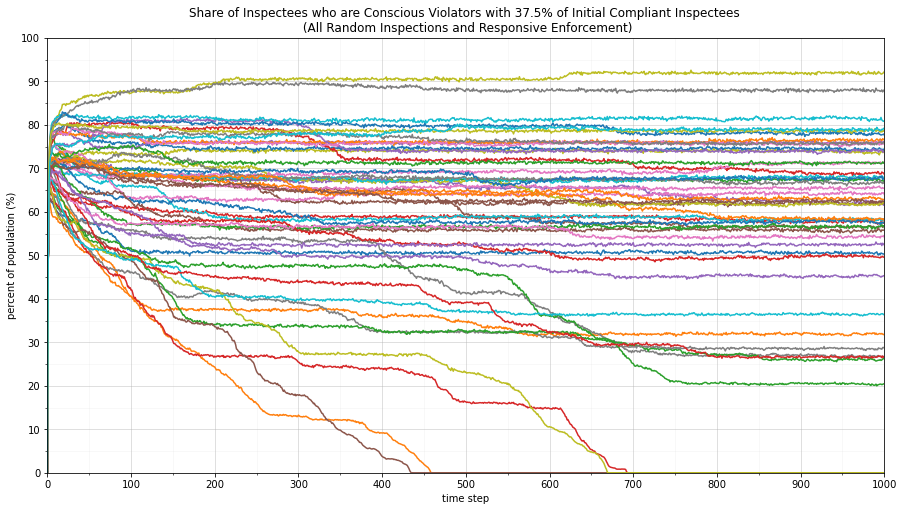

<Figure size 432x288 with 0 Axes>

In [118]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_compliantshare_375_1['step'], rand_resp_compliantshare_375_1['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_2['step'], rand_resp_compliantshare_375_2['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_3['step'], rand_resp_compliantshare_375_3['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_4['step'], rand_resp_compliantshare_375_4['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_5['step'], rand_resp_compliantshare_375_5['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_6['step'], rand_resp_compliantshare_375_6['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_7['step'], rand_resp_compliantshare_375_7['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_8['step'], rand_resp_compliantshare_375_8['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_9['step'], rand_resp_compliantshare_375_9['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_10['step'], rand_resp_compliantshare_375_10['perc-conscious'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_11['step'], rand_resp_compliantshare_375_11['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_12['step'], rand_resp_compliantshare_375_12['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_13['step'], rand_resp_compliantshare_375_13['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_14['step'], rand_resp_compliantshare_375_14['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_15['step'], rand_resp_compliantshare_375_15['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_16['step'], rand_resp_compliantshare_375_16['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_17['step'], rand_resp_compliantshare_375_17['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_18['step'], rand_resp_compliantshare_375_18['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_19['step'], rand_resp_compliantshare_375_19['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_20['step'], rand_resp_compliantshare_375_20['perc-conscious'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_21['step'], rand_resp_compliantshare_375_21['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_22['step'], rand_resp_compliantshare_375_22['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_23['step'], rand_resp_compliantshare_375_23['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_24['step'], rand_resp_compliantshare_375_24['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_25['step'], rand_resp_compliantshare_375_25['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_26['step'], rand_resp_compliantshare_375_26['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_27['step'], rand_resp_compliantshare_375_27['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_28['step'], rand_resp_compliantshare_375_28['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_29['step'], rand_resp_compliantshare_375_29['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_30['step'], rand_resp_compliantshare_375_30['perc-conscious'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_31['step'], rand_resp_compliantshare_375_31['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_32['step'], rand_resp_compliantshare_375_32['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_33['step'], rand_resp_compliantshare_375_33['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_34['step'], rand_resp_compliantshare_375_34['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_35['step'], rand_resp_compliantshare_375_35['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_36['step'], rand_resp_compliantshare_375_36['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_37['step'], rand_resp_compliantshare_375_37['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_38['step'], rand_resp_compliantshare_375_38['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_39['step'], rand_resp_compliantshare_375_39['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_40['step'], rand_resp_compliantshare_375_40['perc-conscious'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_375_41['step'], rand_resp_compliantshare_375_41['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_375_42['step'], rand_resp_compliantshare_375_42['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_375_43['step'], rand_resp_compliantshare_375_43['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_375_44['step'], rand_resp_compliantshare_375_44['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_375_45['step'], rand_resp_compliantshare_375_45['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_46['step'], rand_resp_compliantshare_375_46['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_47['step'], rand_resp_compliantshare_375_47['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_48['step'], rand_resp_compliantshare_375_48['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_49['step'], rand_resp_compliantshare_375_49['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_375_50['step'], rand_resp_compliantshare_375_50['perc-conscious'])#, label="Run 5")

plt.title("Share of Inspectees who are Conscious Violators with 37.5% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 37.5- Time vs. Conscious All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

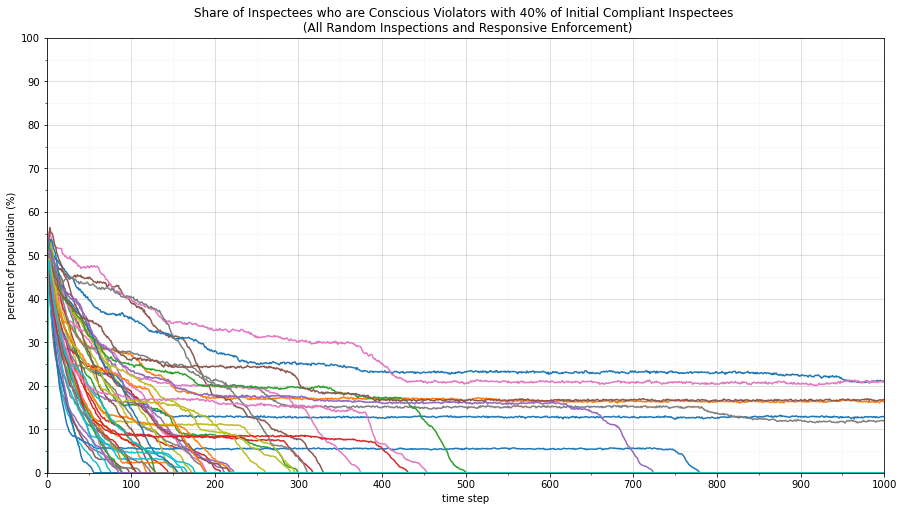

<Figure size 432x288 with 0 Axes>

In [119]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_compliantshare_400_1['step'], rand_resp_compliantshare_400_1['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_2['step'], rand_resp_compliantshare_400_2['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_3['step'], rand_resp_compliantshare_400_3['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_4['step'], rand_resp_compliantshare_400_4['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_5['step'], rand_resp_compliantshare_400_5['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_6['step'], rand_resp_compliantshare_400_6['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_7['step'], rand_resp_compliantshare_400_7['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_8['step'], rand_resp_compliantshare_400_8['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_9['step'], rand_resp_compliantshare_400_9['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_10['step'], rand_resp_compliantshare_400_10['perc-conscious'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_11['step'], rand_resp_compliantshare_400_11['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_12['step'], rand_resp_compliantshare_400_12['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_13['step'], rand_resp_compliantshare_400_13['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_14['step'], rand_resp_compliantshare_400_14['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_15['step'], rand_resp_compliantshare_400_15['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_16['step'], rand_resp_compliantshare_400_16['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_17['step'], rand_resp_compliantshare_400_17['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_18['step'], rand_resp_compliantshare_400_18['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_19['step'], rand_resp_compliantshare_400_19['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_20['step'], rand_resp_compliantshare_400_20['perc-conscious'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_21['step'], rand_resp_compliantshare_400_21['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_22['step'], rand_resp_compliantshare_400_22['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_23['step'], rand_resp_compliantshare_400_23['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_24['step'], rand_resp_compliantshare_400_24['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_25['step'], rand_resp_compliantshare_400_25['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_26['step'], rand_resp_compliantshare_400_26['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_27['step'], rand_resp_compliantshare_400_27['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_28['step'], rand_resp_compliantshare_400_28['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_29['step'], rand_resp_compliantshare_400_29['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_30['step'], rand_resp_compliantshare_400_30['perc-conscious'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_31['step'], rand_resp_compliantshare_400_31['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_32['step'], rand_resp_compliantshare_400_32['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_33['step'], rand_resp_compliantshare_400_33['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_34['step'], rand_resp_compliantshare_400_34['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_35['step'], rand_resp_compliantshare_400_35['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_36['step'], rand_resp_compliantshare_400_36['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_37['step'], rand_resp_compliantshare_400_37['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_38['step'], rand_resp_compliantshare_400_38['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_39['step'], rand_resp_compliantshare_400_39['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_40['step'], rand_resp_compliantshare_400_40['perc-conscious'])#, label="Run 5")

plt.plot(rand_resp_compliantshare_400_41['step'], rand_resp_compliantshare_400_41['perc-conscious'])#, label="Run 1")
plt.plot(rand_resp_compliantshare_400_42['step'], rand_resp_compliantshare_400_42['perc-conscious'])#, label="Run 2")
plt.plot(rand_resp_compliantshare_400_43['step'], rand_resp_compliantshare_400_43['perc-conscious'])#, label="Run 3")
plt.plot(rand_resp_compliantshare_400_44['step'], rand_resp_compliantshare_400_44['perc-conscious'])#, label="Run 4")
plt.plot(rand_resp_compliantshare_400_45['step'], rand_resp_compliantshare_400_45['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_46['step'], rand_resp_compliantshare_400_46['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_47['step'], rand_resp_compliantshare_400_47['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_48['step'], rand_resp_compliantshare_400_48['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_49['step'], rand_resp_compliantshare_400_49['perc-conscious'])#, label="Run 5")
plt.plot(rand_resp_compliantshare_400_50['step'], rand_resp_compliantshare_400_50['perc-conscious'])#, label="Run 5")

plt.title("Share of Inspectees who are Conscious Violators with 40% of Initial Compliant Inspectees \n (All Random Inspections and Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Initial Compliant Share 40- Time vs. Conscious All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')